# Proyecto IDC
## Integrantes:

- David León 
- William Medina
Link del repositorio: https://github.com/DavidLeonChang/CovidScience.git

In [3]:
import pandas as pd
import urllib # sirve para acceder a archivos de internet y descargarlos automaticamnete
import os

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [12]:
# os me sirve para crear la ruta de los directorios, donde quiero descargar mi archivo
file_path = os.path.join("data", "covid") #nombro las carpetas

In [13]:
os.makedirs(file_path, exist_ok = True) #creacion de las carpetas

In [14]:
csv_path = os.path.join(file_path, 'data.csv') #decirle que guarde el nombre del archivo en la carpeta

In [5]:
#urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv', csv_path) # descarga el archivo desde este link de internet

In [15]:
df = pd.read_csv(csv_path)

### Dataset Covid Original

In [16]:
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132374 entries, 0 to 132373
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      132374 non-null  object
 1   Country_code       131813 non-null  object
 2   Country            132374 non-null  object
 3   WHO_region         132374 non-null  object
 4   New_cases          132374 non-null  int64 
 5   Cumulative_cases   132374 non-null  int64 
 6   New_deaths         132374 non-null  int64 
 7   Cumulative_deaths  132374 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [9]:
df.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  132374.000000      1.323740e+05  132374.000000      132374.000000
mean     1425.173886      2.617811e+05      30.727462        6265.791198
std      9491.259691      1.621011e+06     170.698202       32600.827992
min    -32952.000000      0.000000e+00     -60.000000           0.000000
25%         0.000000      2.400000e+01       0.000000           0.000000
50%         9.000000      2.952000e+03       0.000000          48.000000
75%       309.000000      5.576850e+04       5.000000         908.000000
max    414188.000000      3.364353e+07    6508.000000      603170.000000

### Cargando el dataset de Población solo los 20 paises principales que más usan el Bitcoin

In [18]:
popu = pd.read_csv("population_2020.csv")
popu2 = popu[["Country","Population"]]
popu3 = popu2.loc[popu2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
popu3

Country  Population
0                      China  1440297825
1                      India  1382345085
2   United States of America   331341050
5                     Brazil   212821986
6                    Nigeria   206984347
8         Russian Federation   145945524
9                     Mexico   129166028
12               Philippines   109830324
19                  Thailand    69830779
20        The United Kingdom    67948282
26                     Kenya    53968739
28                  Colombia    50976248
31                 Argentina    45267449
34                   Ukraine    43686577
38                    Canada    37799407
42                      Peru    33050211
44                  Malaysia    32436963
54                 Australia    25550683
62                     Chile    19144605
90                    Sweden    10110233

In [19]:
df2 = df[["Date_reported","Country","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]]
df2

Date_reported      Country  New_cases  Cumulative_cases  New_deaths  \
0         2020-01-03  Afghanistan          0                 0           0   
1         2020-01-04  Afghanistan          0                 0           0   
2         2020-01-05  Afghanistan          0                 0           0   
3         2020-01-06  Afghanistan          0                 0           0   
4         2020-01-07  Afghanistan          0                 0           0   
...              ...          ...        ...               ...         ...   
132369    2021-07-12     Zimbabwe        912             67765          59   
132370    2021-07-13     Zimbabwe       2661             70426          51   
132371    2021-07-14     Zimbabwe       2845             73271          38   
132372    2021-07-15     Zimbabwe       3110             76381          58   
132373    2021-07-16     Zimbabwe       2491             78872          86   

        Cumulative_deaths  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
132369               2185  
132370               2236  
132371               2274  
132372               2332  
132373               2418  

[132374 rows x 6 columns]

In [20]:
df2.isnull().sum()

Date_reported        0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

### Seleccionado del dataset de Covid solo los 20 paises que más usan el Bitcoin

In [21]:
# https://www.statista.com/statistics/1195753/bitcoin-trading-selected-countries/
# https://triple-a.io/crypto-ownership/
#[Estados Unidos] [Rusia] [Nigeria] [China] [Reino Unido] [Colombia] 
#[Kenya] [Canada] [India] [Australia] [Argentina] [Peru] [Filipina] 
#[Tailandia] [Brazil] [Chile] [Mexico] [Suecia] [Ukrania] [Malasia] 
df3 = df2.loc[df2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
df3 = df3.loc[df3["Cumulative_cases"]>0]
#df3["Country"].value_counts()

In [22]:
df3["Date_reported"] = pd.to_datetime(df3["Date_reported"])
#df3.info()
df3.head()

Date_reported    Country  New_cases  Cumulative_cases  New_deaths  \
4547    2020-03-03  Argentina          5                 5           0   
4548    2020-03-04  Argentina          0                 5           0   
4549    2020-03-05  Argentina          0                 5           0   
4550    2020-03-06  Argentina          1                 6           0   
4551    2020-03-07  Argentina          7                13           1   

      Cumulative_deaths  
4547                  0  
4548                  0  
4549                  0  
4550                  0  
4551                  1

### Merge con el dataset de Covid y de Population

In [23]:
CovidDF = df3.merge(popu3)
CovidDF

Date_reported                   Country  New_cases  Cumulative_cases  \
0        2020-03-03                 Argentina          5                 5   
1        2020-03-04                 Argentina          0                 5   
2        2020-03-05                 Argentina          0                 5   
3        2020-03-06                 Argentina          1                 6   
4        2020-03-07                 Argentina          7                13   
...             ...                       ...        ...               ...   
10436    2021-07-12  United States of America       8224          33514946   
10437    2021-07-13  United States of America      37319          33552265   
10438    2021-07-14  United States of America      20450          33572715   
10439    2021-07-15  United States of America      32107          33604822   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  
0               0                  0    45267449  
1               0                  0    45267449  
2               0                  0    45267449  
3               0                  0    45267449  
4               1                  1    45267449  
...           ...                ...         ...  
10436          77             601944   331341050  
10437         254             602198   331341050  
10438         211             602409   331341050  
10439         411             602820   331341050  
10440         350             603170   331341050  

[10441 rows x 7 columns]

### Estableciendo las métricas de Contagion Rate, Contagion Rate Global y Severity

In [24]:
CovidDF["Contagion Rate"] = CovidDF["Cumulative_cases"]*100/(CovidDF["Population"]-CovidDF["Cumulative_deaths"])
CovidDF["Death Rate"] = CovidDF["Cumulative_deaths"]*100/(CovidDF["Cumulative_cases"])
CovidDF["Contagion Rate Global"] = CovidDF["Cumulative_cases"]*CovidDF["Population"]/popu3["Population"].sum()
CovidDF["Death Rate"].describe()

count    10441.000000
mean         3.560017
std          3.804282
min          0.000000
25%          1.682580
50%          2.421558
75%          3.893978
max        100.000000
Name: Death Rate, dtype: float64

In [25]:
CovidDF.loc[CovidDF["Death Rate"].idxmax(),]

Date_reported            2020-02-02 00:00:00
Country                          Philippines
New_cases                                  0
Cumulative_cases                           1
New_deaths                                 1
Cumulative_deaths                          1
Population                         109830324
Contagion Rate                      0.000001
Death Rate                             100.0
Contagion Rate Global               0.024689
Name: 6716, dtype: object

In [30]:
CovidDF["Severity"] = pd.cut(CovidDF["Contagion Rate"],5,labels=["Baja","Media Baja","Media","Media Alta","Alta"])


In [31]:
CovidDF["Severity"].value_counts()

Baja          7627
Media Baja    1379
Media          742
Media Alta     401
Alta           292
Name: Severity, dtype: int64

### Grafica de Seriedad de Contagios, donde X es la serie de tiempo y Y es Contagion Rate

<AxesSubplot:title={'center':'Seriedad de Contagios'}, xlabel='Date_reported', ylabel='Contagion Rate'>

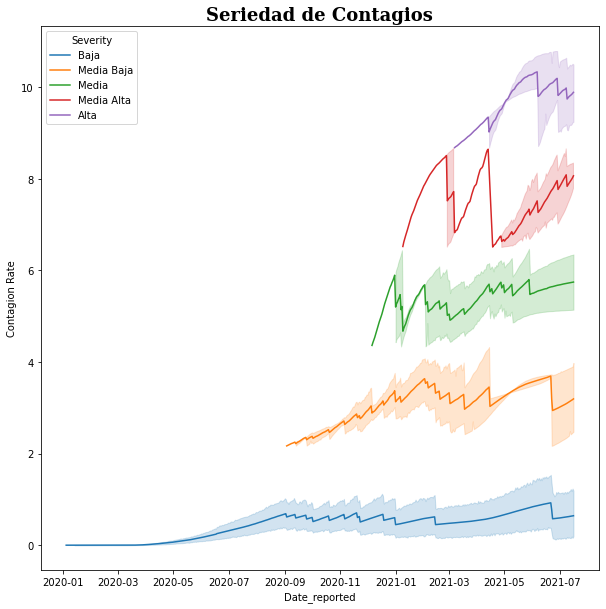

In [28]:
plt.figure(figsize = (10,10))
plt.title("Seriedad de Contagios", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
sns.lineplot(x = 'Date_reported', y = 'Contagion Rate',hue="Severity",data = CovidDF)

### Dataset Original del Bitcoin

In [33]:
btc = pd.read_csv("BTC-USD.csv")
btc

Date          Open          High           Low         Close  \
0    2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
1    2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2    2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
3    2020-01-06   7410.452148   7781.867188   7409.292969   7769.219238   
4    2020-01-07   7768.682129   8178.215820   7768.227539   8163.692383   
..          ...           ...           ...           ...           ...   
556  2021-07-12  34254.015625  34592.156250  32697.308594  33155.847656   
557  2021-07-13  33125.468750  33327.101563  32261.419922  32702.025391   
558  2021-07-14  32723.845703  33061.398438  31639.125000  32822.347656   
559  2021-07-15  32827.875000  33159.640625  31175.708984  31780.730469   
560  2021-07-16  31841.550781  32218.406250  31100.673828  31421.539063   

        Adj Close        Volume  
0     7344.884277  2.811148e+10  
1     7410.656738  1.844427e+10  
2     7411.317383  1.972507e+10  
3     7769.219238  2.327626e+10  
4     8163.692383  2.876729e+10  
..            ...           ...  
556  33155.847656  2.432150e+10  
557  32702.025391  1.912086e+10  
558  32822.347656  2.137653e+10  
559  31780.730469  2.130052e+10  
560  31421.539063  2.369948e+10  

[561 rows x 7 columns]

### Obtención de metrica Average, normalización de volume y separación a Date, average y Volume

In [34]:
Bitcoin = pd.read_csv("BTC-USD.csv")
Bitcoin["Average"] = Bitcoin["High"]/2 + Bitcoin["Low"]/2
Bitcoin["Average"] = Bitcoin["Average"].round(2)
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"])
Bitcoin['Volume'] = Bitcoin['Volume']/1000000000
bit = Bitcoin[["Date","Average","Volume"]]

### Encontrando los valores nulos del dataset de Bitcoin

In [23]:
bit.isnull().sum()

Date       0
Average    4
Volume     4
dtype: int64

In [24]:
Bitcoin.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Average      4
dtype: int64

In [35]:
bit[bit.isnull()["Average"]]

Date  Average  Volume
105 2020-04-17      NaN     NaN
280 2020-10-09      NaN     NaN
283 2020-10-12      NaN     NaN
284 2020-10-13      NaN     NaN

### Tratamiento de valores nulos, se uso el promedio de los vecinos

In [36]:
bit.loc[105,"Average"] = bit.loc[104,"Average"]*0.5 + bit.loc[106,"Average"]*0.5
bit.loc[105,"Volume"] = bit.loc[104,"Volume"]*0.5 + bit.loc[106,"Volume"]*0.5
bit.loc[280,"Average"] = bit.loc[279,"Average"]*0.5 + bit.loc[281,"Average"]*0.5
bit.loc[280,"Volume"] = bit.loc[279,"Volume"]*0.5 + bit.loc[281,"Volume"]*0.5
bit.loc[283,"Average"] = bit.loc[282,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[283,"Volume"] = bit.loc[282,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5
bit.loc[284,"Average"] = bit.loc[283,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[284,"Volume"] = bit.loc[283,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5

c:\users\willi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
max = bit["Volume"].idxmax()
bit.loc[max]
min = bit["Volume"].idxmin()
bit.loc[min]

Date       2020-07-18 00:00:00
Average                 9165.9
Volume               12.252601
Name: 197, dtype: object

### Grafica de Average con respecto al tiempo

<AxesSubplot:xlabel='Date', ylabel='Average'>

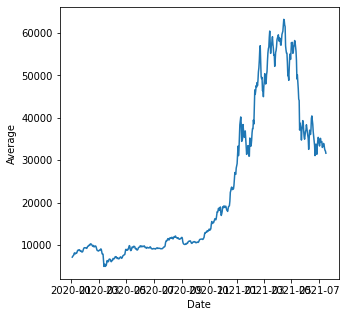

In [38]:
plt.figure(figsize = (5,5))
sns.lineplot(x = 'Date', y = 'Average',data = Bitcoin)

### Encontrando los máximos y minimos del Average

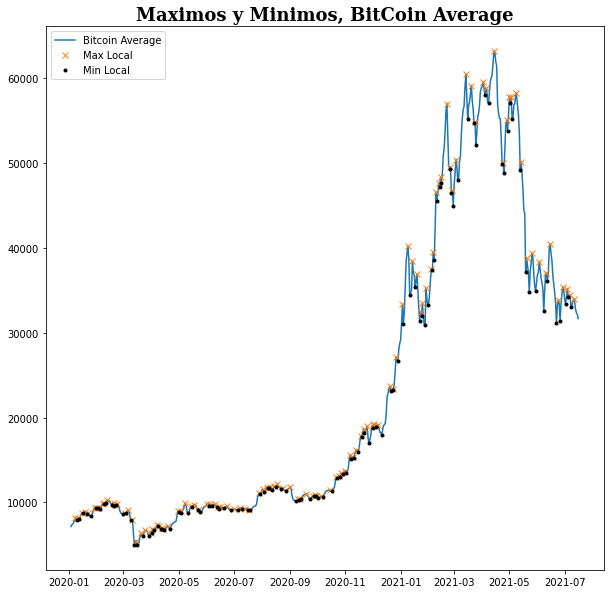

In [39]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]
bit2 = bit1.loc[bit1["Date"]>"31/03/2020"]

y = bit["Average"]
x = bit["Date"]
peaks, _ = find_peaks(y)
min_, _ = find_peaks(-y)


plt.figure(figsize = (10,10))
plt.title("Maximos y Minimos, BitCoin Average", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[peaks], y[peaks], "x",label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()


### Econtrando y graficando maximos y minimos del Average del bitcoin pero  desde 2020/01/01 hasta 2020/06/30

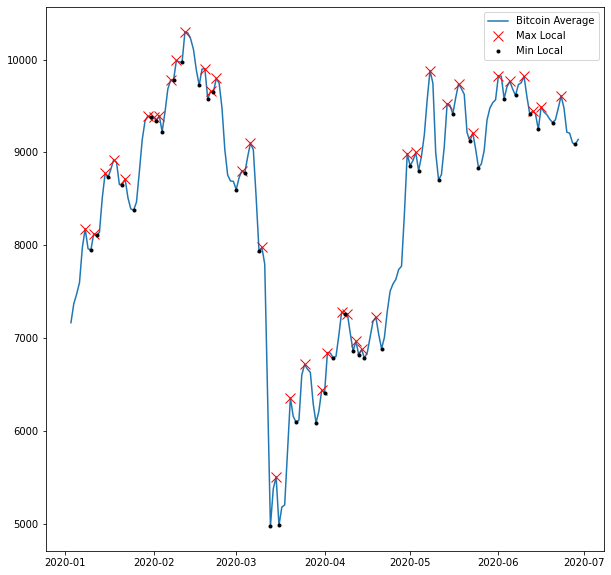

In [40]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]
y = bit1["Average"]
x = bit1["Date"]
max_, _ = find_peaks(y)
min_, _ = find_peaks(-y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[max_], y[max_], "x",c="red",markersize=10,label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()




### Encontrando y graficando maximos y minimos del Volume del bitcoin pero  desde 2020/01/01 hasta 2020/06/30

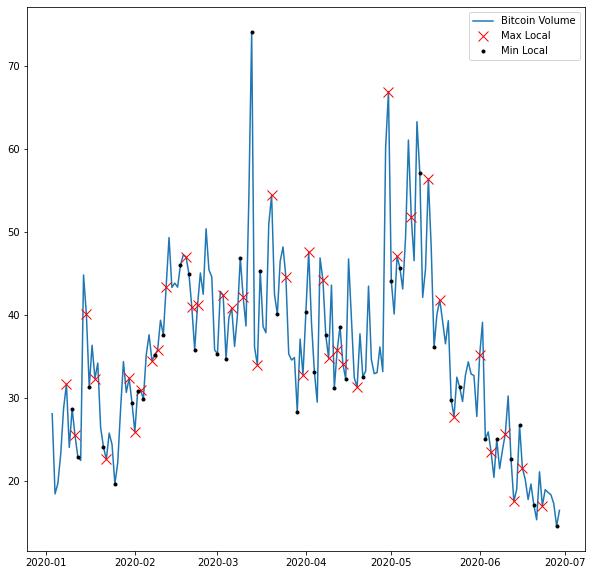

In [41]:
y2 = bit1["Volume"]
x2 = bit1["Date"]
max_2, _ = find_peaks(y)
min_2, _ = find_peaks(-y)
plt.figure(figsize = (10,10))
plt.plot(x2, y2,label='Bitcoin Volume')
plt.plot(x2.loc[max_2], y2[max_2], "x",c="red",markersize=10,label='Max Local')
plt.plot(x2.loc[min_2], y2[min_2], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()

### Tratamiento de un outlier, utilizando el promedio de su vecinos

In [95]:
max_i = bit["Volume"].idxmax()
max_i
bit.loc[420,"Volume"] = bit.loc[419,"Volume"]*0.5 + bit.loc[421,"Volume"]*0.5

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Agrupación por fecha y suma de las métricas de todos los paises del Covid
### Merge del dataset covid19 y bitcoin para correlacion

In [42]:
Paises = CovidDF[["Date_reported","New_cases","New_deaths","Contagion Rate"]].groupby("Date_reported").sum()
Paises.reset_index(inplace=True)
PaisesCorr = Paises[["Date_reported","New_cases","New_deaths","Contagion Rate"]]
PaisesCorr.columns = ["Date","New_cases","New_deaths","Contagion Rate"]
correlacion = PaisesCorr.merge(bit)
corr1 = correlacion[["New_cases","New_deaths","Contagion Rate","Average","Volume"]]
corPear= corr1.corr(method="pearson")
corPear

New_cases  New_deaths  Contagion Rate   Average    Volume
New_cases        1.000000    0.858457        0.716966  0.681173  0.341940
New_deaths       0.858457    1.000000        0.727675  0.696811  0.375353
Contagion Rate   0.716966    0.727675        1.000000  0.865279  0.402417
Average          0.681173    0.696811        0.865279  1.000000  0.560855
Volume           0.341940    0.375353        0.402417  0.560855  1.000000

In [43]:
corSpear= corr1.corr(method="spearman")
corSpear

New_cases  New_deaths  Contagion Rate   Average    Volume
New_cases        1.000000    0.860284        0.842779  0.817205  0.363470
New_deaths       0.860284    1.000000        0.808626  0.783857  0.420727
Contagion Rate   0.842779    0.808626        1.000000  0.910817  0.401783
Average          0.817205    0.783857        0.910817  1.000000  0.528263
Volume           0.363470    0.420727        0.401783  0.528263  1.000000

### Bitcoin Average Correlation

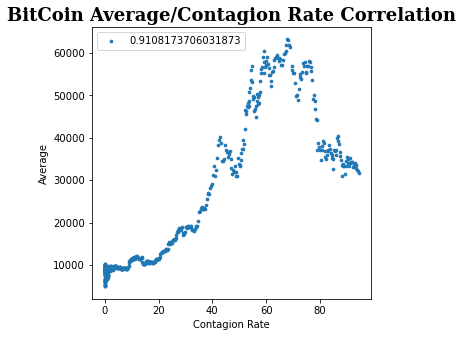

In [210]:
plt.figure(figsize = (5,5))
plt.title("BitCoin Average/Contagion Rate Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Average"]["Contagion Rate"]
plt.scatter(correlacion["Contagion Rate"], correlacion["Average"], marker='o', s=7,label=labels);
plt.xlabel('Contagion Rate')
plt.ylabel('Average')
plt.legend()
plt.show()

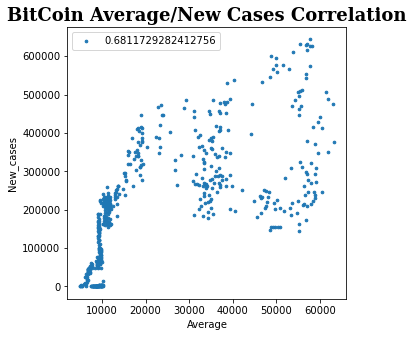

In [194]:
plt.figure(figsize = (5,5))
plt.title("BitCoin Average/New Cases Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Average"]["New_cases"]
plt.scatter(correlacion["Average"], correlacion["New_cases"], marker='o', s=7,label=labels);
plt.xlabel('Average')
plt.ylabel('New_cases')
plt.legend()
plt.show()

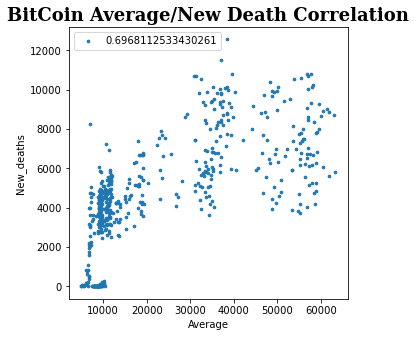

In [195]:
plt.figure(figsize = (5,5))
plt.title("BitCoin Average/New Death Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels =corPear.loc["New_deaths"]["Average"]
plt.scatter(correlacion["Average"], correlacion["New_deaths"], marker='o', s=7,label=labels);
plt.xlabel('Average')
plt.ylabel('New_deaths')
plt.legend()
plt.show()

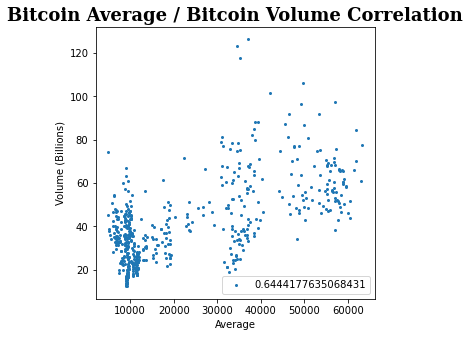

In [196]:
plt.figure(figsize = (5,5))
plt.title("Bitcoin Average / Bitcoin Volume Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels =corPear.loc["Average"]["Volume"]
plt.scatter(correlacion["Average"], correlacion["Volume"], marker='o',s=4,label=labels);
plt.xlabel('Average')
plt.ylabel('Volume (Billions)')
plt.legend()
plt.show()

### Bitcoin Volume Correlation

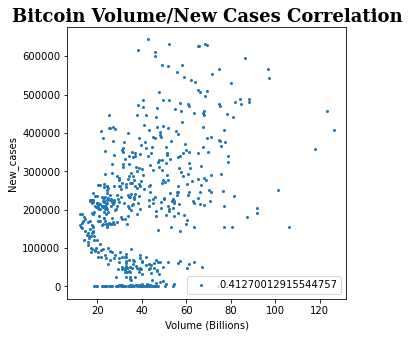

In [197]:
plt.figure(figsize = (5,5))
plt.title("Bitcoin Volume/New Cases Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels =corPear.loc["Volume"]["New_cases"]
plt.scatter(correlacion["Volume"], correlacion["New_cases"], marker='o',s=4,label=labels);
plt.xlabel('Volume (Billions)')
plt.ylabel('New_cases')
plt.legend()
plt.show()

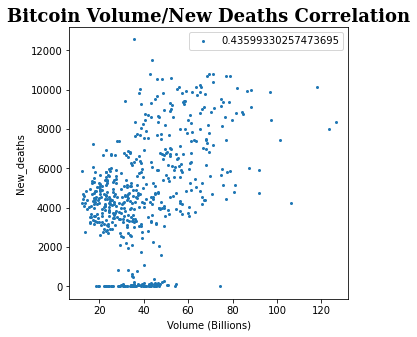

In [198]:
plt.figure(figsize = (5,5))
plt.title("Bitcoin Volume/New Deaths Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels =corPear.loc["Volume"]["New_deaths"]
plt.scatter(correlacion["Volume"], correlacion["New_deaths"], marker='o',s=4,label=labels);
plt.xlabel('Volume (Billions)')
plt.ylabel('New_deaths')
plt.legend()
plt.show()

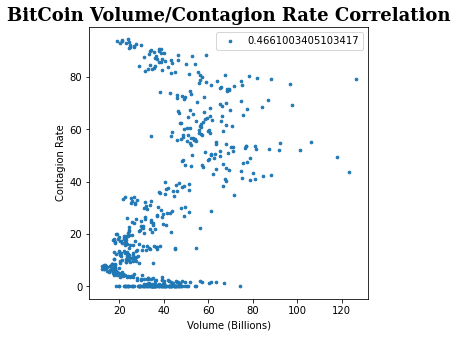

In [201]:
plt.figure(figsize = (5,5))
plt.title("BitCoin Volume/Contagion Rate Correlation", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Volume"]["Contagion Rate"]
plt.scatter(correlacion["Volume"], correlacion["Contagion Rate"], marker='o', s=7,label=labels);
plt.xlabel('Volume (Billions)')
plt.ylabel('Contagion Rate')
plt.legend()
plt.show()

In [36]:
peaks, _ = find_peaks(y)
x = bit["Date"]
new = x.loc[peaks]
new

5     2020-01-08
8     2020-01-11
12    2020-01-15
15    2020-01-18
19    2020-01-22
27    2020-01-30
29    2020-02-01
31    2020-02-03
35    2020-02-07
37    2020-02-09
40    2020-02-12
47    2020-02-19
49    2020-02-21
51    2020-02-23
60    2020-03-03
63    2020-03-06
67    2020-03-10
72    2020-03-15
77    2020-03-20
82    2020-03-25
88    2020-03-31
90    2020-04-02
95    2020-04-07
97    2020-04-09
100   2020-04-12
102   2020-04-14
107   2020-04-19
118   2020-04-30
121   2020-05-03
126   2020-05-08
132   2020-05-14
136   2020-05-18
141   2020-05-23
150   2020-06-01
154   2020-06-05
159   2020-06-10
162   2020-06-13
165   2020-06-16
172   2020-06-23
Name: Date, dtype: datetime64[ns]

### Grafica de Contagion Rate Global con respecto al tiempo

<AxesSubplot:xlabel='Date_reported', ylabel='Contagion Rate Global'>

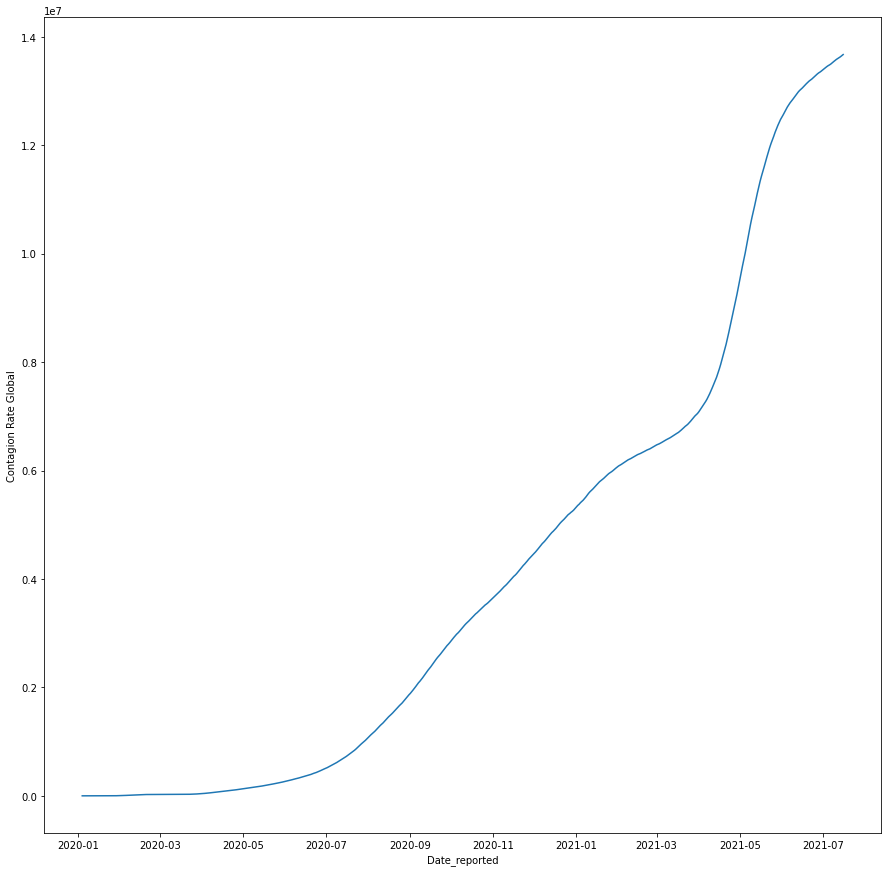

In [37]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date_reported', y = 'Contagion Rate Global',data = Paises)

### Grafica de Cumulative Cases con respecto al tiempo de todos los paises acumulado

<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

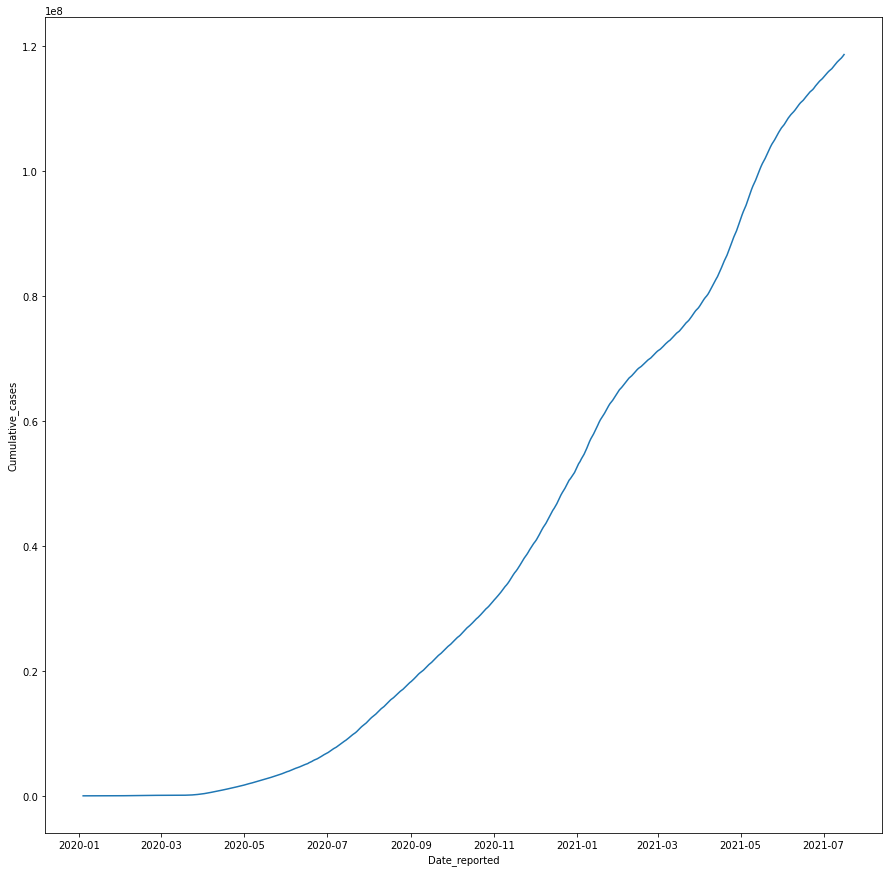

In [38]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date_reported', y = 'Cumulative_cases',data = Paises)

### Gráfica de Nuevos contagios diarios con respecto al tiempo de todos los paises acumulado

<AxesSubplot:title={'center':'Nuevos Contagios Diarios'}, xlabel='Date_reported', ylabel='New_cases'>

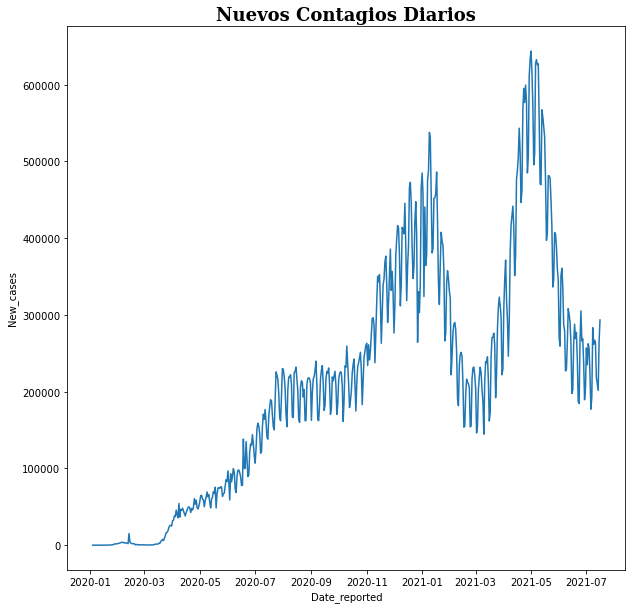

In [39]:
plt.figure(figsize = (10,10))
plt.title("Nuevos Contagios Diarios", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

### Subdatset del Covid de solo Estados Unidos 

In [40]:
United_State = df3.query("Country=='United States of America'")
max = United_State["New_cases"].idxmax()
United_State.loc[max]

### Grafica del precio del Bitcoin vs Nuevos casos del Covid solo de USA

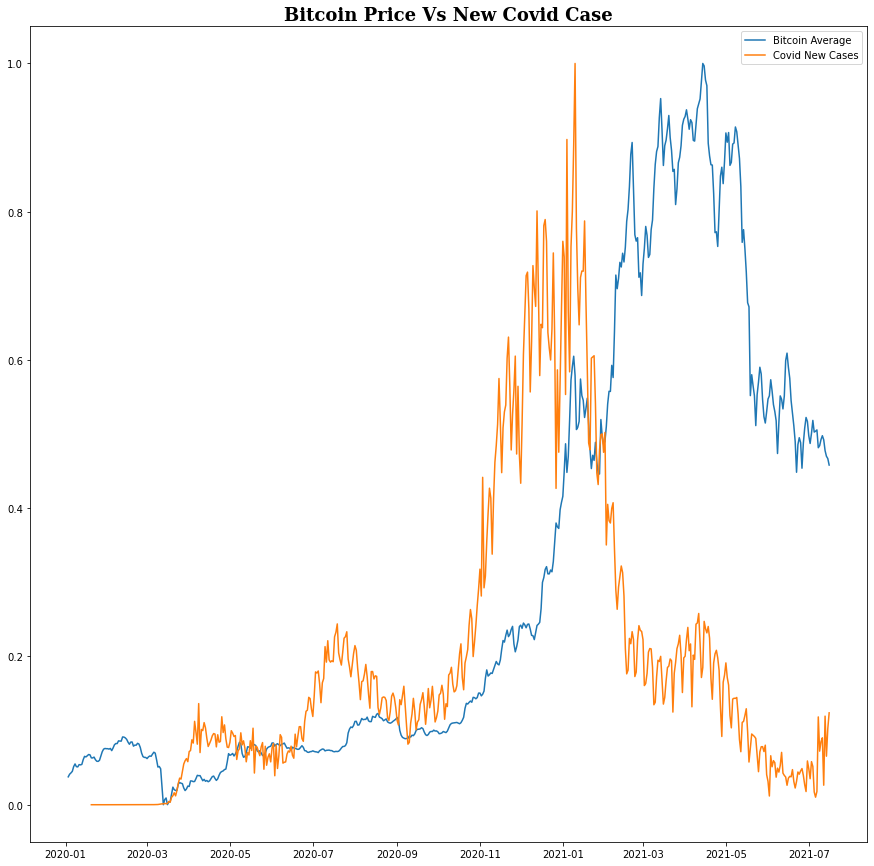

In [41]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(United_State)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = United_State["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()
#sns.lineplot(x = 'Date_reported', y = 'New_cases',data = United_State)

### Grafico del volumen de transacciones vs Precio del bitcoin vs nuevos casos del Covid de los 20 paises

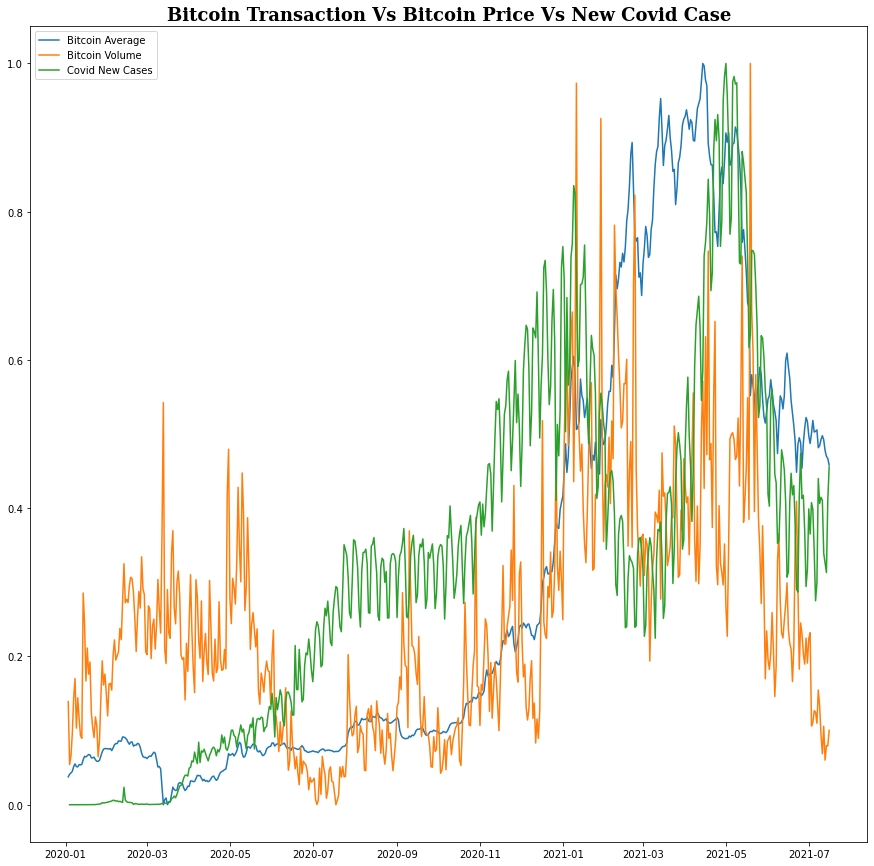

In [43]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Transaction Vs Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

def minmax_norm_Bitcoin2(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
bitc2=minmax_norm_Bitcoin2(bit)
US2 =minmax_norm_Pais(Paises)

y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = bitc2
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

### Grafico del Precio del Bitcoin vs Nuevos casos del Covid de los 20 paises

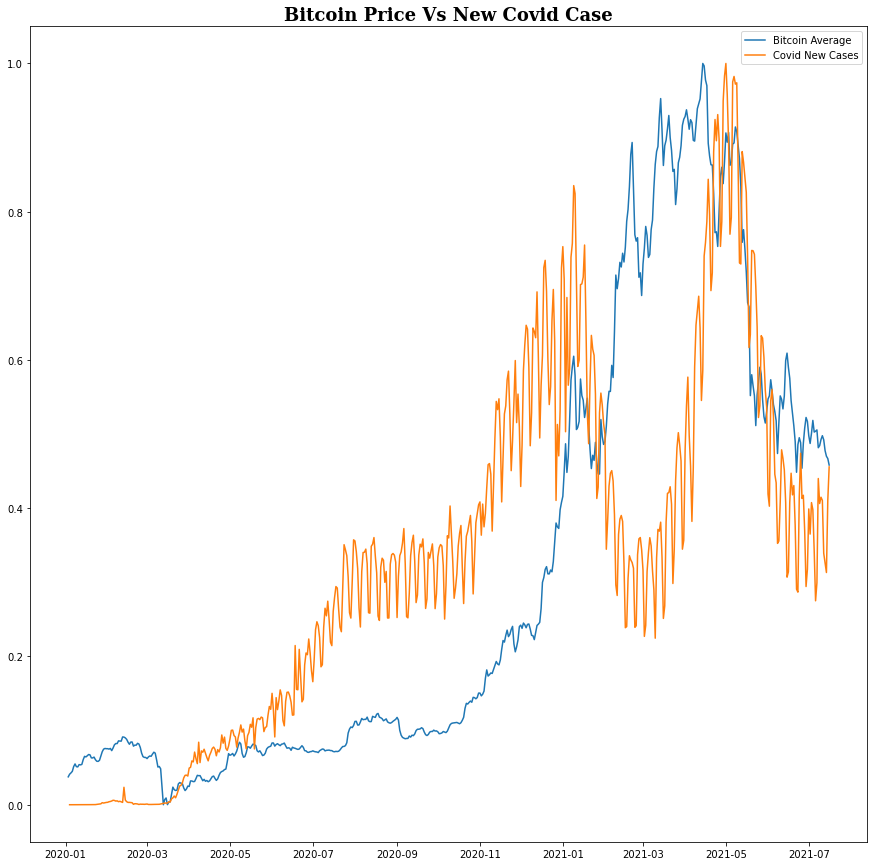

In [44]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

### Grafico del volumen de las transacciones vs Nuevos casos del Covid de los 20 paises

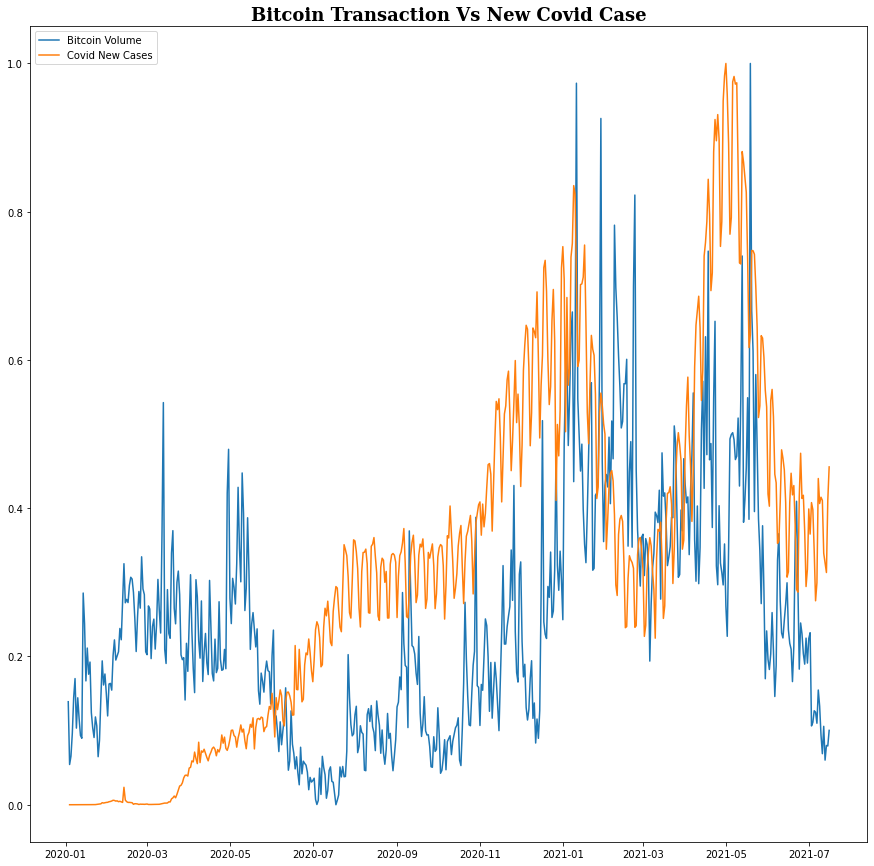

In [45]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Transaction Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [46]:
max_i = bit["Volume"].idxmax()
bit.loc[max_i]

Date       2021-05-19 00:00:00
Average           37113.810000
Volume              126.358099
Name: 502, dtype: object

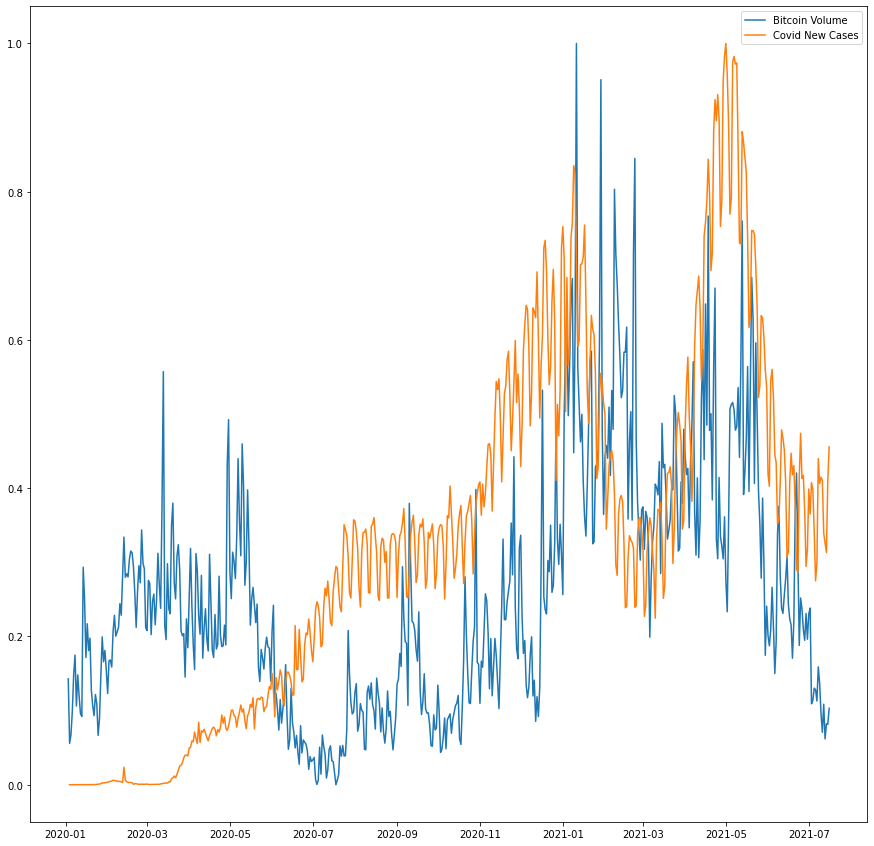

In [47]:
max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

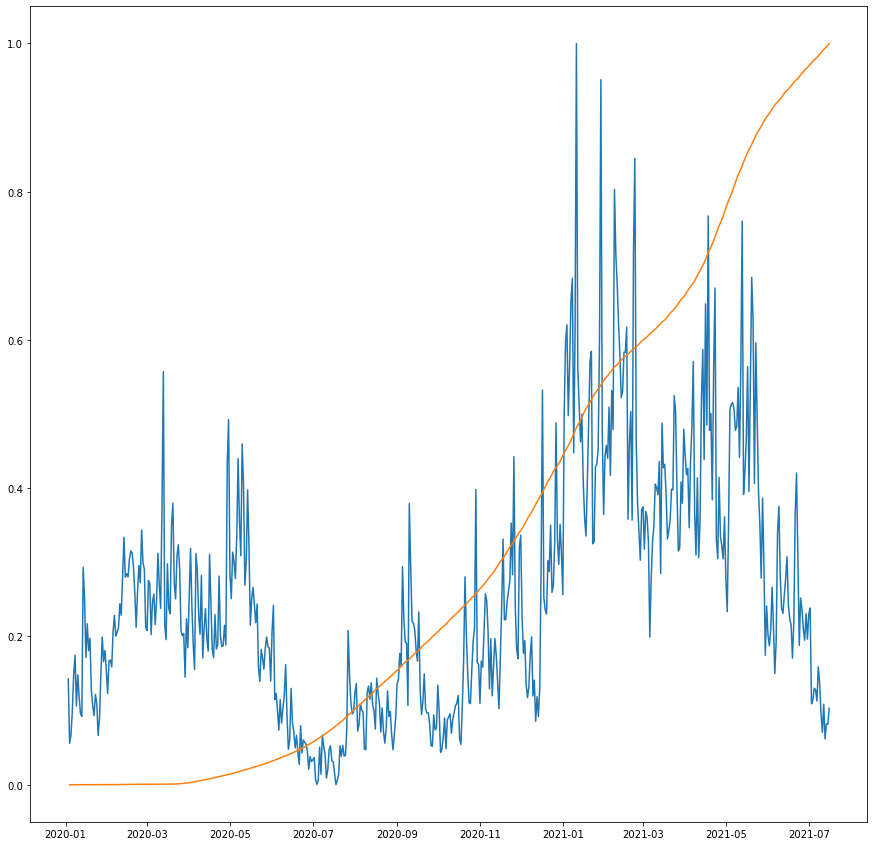

In [48]:

max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["Cumulative_cases"] - df["Cumulative_cases"].min()) / ( df["Cumulative_cases"].max() - df["Cumulative_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y)
y = US2
x = Paises["Date_reported"]
plt.plot(x, y)

In [ ]:
def add_weekday(row):
    if(row["Date"].dayofweek<5):
        return 0
    else:
        return 1
Bitcoin["isWeekEnd"] = Bitcoin.apply(add_weekday,axis=1)   
Bitcoin

In [ ]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (3,5))

sns.boxplot(y="Volume",data = Bitcoin)

In [ ]:
df3


#sns.boxplot(x="Country",y="New_cases",data = df3)
sns.catplot(y="New_cases",data = df3, kind="box", col="Country", col_wrap=2)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x= "Date_reported",y = 'New_cases',data = df3)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

In [ ]:
'''
1.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al volumen)?
2.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al valor)?
3.- ¿Cuales son las caracteriscas mas influyentes para esta correlacion?
'''

In [ ]:
df_index = df3.index

In [ ]:
df_index #aqui solo retorna el objeto el valor inicial y el fin de los indices del dataframe

In [ ]:
df3.columns

In [ ]:
df_index.values #convertir en un array los valores de los indices

In [ ]:
df3.values #toma los valores del dataframe pero no toma los indices ni las columnas y lo transforma en una matriz tipo numpy

In [ ]:
df3.dtypes #tipo de clase es cada columna

In [ ]:
df3.info() #info mas detallada del dataframe

In [ ]:
df3.describe() #estadisticas del dataframe

In [48]:
usaCovid = CovidDF.query("Country == 'United States of America'")

In [ ]:
usaCovid

In [ ]:
plt.hist(usaCovid.Cumulative_cases)

In [ ]:
plt.hist(usaCovid["Contagion Rate"])

In [ ]:
plt.hist(usaCovid["Contagion Rate Global"])

In [ ]:
plt.hist(usaCovid["New_cases"])

In [74]:
fecha_ultima =CovidDF.query("Date_reported=='2021-07-16'")
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity  
500             4.785370e+04        Alta  
1039            1.810172e+02        Baja  
1546            9.190178e+05        Alta  
2084            1.208145e+04  Media Baja  
2585            6.862084e+03  Media Alta  
3145            3.870331e+04        Baja  
3643            5.231548e+04        Alta  
4177            9.641399e+06  Media Baja  
4667            2.317434e+03        Baja  
5206            6.422362e+03  Media Baja  
5711            7.598179e+04        Baja  
6216            7.866843e+03        Baja  
6713            1.549710e+04       Media  
7246            3.680345e+04        Baja  
7779            1.938284e+05  Media Baja 

In [76]:
fecha_ultima["SumRate"] = fecha_ultima["Contagion Rate"]*0.4 + fecha_ultima["Death Rate"]*0.6
fecha_ultima

<ipython-input-76-4c84f9510948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["SumRate"] = fecha_ultima["Contagion Rate"]*0.4 + fecha_ultima["Death Rate"]*0.6


Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  
500             4.785370e+04        Alta  5.443730  
1039            1.810172e+02        Baja  1.785602  
1546            9.190178e+05        Alta  5.298124  
2084            1.208145e+04  Media Baja  2.622165  
2585            6.862084e+03  Media Alta  4.624632  
3145            3.870331e+04        Baja  2.817632  
3643            5.231548e+04        Alta  5.093069  
4177            9.641399e+06  Media Baja  1.695827  
4667            2.317434e+03        Baja  1.318219  
5206            6.422362e+03  Media Baja  1.536854  
5711            7.598179e+04        Baja  6.211686  
6216            7.866843e+03        Baja  0.787137

(array([18.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.81017175e+02, 9.64302782e+05, 1.92842455e+06, 2.89254631e+06,
        3.85666808e+06, 4.82078984e+06, 5.78491161e+06, 6.74903337e+06,
        7.71315514e+06, 8.67727690e+06, 9.64139867e+06]),
 <BarContainer object of 10 artists>)

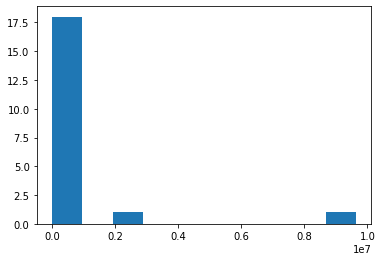

In [77]:
plt.hist(fecha_ultima["Contagion Rate Global"])

In [78]:
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  
500             4.785370e+04        Alta  5.443730  
1039            1.810172e+02        Baja  1.785602  
1546            9.190178e+05        Alta  5.298124  
2084            1.208145e+04  Media Baja  2.622165  
2585            6.862084e+03  Media Alta  4.624632  
3145            3.870331e+04        Baja  2.817632  
3643            5.231548e+04        Alta  5.093069  
4177            9.641399e+06  Media Baja  1.695827  
4667            2.317434e+03        Baja  1.318219  
5206            6.422362e+03  Media Baja  1.536854  
5711            7.598179e+04        Baja  6.211686  
6216            7.866843e+03        Baja  0.787137

### Normalización de Contagion Rate y Death Rate

In [79]:
fecha_ultima["ZDeathRate"] = (fecha_ultima["Death Rate"] -fecha_ultima["Death Rate"].mean()) / fecha_ultima["Death Rate"].std()

<ipython-input-79-a03f2362a588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["ZDeathRate"] = (fecha_ultima["Death Rate"] -fecha_ultima["Death Rate"].mean()) / fecha_ultima["Death Rate"].std()


In [80]:
fecha_ultima["ZContagionRate"] = (fecha_ultima["Contagion Rate"]-fecha_ultima["Contagion Rate"].mean())/fecha_ultima["Contagion Rate"].std()

<ipython-input-80-9842aa3c58b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["ZContagionRate"] = (fecha_ultima["Contagion Rate"]-fecha_ultima["Contagion Rate"].mean())/fecha_ultima["Contagion Rate"].std()


In [81]:
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  ZDeathRate  ZContagionRate  
500             4.785370e+04        Alta  5.443730   -0.277017        1.449814  
1039            1.810172e+02        Baja  1.785602    0.047681       -1.169611  
1546            9.190178e+05        Alta  5.298124    0.006664        1.102888  
2084            1.208145e+04  Media Baja  2.622165   -0.392465       -0.242656  
2585            6.862084e+03  Media Alta  4.624632   -0.271245        0.923282  
3145            3.870331e+04        Baja  2.817632    0.813304       -1.198903  
3643            5.231548e+04        Alta  5.093069   -0.118218        1.084294  
4177            9.641399e+06  Media Ba

In [82]:
fecha_ultima["Contagion Rate"].mean()

4.717231239658832

In [83]:
def minmax_norm_contagion_rate(df):
    return (df["Contagion Rate"] - df["Contagion Rate"].min()) / ( df["Contagion Rate"].max() - df["Contagion Rate"].min())


In [84]:
fecha_ultima["ContagionRateNormalizado"] = minmax_norm_contagion_rate(fecha_ultima)

<ipython-input-84-fc88db3594c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["ContagionRateNormalizado"] = minmax_norm_contagion_rate(fecha_ultima)


In [85]:
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  ZDeathRate  \
500             4.785370e+04        Alta  5.443730   -0.277017   
1039            1.810172e+02        Baja  1.785602    0.047681   
1546            9.190178e+05        Alta  5.298124    0.006664   
2084            1.208145e+04  Media Baja  2.622165   -0.392465   
2585            6.862084e+03  Media Alta  4.624632   -0.271245   
3145            3.870331e+04        Baja  2.817632    0.813304   
3643            5.231548e+04        Alta  5.093069   -0.118218   
4177            9.641399e+06  Media Baja  1.695827   -0.618837   
4667            2.317434e+03        Baja  1.318219   -0.349764   
5206            6.422362e+

In [86]:
def minmax_norm_death_rate(df):
    return (df["Death Rate"] - df["Death Rate"].min()) / ( df["Death Rate"].max() - df["Death Rate"].min())


In [87]:
fecha_ultima["DeathRateNormalizado"] = minmax_norm_death_rate(fecha_ultima)

<ipython-input-87-fbc7dd299ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["DeathRateNormalizado"] = minmax_norm_death_rate(fecha_ultima)


In [88]:
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  ZDeathRate  \
500             4.785370e+04        Alta  5.443730   -0.277017   
1039            1.810172e+02        Baja  1.785602    0.047681   
1546            9.190178e+05        Alta  5.298124    0.006664   
2084            1.208145e+04  Media Baja  2.622165   -0.392465   
2585            6.862084e+03  Media Alta  4.624632   -0.271245   
3145            3.870331e+04        Baja  2.817632    0.813304   
3643            5.231548e+04        Alta  5.093069   -0.118218   
4177            9.641399e+06  Media Baja  1.695827   -0.618837   
4667            2.317434e+03        Baja  1.318219   -0.349764   
5206            6.422362e+

<AxesSubplot:xlabel='DeathRateNormalizado', ylabel='ContagionRateNormalizado'>

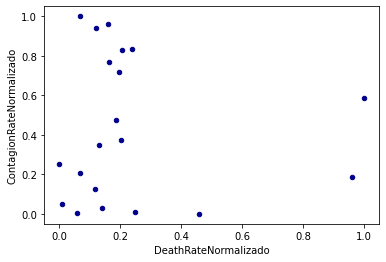

In [52]:
fecha_ultima.plot.scatter(x="DeathRateNormalizado",y="ContagionRateNormalizado", c="DarkBlue")

<AxesSubplot:xlabel='ZDeathRate', ylabel='ZContagionRate'>

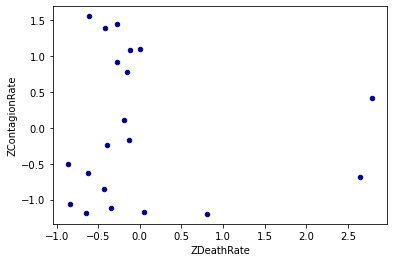

In [66]:
fecha_ultima.plot.scatter(x="ZDeathRate",y="ZContagionRate", c="DarkBlue")

In [100]:
dataCluster = fecha_ultima[["DeathRateNormalizado","ContagionRateNormalizado"]]

In [101]:
dataCluster

DeathRateNormalizado  ContagionRateNormalizado
500                0.160842                  0.960841
1039               0.249592                  0.010626
1546               0.238380                  0.834991
2084               0.129286                  0.346886
2585               0.162419                  0.769838
3145               0.458860                  0.000000
3643               0.204246                  0.828246
4177               0.067411                  0.206595
4667               0.140957                  0.031926
5206               0.000000                  0.250072
5711               0.960755                  0.186688
6216               0.059007                  0.006778
6713               1.000000                  0.585588
7246               0.118153                  0.124617
7779               0.202089                  0.373486
8312               0.068458                  1.000000
8863               0.007063                  0.049747
9395               0.196155                  0.718428
9896               0.186141                  0.474131
10440              0.121364                  0.938730

In [102]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Sacando la Sum of squared error para determinar el número apropiado de clusters

Text(0, 0.5, 'SSE')

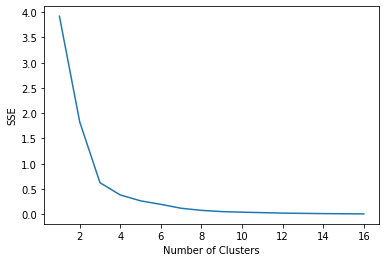

In [103]:
numClusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(dataCluster)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


### Cluster de death rate y contagionRate

In [104]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataCluster)
y_kmeans = kmeans.predict(dataCluster)

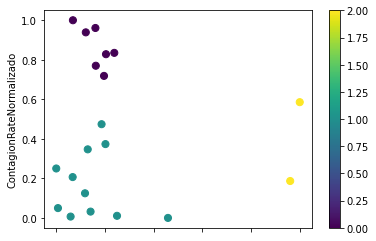

In [117]:
xlt = dataCluster.plot.scatter(x="DeathRateNormalizado",y="ContagionRateNormalizado",c=y_kmeans,s=50,cmap="viridis")
centers = kmeans.cluster_centers_

# plt.title("Clustering de DeathRate y ContagionRate", 
#           fontdict={'family': 'serif', 
#                     'color' : 'black',
#                     'weight': 'bold',
#                     'size': 18})
# plt.scatter(centers[:,0],centers[:,1],c="black",s=200, alpha=0.5)

# plt.show()

In [93]:
fecha_ultima["Cluster"] = y_kmeans

<ipython-input-93-94d3a31de3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fecha_ultima["Cluster"] = y_kmeans


In [96]:
fecha_ultima

Date_reported                   Country  New_cases  Cumulative_cases  \
500      2021-07-16                 Argentina      19697           4702657   
1039     2021-07-16                 Australia         85             31516   
1546     2021-07-16                    Brazil      57736          19209729   
2084     2021-07-16                    Canada        384           1421831   
2585     2021-07-16                     Chile       2366           1594496   
3145     2021-07-16                     China         54            119539   
3643     2021-07-16                  Colombia      17230           4565372   
4177     2021-07-16                     India      38949          31026829   
4667     2021-07-16                     Kenya        837            191020   
5206     2021-07-16                  Malaysia      13215            880782   
5711     2021-07-16                    Mexico      12116           2616827   
6216     2021-07-16                   Nigeria        159            169074   
6713     2021-07-16                      Peru       2316           2085883   
7246     2021-07-16               Philippines       5208           1490665   
7779     2021-07-16        Russian Federation      25704           5907999   
8312     2021-07-16                    Sweden        348           1093923   
8863     2021-07-16                  Thailand       9692            381907   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
500           610             100250    45267449       10.411664    2.131774   
1039            0                912    25550683        0.123351    2.893768   
1546         1556             537394   212821986        9.049045    2.797510   
2084            8              26458    37799407        3.764151    1.860840   
2585          158              34207    19144605        8.343604    2.145317   
3145            6               5607  1440297825        0.008300    4.690519   
3643          498             114337    50976248        8.976014    2.504440   
4177          542             412531  1382345085        2.245177    1.329594   
4667            9               3746    53968739        0.353970    1.961051   
5206          110               6613    32436963        2.715919    0.750810   
5711          230             235507   129166028        2.029641    8.999716   
6216            1               2126   206984347        0.081685    1.257438   
6713          146             194752    33050211        6.348665    9.336669   
7246           82              26314   109830324        1.357569    1.765252   
7779          799             146868   145945524        4.052163    2.485918   
8312            0              14643    10110233       10.835652    1.338577   
8863           67               3099    69830779        0.546928    0.811454   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global    Severity   SumRate  ZDeathRate  \
500             4.785370e+04        Alta  5.443730   -0.277017   
1039            1.810172e+02        Baja  1.785602    0.047681   
1546            9.190178e+05        Alta  5.298124    0.006664   
2084            1.208145e+04  Media Baja  2.622165   -0.392465   
2585            6.862084e+03  Media Alta  4.624632   -0.271245   
3145            3.870331e+04        Baja  2.817632    0.813304   
3643            5.231548e+04        Alta  5.093069   -0.118218   
4177            9.641399e+06  Media Baja  1.695827   -0.618837   
4667            2.317434e+03        Baja  1.318219   -0.349764   
5206            6.422362e+

In [99]:
ordenados = fecha_ultima.sort_values(by=['SumRate'] ,ascending=False)
ordenados

Date_reported                   Country  New_cases  Cumulative_cases  \
6713     2021-07-16                      Peru       2316           2085883   
5711     2021-07-16                    Mexico      12116           2616827   
500      2021-07-16                 Argentina      19697           4702657   
1546     2021-07-16                    Brazil      57736          19209729   
10440    2021-07-16  United States of America      38707          33643529   
8312     2021-07-16                    Sweden        348           1093923   
3643     2021-07-16                  Colombia      17230           4565372   
2585     2021-07-16                     Chile       2366           1594496   
9395     2021-07-16        The United Kingdom      47891           5281102   
9896     2021-07-16                   Ukraine        737           2243605   
7779     2021-07-16        Russian Federation      25704           5907999   
3145     2021-07-16                     China         54            119539   
2084     2021-07-16                    Canada        384           1421831   
1039     2021-07-16                 Australia         85             31516   
4177     2021-07-16                     India      38949          31026829   
7246     2021-07-16               Philippines       5208           1490665   
5206     2021-07-16                  Malaysia      13215            880782   
4667     2021-07-16                     Kenya        837            191020   
6216     2021-07-16                   Nigeria        159            169074   
8863     2021-07-16                  Thailand       9692            381907   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
6713          146             194752    33050211        6.348665    9.336669   
5711          230             235507   129166028        2.029641    8.999716   
500           610             100250    45267449       10.411664    2.131774   
1546         1556             537394   212821986        9.049045    2.797510   
10440         350             603170   331341050       10.172264    1.792826   
8312            0              14643    10110233       10.835652    1.338577   
3643          498             114337    50976248        8.976014    2.504440   
2585          158              34207    19144605        8.343604    2.145317   
9395           63             128593    67948282        7.786975    2.434965   
9896           17              52702    43686577        5.141888    2.348987   
7779          799             146868   145945524        4.052163    2.485918   
3145            6               5607  1440297825        0.008300    4.690519   
2084            8              26458    37799407        3.764151    1.860840   
1039            0                912    25550683        0.123351    2.893768   
4177          542             412531  1382345085        2.245177    1.329594   
7246           82              26314   109830324        1.357569    1.765252   
5206          110               6613    32436963        2.715919    0.750810   
4667            9               3746    53968739        0.353970    1.961051   
6216            1               2126   206984347        0.081685    1.257438   
8863           67               3099    69830779        0.546928    0.811454   

       Contagion Rate Global    Severity   SumRate  ZDeathRate  \
6713            1.549710e+04       Media  8.141468    2.793099   
5711            7.598179e+04        Baja  6.211686    2.649518   
500             4.785370e+04        Alta  5.443730   -0.277017   
1546            9.190178e+05        Alta  5.298124    0.006664   
10440           2.505896e+06        Alta  5.144601   -0.421447   
8312            2.486189e+03        Alta  5.137407   -0.615010   
3643            5.231548e+04        Alta  5.093069   -0.118218   
2585            6.862084e+03  Media Alta  4.624632   -0.271245   
9395            8.066576e+04  Media Alta  4.575769   -0.147822   
9896            2.203335e+

In [95]:
pcak = PCA(n_components=2)
pcak.fit(dataCluster)
ypca =pcak.transform(dataCluster)

In [69]:
pcak.explained_variance_ratio_

array([0.52029192, 0.47970808])

In [73]:
import numpy as np
np.cumsum(pcak.explained_variance_ratio_)

array([0.52029192, 1.        ])

In [70]:
import folium
import json

### Visualización en folium map

In [ ]:
geojson = open("countries.geojson")
geojson = json.load(geojson)

In [ ]:
geojson.keys()

In [ ]:
geojson["features"][0]["properties"]["CNTRY_NAME"]

In [ ]:
m = folium.Map()
folium.Choropleth(
    geo_data=geojson,
    name="choropleth",
    data = fecha_ultima,
    columns = ["Country","label"],
    key_on = "feature.properties.CNTRY_NAME",
    fill_color = "OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Cluster",
    nan_fill_color ="gray"
).add_to(m)

In [58]:
fecha_ultima[["Country","Cluster"]]

Country  Cluster
500                   Argentina        1
1039                  Australia        0
1546                     Brazil        1
2084                     Canada        0
2585                      Chile        1
3145                      China        0
3643                   Colombia        1
4177                      India        0
4667                      Kenya        0
5206                   Malaysia        0
5711                     Mexico        2
6216                    Nigeria        0
6713                       Peru        2
7246                Philippines        0
7779         Russian Federation        0
8312                     Sweden        1
8863                   Thailand        0
9395         The United Kingdom        1
9896                    Ukraine        0
10440  United States of America        1

In [ ]:
m

In [ ]:
m.save("CluterCovid.html")

In [59]:
append = fecha_ultima[["Country","Cluster"]]
append.reset_index(inplace=True)
merger = append[["Country","Cluster"]]
merger

Country  Cluster
0                  Argentina        1
1                  Australia        0
2                     Brazil        1
3                     Canada        0
4                      Chile        1
5                      China        0
6                   Colombia        1
7                      India        0
8                      Kenya        0
9                   Malaysia        0
10                    Mexico        2
11                   Nigeria        0
12                      Peru        2
13               Philippines        0
14        Russian Federation        0
15                    Sweden        1
16                  Thailand        0
17        The United Kingdom        1
18                   Ukraine        0
19  United States of America        1

In [216]:
PaisesClusters

Date_reported                   Country  New_cases  Cumulative_cases  \
0        2020-03-03                 Argentina          5                 5   
1        2020-03-04                 Argentina          0                 5   
2        2020-03-05                 Argentina          0                 5   
3        2020-03-06                 Argentina          1                 6   
4        2020-03-07                 Argentina          7                13   
...             ...                       ...        ...               ...   
10436    2021-07-12  United States of America       8224          33514946   
10437    2021-07-13  United States of America      37319          33552265   
10438    2021-07-14  United States of America      20450          33572715   
10439    2021-07-15  United States of America      32107          33604822   
10440    2021-07-16  United States of America      38707          33643529   

       New_deaths  Cumulative_deaths  Population  Contagion Rate  Death Rate  \
0               0                  0    45267449        0.000011    0.000000   
1               0                  0    45267449        0.000011    0.000000   
2               0                  0    45267449        0.000011    0.000000   
3               0                  0    45267449        0.000013    0.000000   
4               1                  1    45267449        0.000029    7.692308   
...           ...                ...         ...             ...         ...   
10436          77             601944   331341050       10.133348    1.796046   
10437         254             602198   331341050       10.144640    1.794806   
10438         211             602409   331341050       10.150829    1.794341   
10439         411             602820   331341050       10.160550    1.793850   
10440         350             603170   331341050       10.172264    1.792826   

       Contagion Rate Global Severity  Cluster  
0               5.087943e-02     Baja        0  
1               5.087943e-02     Baja        0  
2               5.087943e-02     Baja        0  
3               6.105531e-02     Baja        0  
4               1.322865e-01     Baja        0  
...                      ...      ...      ...  
10436           2.496318e+06     Alta        0  
10437           2.499098e+06     Alta        0  
10438           2.500621e+06     Alta        0  
10439           2.503013e+06     Alta        0  
10440           2.505896e+06     Alta        0  

[10441 rows x 12 columns]

In [60]:
PaisesClusters = CovidDF.merge(merger)


In [61]:
PaisesClustersFinal = PaisesClusters[["Date_reported","New_cases","New_deaths","Contagion Rate","Contagion Rate Global","Cluster"]].groupby(["Date_reported","Cluster"]).sum()
PaisesClustersFinal.reset_index(inplace=True)
PaisesClustersFinal

Date_reported  Cluster  New_cases  New_deaths  Contagion Rate  \
0       2020-01-04        0          1           0    6.943008e-08   
1       2020-01-05        0          0           0    6.943008e-08   
2       2020-01-06        0          3           0    2.777203e-07   
3       2020-01-07        0          0           0    2.777203e-07   
4       2020-01-08        0          0           0    2.777203e-07   
...            ...      ...        ...         ...             ...   
1604    2021-07-15        1     158041        2987    6.537201e+01   
1605    2021-07-15        2      13147         337    8.361828e+00   
1606    2021-07-16        0      95024        1641    2.039110e+01   
1607    2021-07-16        1     183975        3235    6.557522e+01   
1608    2021-07-16        2      14432         376    8.378306e+00   

      Contagion Rate Global  
0              3.237714e-01  
1              3.237714e-01  
2              1.295086e+00  
3              1.295086e+00  
4              1.295086e+00  
...                     ...  
1604           3.608311e+06  
1605           9.110988e+04  
1606           9.967631e+06  
1607           3.615097e+06  
1608           9.147888e+04  

[1609 rows x 6 columns]

In [62]:
Cluster1=PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==0]
Cluster2=PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==1]
Cluster3=PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==2]
ij=Cluster3["New_cases"].idxmax()
val = Cluster3.loc[ij]["New_cases"]
valin = Cluster3.loc[ij-3]["New_cases"]
valsu = Cluster3.loc[ij+3]["New_cases"] 
newval = val*.20 + valin*.40 + valsu*.40
Cluster3.loc[ij,"New_cases"] = newval

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [65]:
def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

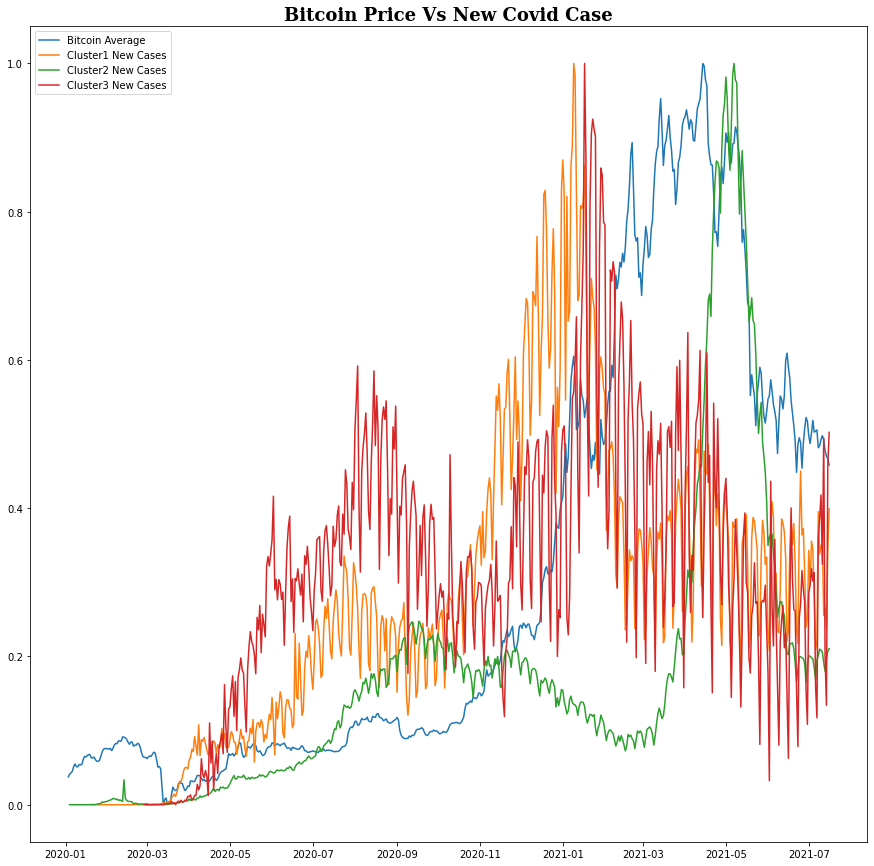

In [251]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C1 =minmax_norm_Pais(Cluster1)
C2 =minmax_norm_Pais(Cluster2)
C3 =minmax_norm_Pais(Cluster3)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C1
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==0]["Date_reported"]
plt.plot(x, y,label='Cluster1 New Cases')
y = C2
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==1]["Date_reported"]
plt.plot(x, y,label='Cluster2 New Cases')
y = C3
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==2]["Date_reported"]
plt.plot(x, y,label='Cluster3 New Cases')
plt.legend()

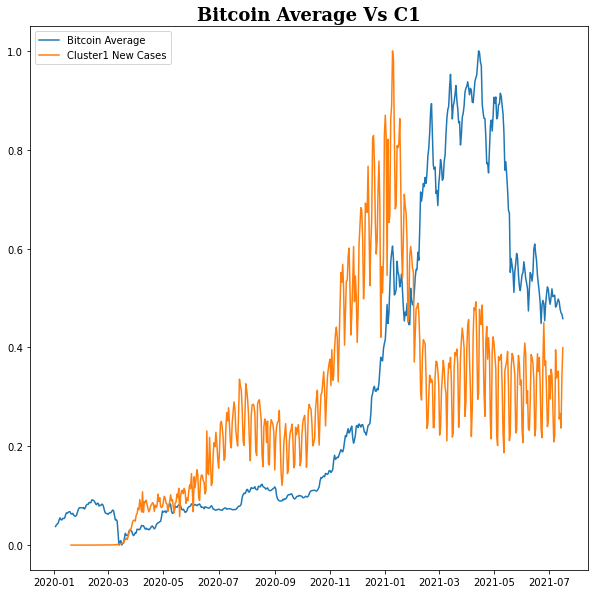

In [309]:
plt.figure(figsize = (10,10))
plt.title("Bitcoin Average Vs C1", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C1 =minmax_norm_Pais(Cluster1)
C2 =minmax_norm_Pais(Cluster2)
C3 =minmax_norm_Pais(Cluster3)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C1
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==0]["Date_reported"]
plt.plot(x, y,label='Cluster1 New Cases')
plt.legend()

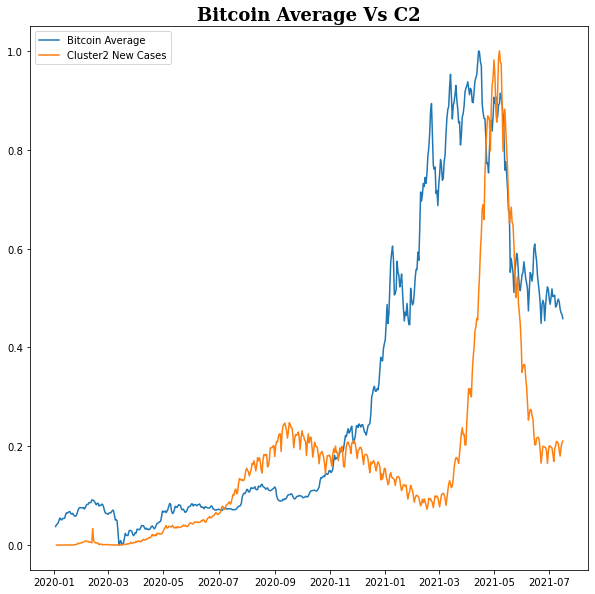

In [310]:
plt.figure(figsize = (10,10))
plt.title("Bitcoin Average Vs C2", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C1 =minmax_norm_Pais(Cluster1)
C2 =minmax_norm_Pais(Cluster2)
C3 =minmax_norm_Pais(Cluster3)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C2
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==1]["Date_reported"]
plt.plot(x, y,label='Cluster2 New Cases')
plt.legend()

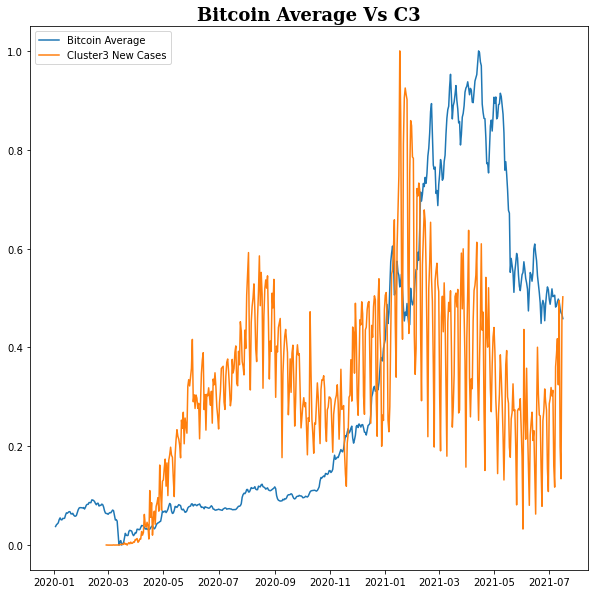

In [312]:
plt.figure(figsize = (10,10))
plt.title("Bitcoin Average Vs C3", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C1 =minmax_norm_Pais(Cluster1)
C2 =minmax_norm_Pais(Cluster2)
C3 =minmax_norm_Pais(Cluster3)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C3
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==2]["Date_reported"]
plt.plot(x, y,label='Cluster3 New Cases')
plt.legend()

In [297]:
Cluster10 = Cluster1[["Date_reported","New_cases","New_deaths"]].groupby("Date_reported").sum()
Cluster10.reset_index(inplace=True)
Cluster10Corr = Cluster10[["Date_reported","New_cases","New_deaths"]]
Cluster10Corr.columns = ["Date","New_cases","New_deaths"]
correlacion = Cluster10Corr.merge(bit)
corr1 = correlacion[["New_cases","New_deaths","Average","Volume"]]
corPear= corr1.corr(method="pearson")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.785882  0.488968  0.334889
New_deaths   0.785882    1.000000  0.580172  0.434432
Average      0.488968    0.580172  1.000000  0.640432
Volume       0.334889    0.434432  0.640432  1.000000

In [298]:
corPear= corr1.corr(method="spearman")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.785779  0.740560  0.305854
New_deaths   0.785779    1.000000  0.625532  0.427059
Average      0.740560    0.625532  1.000000  0.532581
Volume       0.305854    0.427059  0.532581  1.000000

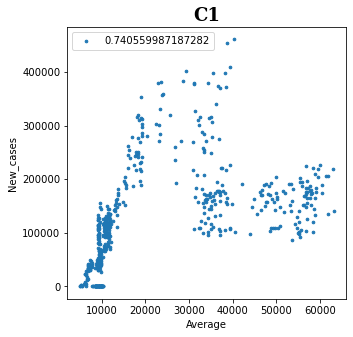

In [299]:
plt.figure(figsize = (5,5))
plt.title("C1", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Average"]["New_cases"]
plt.scatter(correlacion["Average"], correlacion["New_cases"], marker='o', s=7,label=labels);
plt.xlabel('Average')
plt.ylabel('New_cases')
plt.legend()
plt.show()

In [300]:
Cluster10 = Cluster2[["Date_reported","New_cases","New_deaths"]].groupby("Date_reported").sum()
Cluster10.reset_index(inplace=True)
Cluster10Corr = Cluster10[["Date_reported","New_cases","New_deaths"]]
Cluster10Corr.columns = ["Date","New_cases","New_deaths"]
correlacion = Cluster10Corr.merge(bit)
corr1 = correlacion[["New_cases","New_deaths","Average","Volume"]]
corPear= corr1.corr(method="pearson")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.876142  0.610928  0.329680
New_deaths   0.876142    1.000000  0.568068  0.275170
Average      0.610928    0.568068  1.000000  0.644418
Volume       0.329680    0.275170  0.644418  1.000000

In [301]:
corPear= corr1.corr(method="spearman")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.948705  0.724749  0.131335
New_deaths   0.948705    1.000000  0.714445  0.141228
Average      0.724749    0.714445  1.000000  0.527951
Volume       0.131335    0.141228  0.527951  1.000000

NameError: name 'corPear' is not defined

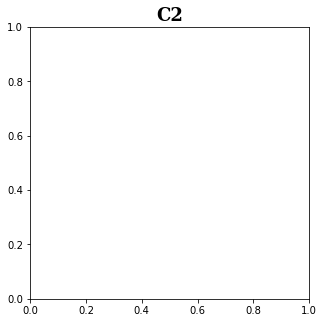

In [29]:
plt.figure(figsize = (5,5))
plt.title("C2", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Average"]["New_cases"]
plt.scatter(correlacion["Average"], correlacion["New_cases"], marker='o', s=7,label=labels);
plt.xlabel('Average')
plt.ylabel('New_cases')
plt.legend()
plt.show()

In [303]:
Cluster10 = Cluster3[["Date_reported","New_cases","New_deaths"]].groupby("Date_reported").sum()
Cluster10.reset_index(inplace=True)
Cluster10Corr = Cluster10[["Date_reported","New_cases","New_deaths"]]
Cluster10Corr.columns = ["Date","New_cases","New_deaths"]
correlacion = Cluster10Corr.merge(bit)
corr1 = correlacion[["New_cases","New_deaths","Average","Volume"]]
corPear= corr1.corr(method="pearson")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.783340  0.392582  0.191872
New_deaths   0.783340    1.000000  0.396745  0.208774
Average      0.392582    0.396745  1.000000  0.645312
Volume       0.191872    0.208774  0.645312  1.000000

In [304]:
corPear= corr1.corr(method="spearman")
corPear

New_cases  New_deaths   Average    Volume
New_cases    1.000000    0.787217  0.493914  0.069405
New_deaths   0.787217    1.000000  0.429248  0.119792
Average      0.493914    0.429248  1.000000  0.561375
Volume       0.069405    0.119792  0.561375  1.000000

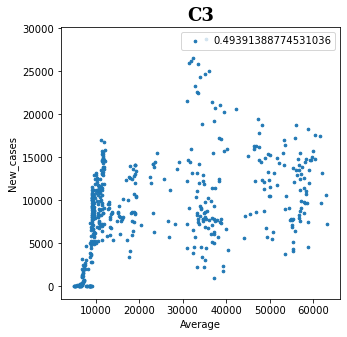

In [305]:
plt.figure(figsize = (5,5))
plt.title("C3", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
labels = corPear.loc["Average"]["New_cases"]
plt.scatter(correlacion["Average"], correlacion["New_cases"], marker='o', s=7,label=labels);
plt.xlabel('Average')
plt.ylabel('New_cases')
plt.legend()
plt.show()

## Co-ocurrence graph

### Recolección de Tweets

In [1]:
import tweepy
import csv

In [2]:
consumer_key = 'eh8dsxKZkoVYtoG7a0Y1vY8eG'
consumer_secret= 'R6B9vReXpHsSZrk35adwbuM5Pyeo43BWyvXwoUw5qNG7TREYnz'
access_token = '2578673784-vVOXKQDtWs4PMNip06mvIXZwHwXwvz1o4gaJnNP'
access_token_secret = 'RU4tOzuyygFOe8VCsVD2fHO8D9tvHDSdXYe0OpdqK5uHW'


In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
data = []
num = 0
id_Set = set() 
for t in tweepy.Cursor(api.search, q="#Bitcoin OR BTC OR Bitcoin -filter:retweets" ,
                      lang="es",
                      tweet_mode='extended',
                       
                       
                     ).items(50000):
    num+=1
    try:
        texto = t.retweeted_status.full_text
        
        
    
    except:
        texto = t.full_text
        
    print(texto)
    texto.replace(","," ")
    print(texto)
    fecha = t.created_at
    idd = t.id
    tweet = (str(idd),fecha,texto)
    if tweet:
        if idd not in id_Set:
            id_Set.add(idd)
            data.append(tweet)

#Bitcoin está atascado entre $ 45K y $ 50K pero aún no ha terminado, ¿Por qué? - https://t.co/m3EXIT9wKA https://t.co/0iCudZLa0D
#Bitcoin está atascado entre $ 45K y $ 50K pero aún no ha terminado, ¿Por qué? - https://t.co/m3EXIT9wKA https://t.co/0iCudZLa0D
@ale_ponce2 Que mente mas tonta, con vandalizar los cajeros no se logra mas que violencia.
Si desea bloquear o resistir al #bitcoin pues no vaya a los cajeros ni descargue la app #ChivoWallet.

Hay q ser mas inteligentes.
@ale_ponce2 Que mente mas tonta, con vandalizar los cajeros no se logra mas que violencia.
Si desea bloquear o resistir al #bitcoin pues no vaya a los cajeros ni descargue la app #ChivoWallet.

Hay q ser mas inteligentes.
#QueChivo, 8 días para #bitcoin
#QueChivo, 8 días para #bitcoin
Resumen semanal: los 5 acontecimientos más destacados de la minería Bitcoin https://t.co/4g752z2YK9
Resumen semanal: los 5 acontecimientos más destacados de la minería Bitcoin https://t.co/4g752z2YK9
Jack Dorsey planea crear plataform

El precio del dolar bitcoin de Venezuela se encuentra en Bs. 3.718.873,12. #Dolar #Bitcoin #Venezuela
El precio del dolar bitcoin de Venezuela se encuentra en Bs. 3.718.873,12. #Dolar #Bitcoin #Venezuela
@flakita_limones @shani_btc Mía cambia el @ horita t debo la vida
@flakita_limones @shani_btc Mía cambia el @ horita t debo la vida
El BCIE busca consultora que lo ayude a la implementación de Bitcoin en El Salvador https://t.co/PxzQ8LUCYs
El BCIE busca consultora que lo ayude a la implementación de Bitcoin en El Salvador https://t.co/PxzQ8LUCYs
Ciudadano venezolano finge secuestro para estafar $1,150,000 en Bitcoin https://t.co/sSNp9yXjAY
Ciudadano venezolano finge secuestro para estafar $1,150,000 en Bitcoin https://t.co/sSNp9yXjAY
Top 10 criptonoticias: MicroStrategy compra 3,907 BTC, España, Cuba y criptomonedas, Adam Back proyecta BTC a $100 mil… https://t.co/SuZESNHsu4
Top 10 criptonoticias: MicroStrategy compra 3,907 BTC, España, Cuba y criptomonedas, Adam Back proyecta BTC a $1

Entra y descubre nuestros articúlos para ganar dinero #ganardinero, sigueme, todos los domingos sigo a la gente que me sigue. TradeTracker- https://t.co/kit1O4caR4 #ganardinero #bitcoin #money
Entra y descubre nuestros articúlos para ganar dinero #ganardinero, sigueme, todos los domingos sigo a la gente que me sigue. TradeTracker- https://t.co/kit1O4caR4 #ganardinero #bitcoin #money
El 'cabeza y hombros' invertido del bitcoin hacia los 60.000 dólares sigue vigente https://t.co/QWwtjIKUoL https://t.co/iFQJRQeeid
El 'cabeza y hombros' invertido del bitcoin hacia los 60.000 dólares sigue vigente https://t.co/QWwtjIKUoL https://t.co/iFQJRQeeid
@henrychavez133 "En EL Salvador no queremos bitcoin" el país no lo representan unos cuantos pelados gritando por algo que ni conocen #busquenalgomejorquehacer
@henrychavez133 "En EL Salvador no queremos bitcoin" el país no lo representan unos cuantos pelados gritando por algo que ni conocen #busquenalgomejorquehacer
@JoseValdezSV Así calientitos si a

El Bitcoin en El Salvador se pudo haber implementado de forma orgánica con inversión privada. Querer hacerlo por la fuerza y 100% con fondos públicos es sinonimo de corrupción. https://t.co/HNAZahLWhh
El Bitcoin en El Salvador se pudo haber implementado de forma orgánica con inversión privada. Querer hacerlo por la fuerza y 100% con fondos públicos es sinonimo de corrupción. https://t.co/HNAZahLWhh
@_ManRom_ @CCerralba98 @VindiKevin @pppua Que bueno que la izquierda,centro, derecha y nacional socialistas odien o desprecien las criptomonedas,solo beneficiará a los que creemos en la libertad y es para todos los bolsillos porque el bitcoin empezó valiendo un moco, sigan odiando a las criptos que nos ayudan al bolsillo
@_ManRom_ @CCerralba98 @VindiKevin @pppua Que bueno que la izquierda,centro, derecha y nacional socialistas odien o desprecien las criptomonedas,solo beneficiará a los que creemos en la libertad y es para todos los bolsillos porque el bitcoin empezó valiendo un moco, sigan o

@WalterAlemanSV Ni an de ser Salvadoreños ahí a cualquiera le pueden pedir que se tome la foto. Pobre gente ni idea tienen a lo que se están oponiendo. La diáspora SI al Bitcoin
@WalterAlemanSV Ni an de ser Salvadoreños ahí a cualquiera le pueden pedir que se tome la foto. Pobre gente ni idea tienen a lo que se están oponiendo. La diáspora SI al Bitcoin
🖥 Las tecnológicas el gran inquilino de oficinas en España.

₿ ‘El precio del Bitcoin es lo menos interesante en las criptos’.

Afirma #DanSchulman, consejero delegado de @PayPal.Las criptos harán el sistema financiero más eficiente y se prepara para admitir monedas digitales. https://t.co/SZAWIEZuVd
🖥 Las tecnológicas el gran inquilino de oficinas en España.

₿ ‘El precio del Bitcoin es lo menos interesante en las criptos’.

Afirma #DanSchulman, consejero delegado de @PayPal.Las criptos harán el sistema financiero más eficiente y se prepara para admitir monedas digitales. https://t.co/SZAWIEZuVd
@gerarcortez @ale_ponce2 @FGR_SV @PNCSV 

@EsEmilioGarra @DiegoRuzzarin Nah, si el punto de bitcoin o cualquier cripto es ser desentralizado entonces que no aplique la ley en ese tipo de estafas , ellos se lo ganaron
@EsEmilioGarra @DiegoRuzzarin Nah, si el punto de bitcoin o cualquier cripto es ser desentralizado entonces que no aplique la ley en ese tipo de estafas , ellos se lo ganaron
@MoisesssRomero Estaría bien verlo en perspectiva. Igual hay gente que prefiere prescindir de la banca o de la minería de oro antes que del bitcoin... https://t.co/zKWF3FIzOn
@MoisesssRomero Estaría bien verlo en perspectiva. Igual hay gente que prefiere prescindir de la banca o de la minería de oro antes que del bitcoin... https://t.co/zKWF3FIzOn
@guevara_tuiter Vieja loca y atarantada, el bitcoin q lo entendés si SOS pasmada te han contado parasito del pueblo jaja
@guevara_tuiter Vieja loca y atarantada, el bitcoin q lo entendés si SOS pasmada te han contado parasito del pueblo jaja
@manuelochoasv @MilenaMayorga @chivowallet Bitcoin tiene u

Una inversión con conocimiento, mejora, por mucho, tu rendimiento.

Aprende más sobre #Bitcoin
Una inversión con conocimiento, mejora, por mucho, tu rendimiento.

Aprende más sobre #Bitcoin
#Criptomonedas #BTCUSD Mi informe sobre #Bitcoin para EnQuéInvertir... https://t.co/LTyiaeorTG
#Criptomonedas #BTCUSD Mi informe sobre #Bitcoin para EnQuéInvertir... https://t.co/LTyiaeorTG
@luisilloCifer @MilenaMayorga A nadie le pagaran en Bitcoin.

Solo es una "Herramienta" que podra ser utilizada para que la Diaspora pueda eliminar el pago del envio en Remesas, dinero que se puede traducir a un mayor ingreso para las familias acá en el salvador.
@luisilloCifer @MilenaMayorga A nadie le pagaran en Bitcoin.

Solo es una "Herramienta" que podra ser utilizada para que la Diaspora pueda eliminar el pago del envio en Remesas, dinero que se puede traducir a un mayor ingreso para las familias acá en el salvador.
TA: Bitcoin se consolida, por qué BTC podría comenzar un nuevo aumento https://t.co/pRxQIsAQ

@prensagrafica Todo es raro alcanza para la comodidad de los reos para poner el bitcoin pero no he visto aun que remodelen escuelas o que garanticen empleo el nuevo gobierno jugo con nuestra fe
@prensagrafica Todo es raro alcanza para la comodidad de los reos para poner el bitcoin pero no he visto aun que remodelen escuelas o que garanticen empleo el nuevo gobierno jugo con nuestra fe
Yo soy diáspora, así que por mi no hablen gorgojos terenguitos 
Estoy lista y digo si al #Bitcoin 
Mis “Subsidios “ para mi familia, serán en #Bitcoin a partir del 7 de Septiembre. https://t.co/tflIDB1mQY
Yo soy diáspora, así que por mi no hablen gorgojos terenguitos 
Estoy lista y digo si al #Bitcoin 
Mis “Subsidios “ para mi familia, serán en #Bitcoin a partir del 7 de Septiembre. https://t.co/tflIDB1mQY
Perspectiva semanal de Bitcoin: Es probable que se produzca un repunte hasta USD 50,000 antes de conocer los datos sobre el empleo en Estados Unidos el próximo viernes

El precio de Bitcoin sigue por de

@Chelita_NI Estos frentudos si que son pendejos la diáspora ya sabe cómo usar el bitcoin y ellos haciendo estupideces
@Chelita_NI Estos frentudos si que son pendejos la diáspora ya sabe cómo usar el bitcoin y ellos haciendo estupideces
@Chinita_Lohan Arriba El Salvador 🇸🇻 vamos con todo SI AL BITCOIN
@Chinita_Lohan Arriba El Salvador 🇸🇻 vamos con todo SI AL BITCOIN
La Bandera anti-Bitcoin no es de ningún partido político es de los ciudadanos Salvadoreños que fechamos una medida  fatídica que solo beneficia a Bukele y su séquito y perjudica al resto de Salvadoreños. https://t.co/cEgwkNTIOL
La Bandera anti-Bitcoin no es de ningún partido político es de los ciudadanos Salvadoreños que fechamos una medida  fatídica que solo beneficia a Bukele y su séquito y perjudica al resto de Salvadoreños. https://t.co/cEgwkNTIOL
@lorenagpeam La maitrita ni sabe de qué está hablando, seguro está en contra del #biscuits, solo imagarse lo ridículo que uno se escucharia en su momento oponerse al Internet, 

@rebeldlara21 antes no tenias ni insumos médicos , yo pase esperando una operación mas de 1 año , ahora gracias a Dios y ala buena gestión del presidente @nayibbukele ya estoy operado . hay que tener fe y ser valientes . EL #bitcoin es bueno para el salvador  y una gran oportunidad ....
@rebeldlara21 antes no tenias ni insumos médicos , yo pase esperando una operación mas de 1 año , ahora gracias a Dios y ala buena gestión del presidente @nayibbukele ya estoy operado . hay que tener fe y ser valientes . EL #bitcoin es bueno para el salvador  y una gran oportunidad ....
Bitcoin se supone que es distribuido y remueve a los intermediarios.

La realidad es que con la implementación de la Ley Bitcoin y la Chivo Wallet/ATM cada día que pasa veo se acumulan más y más intermediarios. 🙃
Bitcoin se supone que es distribuido y remueve a los intermediarios.

La realidad es que con la implementación de la Ley Bitcoin y la Chivo Wallet/ATM cada día que pasa veo se acumulan más y más intermediarios. 

@efebles24 @TDXPapp @TDXPappESP @TDXPappJPN Lol!! Ya viste #BTC? Se esta cayendo del precipicio https://t.co/0sgBE2e69k
@efebles24 @TDXPapp @TDXPappESP @TDXPappJPN Lol!! Ya viste #BTC? Se esta cayendo del precipicio https://t.co/0sgBE2e69k
El bitcoin es una moneda de uso legal en el país y cualquiera en este país libre es libre de escoger cualquier billetera digital no sólo "chivowallet" pero como el estado ofrece 30 dólares solo por eso la usarán el estado y el banco no tienen que intervenir pero ¿porque lo hace?
El bitcoin es una moneda de uso legal en el país y cualquiera en este país libre es libre de escoger cualquier billetera digital no sólo "chivowallet" pero como el estado ofrece 30 dólares solo por eso la usarán el estado y el banco no tienen que intervenir pero ¿porque lo hace?
@ChristianDiffer Aquí en Los Ángeles hay cajeros de bitcoin en algunas gasolineras. Yo estoy listo.
@ChristianDiffer Aquí en Los Ángeles hay cajeros de bitcoin en algunas gasolineras. Yo estoy listo.


@anamag_figueroa Pues te vas a sorprender como los van a despreciar más, cuando fracase esa idiotez del bitcoin, si la gente no voto por ustedes, no se engañen votaron por la N y hoy los van a sacar por corruptos ratas.
@anamag_figueroa Pues te vas a sorprender como los van a despreciar más, cuando fracase esa idiotez del bitcoin, si la gente no voto por ustedes, no se engañen votaron por la N y hoy los van a sacar por corruptos ratas.
@DiegoRuzzarin Viene de caída el bitcoin para que luego Elon Musk diga "ai ai k bomito" y suba un 300%
@DiegoRuzzarin Viene de caída el bitcoin para que luego Elon Musk diga "ai ai k bomito" y suba un 300%
@ECastroES Quien pagó el viaje a osiris luna, cuanto empleados ppi tienen y cuanto ganan los diputados y asistentes. 
Porque quieren obligar a usar el bitcoin, y porque no hicieron un referéndum para saber si tiene mayoria popular.
Porque no investigan la ONG de gallegos.
@ECastroES Quien pagó el viaje a osiris luna, cuanto empleados ppi tienen y cuant

El mismo que hizo la pancarta, la va a colgar (de noche como siempre saben hacer), y ese mismo manda la foto por WhatsApp. 

¡Ah! pero con eso ya salen diciendo que todo Sonsonate está contra el #Bitcoin 

El alcalde @RafaelArevaloES debería mandar a quitar ese obstáculo visual. https://t.co/Nv9iwuq0mx
El mismo que hizo la pancarta, la va a colgar (de noche como siempre saben hacer), y ese mismo manda la foto por WhatsApp. 

¡Ah! pero con eso ya salen diciendo que todo Sonsonate está contra el #Bitcoin 

El alcalde @RafaelArevaloES debería mandar a quitar ese obstáculo visual. https://t.co/Nv9iwuq0mx
@abarcaxyz @IracundoCa @Effy_GO @KFC_sv @nayibbukele Vaya, esos 30$ si que los guarden.

Pero en un país con la.canasta básica tan cara crees que la gente va a poder ahorrar 100$ para invertir los en bitcoin
@abarcaxyz @IracundoCa @Effy_GO @KFC_sv @nayibbukele Vaya, esos 30$ si que los guarden.

Pero en un país con la.canasta básica tan cara crees que la gente va a poder ahorrar 100$ para 

$SOL primer MEGASHORT  de la Noche CERRADO esta moneda se ve que dará pasta toda la noche.
#BTC #ETH #Shib #DOGE #AMC #GME https://t.co/vd3kgxq7KL
$SOL primer MEGASHORT  de la Noche CERRADO esta moneda se ve que dará pasta toda la noche.
#BTC #ETH #Shib #DOGE #AMC #GME https://t.co/vd3kgxq7KL
@lorenagpeam Y q opinas de que cuba también va a utilizar bitcoin?? 🤔
@lorenagpeam Y q opinas de que cuba también va a utilizar bitcoin?? 🤔
@KFC_sv @ZeladaWilber @nayibbukele Sr @KFC_sv
Nos merecemos un BISCUITS de cortesía cada q vayamos a consumir su producto...
No lo creen??🤔

Mire q estoy pensando seriamente ir a gastarme mis $30 bitcoin ahi😏😋
@KFC_sv @ZeladaWilber @nayibbukele Sr @KFC_sv
Nos merecemos un BISCUITS de cortesía cada q vayamos a consumir su producto...
No lo creen??🤔

Mire q estoy pensando seriamente ir a gastarme mis $30 bitcoin ahi😏😋
7 de septiembre 🚀
$Btc https://t.co/umgdtSHKLq
7 de septiembre 🚀
$Btc https://t.co/umgdtSHKLq
@BenitoCarmona24 @FCristales "el bitcoin no hay regi

@thaliaquincoces @LaTRex_ @PauVitar @GAspiolea @grces_ana04 @IliahRaskolnik2 @therealyuls @Inaridrawings @XeroX_Cosplay @LisandraRodrg18 @gaby_rives @shani_btc @AdrianPeachy @el_arte_sucede @kimitokatt Ay, muchas gracias niña linda 🖤
@thaliaquincoces @LaTRex_ @PauVitar @GAspiolea @grces_ana04 @IliahRaskolnik2 @therealyuls @Inaridrawings @XeroX_Cosplay @LisandraRodrg18 @gaby_rives @shani_btc @AdrianPeachy @el_arte_sucede @kimitokatt Ay, muchas gracias niña linda 🖤
Yo estoy a favor del Bitcoin y del micon también,eso si bien lavado.
Yo estoy a favor del Bitcoin y del micon también,eso si bien lavado.
Investigar es necesario; #satoshis #bitcoin https://t.co/DKj3SkYxiA
Investigar es necesario; #satoshis #bitcoin https://t.co/DKj3SkYxiA
@Oscar_revelo @FCristales @nayibbukele no sabes lo que estas hablando

te recomiendo que vayas a ver cuantas personas son millonarios por ahorrar en bitcoin

googlea que significa HODL y diamond hands https://t.co/8Qqm9rP4yp
@Oscar_revelo @FCristales @nayibb

@salgari22 Yo jugue yacks, salta cuerda, hule, arranca cebolla, ladrón librado, mica, canicas (a la güimba) capirucho, etc... y estoy ansiosa por mi regalo de cumpleaños adelantado con el bitcoin.
@salgari22 Yo jugue yacks, salta cuerda, hule, arranca cebolla, ladrón librado, mica, canicas (a la güimba) capirucho, etc... y estoy ansiosa por mi regalo de cumpleaños adelantado con el bitcoin.
@americogermanic @Mercyhdez06 Pufff jejeje, eres normal? Naaa sin duda eres un anormal, es tan obvio que la mayoría está de acuerdo con el bitcoin, solo son unos 3 🤡 los que no quieren al país los que se oponen !!
@americogermanic @Mercyhdez06 Pufff jejeje, eres normal? Naaa sin duda eres un anormal, es tan obvio que la mayoría está de acuerdo con el bitcoin, solo son unos 3 🤡 los que no quieren al país los que se oponen !!
@eligiovelmar @soynachoflores Entiendo que si compras #btc son tuyos y eso es algo privado. Las monedas fiat no son privadas
@eligiovelmar @soynachoflores Entiendo que si compras

@JoseValdezSV Esta disrupción tecnológica , del internet del dinero, con su criptomoneda el bitcoin.
Tarde o temprano transformará completamente la economía mundial y todos los países adoptaran las criptomonedas.
Ser los primeros traerá grandes beneficios al primer país en adoptarla.
@JoseValdezSV Esta disrupción tecnológica , del internet del dinero, con su criptomoneda el bitcoin.
Tarde o temprano transformará completamente la economía mundial y todos los países adoptaran las criptomonedas.
Ser los primeros traerá grandes beneficios al primer país en adoptarla.
@nayibbukele Hey ya se me antojaron🤤🤤Me encantan los biscuits 🥰  Señores de @KFC_sv reciben Bitcoin??? Tengo unos satoshi por ahí 🤑
@nayibbukele Hey ya se me antojaron🤤🤤Me encantan los biscuits 🥰  Señores de @KFC_sv reciben Bitcoin??? Tengo unos satoshi por ahí 🤑
$btc la garra del oso a frenado a los toros,  quien ganará la batalla.   46 se ve en el horizonte.   $btc short mode
$btc la garra del oso a frenado a los toros,  qui

@nayibbukele Ni imaginar quiénes son el equipo #Bitcoin 😄🤭🤭
@nayibbukele Ni imaginar quiénes son el equipo #Bitcoin 😄🤭🤭
Más que su ignorancia sobre @elonmusk y el #Bitcoin, sus comentarios son fiel reflejo de la miopía, el desprecio al pueblo y la baja autoestima que caracteriza a la vieja clase política 🦕🦖 https://t.co/h0vbPeSwoE
Más que su ignorancia sobre @elonmusk y el #Bitcoin, sus comentarios son fiel reflejo de la miopía, el desprecio al pueblo y la baja autoestima que caracteriza a la vieja clase política 🦕🦖 https://t.co/h0vbPeSwoE
@chinchontepec22 @nayibbukele Jajajaja si él ya va con su bitcoin q caso le va hacer jajajaja los oligarcas corruptos del siglo lo que quieren es tener sus finquitas d nuevo el pueblo salvadoreño jamás les interesó lo vieron siempre d menos lo q más les interesa los frutos q les el país son como el azadón
@chinchontepec22 @nayibbukele Jajajaja si él ya va con su bitcoin q caso le va hacer jajajaja los oligarcas corruptos del siglo lo que quieren es t

@marioNanceSv_ 😋. Unos se van y hacen clientes nuevos!   Gastare mis $30de bitcoin. En biscuit. 😁😁😁
@marioNanceSv_ 😋. Unos se van y hacen clientes nuevos!   Gastare mis $30de bitcoin. En biscuit. 😁😁😁
Vamos hacía el futuro... 😎
#Bitcoin https://t.co/XHdxmEQRwK
Vamos hacía el futuro... 😎
#Bitcoin https://t.co/XHdxmEQRwK
@FCristales @nayibbukele Usen el dolar para gastos

Usen el Bitcoin para ahorrar

El Bitcoin es volatil pero su valor siempre va ir subiendo entre mas tiempo lo guarden, no gasten los $30, guardenlos y vean como se mueve el mercado https://t.co/aVnkbcM8Nj
@FCristales @nayibbukele Usen el dolar para gastos

Usen el Bitcoin para ahorrar

El Bitcoin es volatil pero su valor siempre va ir subiendo entre mas tiempo lo guarden, no gasten los $30, guardenlos y vean como se mueve el mercado https://t.co/aVnkbcM8Nj
@nayibbukele QUE BUENO  PAGAR CON BITCÓIN EL POLLO😉TAMBIÉN
@nayibbukele QUE BUENO  PAGAR CON BITCÓIN EL POLLO😉TAMBIÉN
Y usted ya le dieron paja de usar bitcoin?

Espero

@ArgentinaLara @KFC_sv @nayibbukele También quieren cancelar a Cuba por querer poner el Bitcoin en la isla
@ArgentinaLara @KFC_sv @nayibbukele También quieren cancelar a Cuba por querer poner el Bitcoin en la isla
@eduardoperea26 @criptobastardo @mxgxw_alpha Qué tal, Eduardo. Quiero compartir esta idea contigo: Vende todo lo que no sea bitcoin y compra más #bitcoin.
@eduardoperea26 @criptobastardo @mxgxw_alpha Qué tal, Eduardo. Quiero compartir esta idea contigo: Vende todo lo que no sea bitcoin y compra más #bitcoin.
El precio del dolar bitcoin de Venezuela se encuentra en Bs. 3.867.383,04. #Dolar #Bitcoin #Venezuela
El precio del dolar bitcoin de Venezuela se encuentra en Bs. 3.867.383,04. #Dolar #Bitcoin #Venezuela
Hasta los pocos que están en contra del #Bitcoin serán favorecidos porque sus familiares en USA ya no tendrían que pagar grandes comisiones al enviar remesas en Bitcoins! https://t.co/yYr39rGznz
Hasta los pocos que están en contra del #Bitcoin serán favorecidos porque sus

@YamilehtRivera @SilviaOstorgaE @EduardoBatarse Como la saqueron los mismo de siempre por décadas que tiene de malo que la saquen estos nuevos verdad? 🤦‍♂️🤦‍♂️ Dejen de defender políticos al final nosotros no ganamos nada ellos se llena las bolsas de $$$ como este gobierno robando en pandemia y hoy con Bitcoin
@YamilehtRivera @SilviaOstorgaE @EduardoBatarse Como la saqueron los mismo de siempre por décadas que tiene de malo que la saquen estos nuevos verdad? 🤦‍♂️🤦‍♂️ Dejen de defender políticos al final nosotros no ganamos nada ellos se llena las bolsas de $$$ como este gobierno robando en pandemia y hoy con Bitcoin
@MigueVaquerano Tiemblan los cajeros de Bitcoin 😁
@MigueVaquerano Tiemblan los cajeros de Bitcoin 😁
El fondo monetario internacional se acaba de inventar un nuevo activo directamente del aire, desea asignarle un valor totalmente arbitrario y espera que los países se los acepten mutuamente a cambio de recursos reales por ellos.

#Bitcoin #OptOut https://t.co/iV6vpfBvva
El fo

@nayibbukele @KFC_sv Desde hoy en adelante todos los terengos del @FMLNoficial ➕ @ARENAOFICIAL S.A. de C.V. les hará daño la comida de @KFC_ES . Vamos más  #Bitcoin
@nayibbukele @KFC_sv Desde hoy en adelante todos los terengos del @FMLNoficial ➕ @ARENAOFICIAL S.A. de C.V. les hará daño la comida de @KFC_ES . Vamos más  #Bitcoin
@FMLNoficial Cuba si al bitcoin. 🤡
@FMLNoficial Cuba si al bitcoin. 🤡
Que #Chivo directo desde Soya si al #Bitcoin😎 https://t.co/xKaiztq9Ww
Que #Chivo directo desde Soya si al #Bitcoin😎 https://t.co/xKaiztq9Ww
#Solana en los $100 dólares sin ser pumpeado por #bitcoin, vamos por más 😌. #Solanart #SolanaSummer
#Solana en los $100 dólares sin ser pumpeado por #bitcoin, vamos por más 😌. #Solanart #SolanaSummer
@lulashotmailcom SOY PARTE DE LA DIÁSPORA Y VAMOS ADELANTE CON TODOS LOS PODERES DIGO SI LA MONEDA VIRTUAL DEL BITCOIN. https://t.co/9d50ravBoc
@lulashotmailcom SOY PARTE DE LA DIÁSPORA Y VAMOS ADELANTE CON TODOS LOS PODERES DIGO SI LA MONEDA VIRTUAL DEL BITCO

@FMLNoficial 3 pelones son la diaspora????? Jajajaja
Mejor q digan " 3 de la Diaspora dicen no al bitcoin" para q les crean mas 🤣🤣🤣🤣🤣🤣
@FMLNoficial 3 pelones son la diaspora????? Jajajaja
Mejor q digan " 3 de la Diaspora dicen no al bitcoin" para q les crean mas 🤣🤣🤣🤣🤣🤣
@ILoveCalifas @Chelita_NI Cual es la contra; el Bitcoin pueda que ayude
@ILoveCalifas @Chelita_NI Cual es la contra; el Bitcoin pueda que ayude
@anamag_figueroa Ha ha ha ha yo soy diáspora y ARRIBA EL BITCOIN 👌👌👌👌👌
@anamag_figueroa Ha ha ha ha yo soy diáspora y ARRIBA EL BITCOIN 👌👌👌👌👌
Bienvenido
Bitcoin
Bienvenido
Bitcoin
@feliperaytyson ¿Que acaso es pecado pronunciar mal un nombre en inglés?? 
Es mediocre y estúpido que #BukeleMarero impulse el bitcoin cuando el 70% de la población es pobre y 40% vive en extrema pobreza o lo mismo apenas y tienen para comer y vivir. 
Y tu como andas de inglés?? Nativo? https://t.co/BAAOwNxzB4
@feliperaytyson ¿Que acaso es pecado pronunciar mal un nombre en inglés?? 
Es mediocre y estúp

@chinchontepec22 esque como alguien dijo por alli, si usted fue campeon den jugar chivolas, trompo, yoyo, la lleva, la holla, carambola, chintas, escondidas, el #Bitcoin  no es para usted
@chinchontepec22 esque como alguien dijo por alli, si usted fue campeon den jugar chivolas, trompo, yoyo, la lleva, la holla, carambola, chintas, escondidas, el #Bitcoin  no es para usted
Si al #Biscuit si al #Bitcoin gracias a @KFC_sv 

@MirtaJimenez13 @LauraPocaSV @19fender84 @MrCuchilla @MrElegantesv @Chelita_NI https://t.co/FzIwLlkG4B
Si al #Biscuit si al #Bitcoin gracias a @KFC_sv 

@MirtaJimenez13 @LauraPocaSV @19fender84 @MrCuchilla @MrElegantesv @Chelita_NI https://t.co/FzIwLlkG4B
@MilenaMayorga @chivowallet Listo para hacer negocios inmobiliarios a través del #Bitcoin 

@Chelita_NI @chelitabombom @JoseNavarroSV @MariaLuisaHayem @MigueVaquerano @CeciliaGRM @monicataher @Lindara51659953 @Luis_SV_2021 @MarceloLarin1 https://t.co/bea4KnpY3z
@MilenaMayorga @chivowallet Listo para hacer negocios in

@capitansky2 @nayibbukele @chivowallet jajajajaajaj yo uso bitcoin jajajaj es como que la que fue violada se enamore de su violador jajajaj no me jodas viejo entonces sos un fracasado que no sabes hacer nada
@capitansky2 @nayibbukele @chivowallet jajajajaajaj yo uso bitcoin jajajaj es como que la que fue violada se enamore de su violador jajajaj no me jodas viejo entonces sos un fracasado que no sabes hacer nada
Recuerden a partir del 7 de septiembre usar #Bitcoin no será obligatorio.
@nayibbukele
@XZablah
@chivowallet
Más información en este video 
👇👇👇 https://t.co/xUsU6UpktR
Recuerden a partir del 7 de septiembre usar #Bitcoin no será obligatorio.
@nayibbukele
@XZablah
@chivowallet
Más información en este video 
👇👇👇 https://t.co/xUsU6UpktR
Aquí esperando a que baje el Bitcoin para DECIRTE QUE TE EXTRAÑO ALV
Aquí esperando a que baje el Bitcoin para DECIRTE QUE TE EXTRAÑO ALV
¿Que va a pasar si alguien hace algo a esas casetas del bitcoin? ¿El soldado le dará un balazo? Cualquiera dir

@fiallaJD Eso quiere decir que van aceptar Bitcoin
@fiallaJD Eso quiere decir que van aceptar Bitcoin
Precio: $968,000.00
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 22:30:02 (GMT-6)
Precio: $968,000.00
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 22:30:02 (GMT-6)
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.10 MXN
 1 $BTC = $969,956.57 MXN
 1 $ETH = $64,000.04 MXN
 1 $XRP = $22.77 MXN
 1 $LTC = $3,488.68 MXN
 1 $BCH = $13,026.62 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/FkQyBIBd7N
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.10 MXN
 1 $BTC = $969,956.57 MXN
 1 $ETH = $64,000.04 MXN
 1 $XRP = $22.77 MXN
 1 $LTC = $3,488.68 MXN
 1 $BCH = $13,026.62 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/FkQyBIBd7N
#Huobi #Huobipro #Hadax mucho mas que un #EXCHANGE de #criptomonedas https://t.co/iEgip6extt @Huobi_Pro  https://t.co/MRSjhjDMPp  

@gloritarteaga @nayibbukele @KFC_sv De una cosa estoy seguro que el Bitcoin significará menos pobreza en El Salvador
@gloritarteaga @nayibbukele @KFC_sv De una cosa estoy seguro que el Bitcoin significará menos pobreza en El Salvador
@FMLNoficial Lo bueno que no salí de casa porque sino me hubiera topado con esa masiva protesta contra el BITCOIN 🙊😂
@FMLNoficial Lo bueno que no salí de casa porque sino me hubiera topado con esa masiva protesta contra el BITCOIN 🙊😂
la zona de $49,500 para $BTC ha actuado como una resistencia

manteniéndo el precio constantemente por abajo

en cuánto se rompa, en próximos días, podríamos ver el inicio del siguiente impulso alcista para todo #crypto https://t.co/qes8iDbhB5
la zona de $49,500 para $BTC ha actuado como una resistencia

manteniéndo el precio constantemente por abajo

en cuánto se rompa, en próximos días, podríamos ver el inicio del siguiente impulso alcista para todo #crypto https://t.co/qes8iDbhB5
Convierte tus #bitcoin a dólares de manera f

#Bitcoin
Ya casi llega septiembre https://t.co/uidpbLh2FQ
#Bitcoin
Ya casi llega septiembre https://t.co/uidpbLh2FQ
Que gracioso que los que menos critican al Bitcoin son las agencias bancarias... Pero los vándalos dicen no al Bitcoin, torpes 🤦🏻‍♂️ https://t.co/AV7XuFBMIW
Que gracioso que los que menos critican al Bitcoin son las agencias bancarias... Pero los vándalos dicen no al Bitcoin, torpes 🤦🏻‍♂️ https://t.co/AV7XuFBMIW
@ChristianDiffer Yo soy parte de la diáspora y 4 más y estamos de acuerdo con el Bitcoin; gracias presidente bukele x pensar en nuestro beneficio
@ChristianDiffer Yo soy parte de la diáspora y 4 más y estamos de acuerdo con el Bitcoin; gracias presidente bukele x pensar en nuestro beneficio
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/Bb5hcE3xyf
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/Bb5hcE3xyf
@FCristales Solo una duda @FCristales si yo vendo mi producto que vale $ 0.25 en bitcoin, despues esa ve

Principales 10 #Criptomonedas por capitalización de mercado.
1. #Bitcoin 
2. #Ethereum 
3. #Cardano 
4. #BinanceCoin 
5. #Tether 
6. #XRP
7. #Dogecoin 
8. #Solana 
9. #USDCoin
10. #Polkadot 
➡ https://t.co/BIwsbN8BbZ
Atte. #CesarVallejodelaTorre https://t.co/wMTDK0kQpU
Principales 10 #Criptomonedas por capitalización de mercado.
1. #Bitcoin 
2. #Ethereum 
3. #Cardano 
4. #BinanceCoin 
5. #Tether 
6. #XRP
7. #Dogecoin 
8. #Solana 
9. #USDCoin
10. #Polkadot 
➡ https://t.co/BIwsbN8BbZ
Atte. #CesarVallejodelaTorre https://t.co/wMTDK0kQpU
@KFC_sv @nayibbukele Promociones en biscuit! Con bitcoin para el pueblo
@KFC_sv @nayibbukele Promociones en biscuit! Con bitcoin para el pueblo
Y la gente que usa el Bitcoin en la playa El Zonte, ya se hicieron millonarios?
Y la gente que usa el Bitcoin en la playa El Zonte, ya se hicieron millonarios?
Los que Satanizan el #Bitcoin 
🤡🤡
Los que Satanizan el #Bitcoin 
🤡🤡
@chivowallet Tengo la curiosidad si está billetera virtual permitirá la opción de poder 

@KFC_sv @nayibbukele Esoooooo presidente con todo ya con Bitcoin y aquellos q le cuento están q les arde q ya casi va con todo las criptomonedas jijiji buen provecho tío presidente saludos a su esposa Gabriela y su princesita Layla  🥰😍😘😍😘😍🥰🥰🥰🥰
@KFC_sv @nayibbukele Esoooooo presidente con todo ya con Bitcoin y aquellos q le cuento están q les arde q ya casi va con todo las criptomonedas jijiji buen provecho tío presidente saludos a su esposa Gabriela y su princesita Layla  🥰😍😘😍😘😍🥰🥰🥰🥰
@chivowallet @OscarCarabante2 @gpfmln @gpfmln @ARENAOFICIAL @ARENAfraccion Aunque lloren, hagan berrinche el @Bitcoin Es inminente. 😎
@chivowallet @OscarCarabante2 @gpfmln @gpfmln @ARENAOFICIAL @ARENAfraccion Aunque lloren, hagan berrinche el @Bitcoin Es inminente. 😎
@nayibbukele @KFC_sv Señor Presidente. Yo quiero ser parte del equipo #Bitcoin por favor. Saludos
@nayibbukele @KFC_sv Señor Presidente. Yo quiero ser parte del equipo #Bitcoin por favor. Saludos
El precio del bitcoin es de US$ 48405.24. #bitco

@FunesCartagena Hey viejo y la michi va aceptar Bitcoin..?
@FunesCartagena Hey viejo y la michi va aceptar Bitcoin..?
Tiene más seguridad un cajero de #Bitcoin "Chivo" que cualquier salvadoreño en este país
Tiene más seguridad un cajero de #Bitcoin "Chivo" que cualquier salvadoreño en este país
@CNNEE Así será, cuando en El Salvador entre el bitcoin
@CNNEE Así será, cuando en El Salvador entre el bitcoin
@RicardoBSalinas Preparateee que ya sale el autodeployer Defi #fegtoken‌ #FEG #FEGexV2  #BTC el futuro descentralizado en el mundo crypto 🦍🦍🔥🔥🔥🔥 https://t.co/BTtj4YQQYU
@RicardoBSalinas Preparateee que ya sale el autodeployer Defi #fegtoken‌ #FEG #FEGexV2  #BTC el futuro descentralizado en el mundo crypto 🦍🦍🔥🔥🔥🔥 https://t.co/BTtj4YQQYU
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/SMqaIv2S25
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/SMqaIv2S25
@gabydubonSV Exacto sube el porcentaje según sea tu inversión a mayor inversión 

Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.17 MXN
 1 $BTC = $976,066.77 MXN
 1 $ETH = $64,529.79 MXN
 1 $XRP = $22.93 MXN
 1 $LTC = $3,502.25 MXN
 1 $BCH = $13,120.00 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/Q4skybXZdN
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.17 MXN
 1 $BTC = $976,066.77 MXN
 1 $ETH = $64,529.79 MXN
 1 $XRP = $22.93 MXN
 1 $LTC = $3,502.25 MXN
 1 $BCH = $13,120.00 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/Q4skybXZdN
@FMLNoficial Y porque 4 pelones van a decidir por la diáspora si la diáspora los odiamos por culpa de ustedes tuvimos que dejar hijos padres casas son lo peor que El Salvador parió sanguijuelas que sólo se lactaron del país YO DIGO SI A EL BITCOIN ridiculos desaparescan vayan a vivir a Nica🐀
@FMLNoficial Y porque 4 pelones van a decidir por la diáspora si la diáspora los odiamos por culpa de ustedes tuvimos

Pronto en El Salvador el uso de #Bitcoin como moneda de uso cotidiano será una realidad. Seguro habrá problemas al principio, pero ninguna idea o tecnología disruptiva es fácil de aceptar o implementar. Pero poco a poco verán las ventajas😉 https://t.co/C7NstwjOER
Pronto en El Salvador el uso de #Bitcoin como moneda de uso cotidiano será una realidad. Seguro habrá problemas al principio, pero ninguna idea o tecnología disruptiva es fácil de aceptar o implementar. Pero poco a poco verán las ventajas😉 https://t.co/C7NstwjOER
Una #Bitcoin #Beer puede hacer la diferencia en tu vida #NFT
Una #Bitcoin #Beer puede hacer la diferencia en tu vida #NFT
@racelyMndezSv Lo ideal del bitcoin es mantenerlos unos meses invertido, y cuando sea el momento pasarlo a dolares y con la nueva aplicación chivo sera muy fácil hacerlo .#Criptomonedasinmiedo.
@racelyMndezSv Lo ideal del bitcoin es mantenerlos unos meses invertido, y cuando sea el momento pasarlo a dolares y con la nueva aplicación chivo sera muy 

@2520_gerardo No estamos en contra del #Bitcoin , estamos en contra de La Ley #Bitcoin
@2520_gerardo No estamos en contra del #Bitcoin , estamos en contra de La Ley #Bitcoin
@FMLNoficial Solo 4 idiotas de la diáspora yo estoy en Los Ángeles california y apoyo el #Bitcoin  mejorar las inversiones
@FMLNoficial Solo 4 idiotas de la diáspora yo estoy en Los Ángeles california y apoyo el #Bitcoin  mejorar las inversiones
Espero que el otro mes los padres de la patria de la bancada cyan nos den ejemplo y se paguen su propio salario en bitcoin :v
Espero que el otro mes los padres de la patria de la bancada cyan nos den ejemplo y se paguen su propio salario en bitcoin :v
@melatoninasv @CryptoWanako @Ricky609641 @ReyGaldamez84 @nayibbukele Si alguien le dice con cualquier cosa que se hará rico de la noche a la mañana no le crea es válido para todo
Pero lo cierto es su remesa le viene más facil
Los pagos los hace más facil
Y su ahorros a largo plazo son más en btc que en un banco
 lo mejor sus b

@FMLNoficial 😂😂😂😂😂😂😂SI AL BITCOIN terengos, que no entienden,  manden a Cuba  a decir lo mismo...
@FMLNoficial 😂😂😂😂😂😂😂SI AL BITCOIN terengos, que no entienden,  manden a Cuba  a decir lo mismo...
#SanVicente 

San Vicente se une a la campaña contra la imposición del #Bitcoin 

#NoAlBitcoin 
#NadiequiereBitcoin 

@oscarortizsv @Angel_MongeSV https://t.co/NgBgNhRGfF
#SanVicente 

San Vicente se une a la campaña contra la imposición del #Bitcoin 

#NoAlBitcoin 
#NadiequiereBitcoin 

@oscarortizsv @Angel_MongeSV https://t.co/NgBgNhRGfF
@CronistaOscar Pero que señor mas odioso ya deje de lanzar veneno el Bitcoin es para el que quiera si usted no quiere no lo agarre y punto es libre decisión pero ya Basta de tanto veneno se hacen más repudiados
@CronistaOscar Pero que señor mas odioso ya deje de lanzar veneno el Bitcoin es para el que quiera si usted no quiere no lo agarre y punto es libre decisión pero ya Basta de tanto veneno se hacen más repudiados
El presidente Bukele protege mas a los c

Esto desaparecerá con el #Bitcoin https://t.co/eEFkFCY38V
Esto desaparecerá con el #Bitcoin https://t.co/eEFkFCY38V
@nayibbukele Sí al BITCOIN 💪🏼
@nayibbukele Sí al BITCOIN 💪🏼
@nayibbukele @KFC_sv La Despensa de DON JUAN está capacitando al personal para realizar transacciones con BITCOIN y darle una mejor atención a sus clientes.
@nayibbukele @KFC_sv La Despensa de DON JUAN está capacitando al personal para realizar transacciones con BITCOIN y darle una mejor atención a sus clientes.
@El_Tio_Cepi Compra Bitcoin pa que te olvides de eso de trabajar y ser esclavo 😂
@El_Tio_Cepi Compra Bitcoin pa que te olvides de eso de trabajar y ser esclavo 😂
Curioseo esto... Solo se puede pagar en BTC, pero los precios para participar están en USD.

¿Si tanto confían en bitcoin? ¿Por qué el precio no está en bitcoin? ¿O acaso ni ellos confían en que el precio va a ir en alza para Nov?

No que 1 bitcoin es 1 bitcoin. 🙃 https://t.co/jhNy5aCW4h
Curioseo esto... Solo se puede pagar en BTC, pero los preci

@FMLNoficial 🤣🤣🤣🤣🤣Son un chiste pendejos 4 idiotas en la @AsambleaSV y creen q aún pueden decidir q quiere el pueblo y q no al parecer no les sirvió la lección en las elecciones preparense en las próximas desaparecen BASURAS @FMLNoficial NUNCA MÁS les guste o no el Bitcoin es el futuro
@FMLNoficial 🤣🤣🤣🤣🤣Son un chiste pendejos 4 idiotas en la @AsambleaSV y creen q aún pueden decidir q quiere el pueblo y q no al parecer no les sirvió la lección en las elecciones preparense en las próximas desaparecen BASURAS @FMLNoficial NUNCA MÁS les guste o no el Bitcoin es el futuro
En el Salvador decimos no al bitcoin https://t.co/tns6KLTNpQ
En el Salvador decimos no al bitcoin https://t.co/tns6KLTNpQ
Para los defensores de Cuba y que están encontra del bitcoin en El Salvador
https://t.co/T6HsSIVyeX
Para los defensores de Cuba y que están encontra del bitcoin en El Salvador
https://t.co/T6HsSIVyeX
Comienza la resistencia contra esa mierda del #Bitcoin... #BukeleMarero https://t.co/edgSbmtQCe
Comienza

@nayibbukele @chivowallet Sr presi @nayibbukele Durante  30 años he pagado cuotas de diferentes índoles para enviar $$$ a mi familia!!
Cuánto tuviera de ahorros si hubiese existido el #Bitcoin !!!
Lista para la CHIVO wallet 😀 👍
@nayibbukele @chivowallet Sr presi @nayibbukele Durante  30 años he pagado cuotas de diferentes índoles para enviar $$$ a mi familia!!
Cuánto tuviera de ahorros si hubiese existido el #Bitcoin !!!
Lista para la CHIVO wallet 😀 👍
Por qué Bitcoin alcanza los $ 100.000 es “bastante posible” https://t.co/hA0Wky25VZ
Por qué Bitcoin alcanza los $ 100.000 es “bastante posible” https://t.co/hA0Wky25VZ
@nayibbukele Los q dicen@no al Bitcoin no saben q es en realidad el@bitcoin repiten como pericos pirq les pagan pq vayan a protestar  nosotros la diáspora estamos entusiasmados y felices esperando el .7 de sep  feliz noche Sr presidente https://t.co/CvMsd30Fjl
@nayibbukele Los q dicen@no al Bitcoin no saben q es en realidad el@bitcoin repiten como pericos pirq les pagan pq 

@FMLNoficial 3 guerrilleros imperialistas. Dando su imbecil opinion.
Sera q el cartel lo hicieron x q Cuba adopto el Bitcoin?
@FMLNoficial 3 guerrilleros imperialistas. Dando su imbecil opinion.
Sera q el cartel lo hicieron x q Cuba adopto el Bitcoin?
El Bitcoin va con todos los poderes.
El Bitcoin va con todos los poderes.
@marzsv @Silvia5920 @OscarMachon @ElMundoSV Poner una denuncia a una institución controlada por el estado? Es que nadie se está oponiendo al avance tecnológico, pero meterle Bitcoin a un país en el que las personas ni hacer una fila ordenada para subirse al transporte público pueden, habiendo otras prioridades 🤷🏻‍♂️
@marzsv @Silvia5920 @OscarMachon @ElMundoSV Poner una denuncia a una institución controlada por el estado? Es que nadie se está oponiendo al avance tecnológico, pero meterle Bitcoin a un país en el que las personas ni hacer una fila ordenada para subirse al transporte público pueden, habiendo otras prioridades 🤷🏻‍♂️
@19fender84 Despues de 30 dias dias de

@EdvinMN @vduranjs1 @MigueVaquerano @00OO1977MEMO Nadie ha dicho que te haces millonario de la noche a la mañana o que paraceso es el Bitcoin. 🙄😏😒😒
@EdvinMN @vduranjs1 @MigueVaquerano @00OO1977MEMO Nadie ha dicho que te haces millonario de la noche a la mañana o que paraceso es el Bitcoin. 🙄😏😒😒
@Chinita_Lohan Yo de Santa Tecla y si al bitcoin!!!
@Chinita_Lohan Yo de Santa Tecla y si al bitcoin!!!
@HerbertEsmahan Yo tengo envidia de los Salvadoreños que Si entiende lo que significa Bitcoin =$=millones Si eres inteligente
@HerbertEsmahan Yo tengo envidia de los Salvadoreños que Si entiende lo que significa Bitcoin =$=millones Si eres inteligente
@Liliana86963226 @AsambleaSV @GladysArdon @EDHNoticias @Elsalvadorok1 @elsalvador @noticias4vision @AliceArevalo___ @Peturria @LuiMoncada Para vacunatorios q no usaron y cabinas para Bitcoin si hay dinero de sobra . Para ambulancias no . Ojo las ambulancias actuaries ( ya muchas muy viejas) son de los gobiernos anteriores, el actual nada de nada.

Obtén ganancias automáticamente, En las últimas 3 semanas 178 posiciones 177 ganadas 1 perdidas vean el historial completo
https://t.co/tZtqrzE8v9

Regístrate
https://t.co/ShoHEt8GTf

Grupo de señales en Telegran
https://t.co/49rmHYYGDE
#Bitcoin
Obtén ganancias automáticamente, En las últimas 3 semanas 178 posiciones 177 ganadas 1 perdidas vean el historial completo
https://t.co/tZtqrzE8v9

Regístrate
https://t.co/ShoHEt8GTf

Grupo de señales en Telegran
https://t.co/49rmHYYGDE
#Bitcoin
@MigueVaquerano Alegre que te pagaran en bitcoin 🙄
@MigueVaquerano Alegre que te pagaran en bitcoin 🙄
#Información| A partir del 7 de septiembre,  #Bitcoin y es opcional. https://t.co/hBCcQC1qUf
#Información| A partir del 7 de septiembre,  #Bitcoin y es opcional. https://t.co/hBCcQC1qUf
@nayibbukele @chivowallet Los que ahorraron bitcoin desde hace 1 mes, hoy tienen rentabilidades por más del 60%, y aún así la gente no entiende que lo que tiene en frente es El Oro de la nueva era, y que tienen al presid

@Eva_Ortiz_ Yo conozco
 Ridge wallet
Binance
Strike
Exodus.

El bitcoin es una criptononeda descentralizada que se puede usar para compras de productos y servicios.

Según he leído, el primer cajero fue instalado en playa el Zonte.
@Eva_Ortiz_ Yo conozco
 Ridge wallet
Binance
Strike
Exodus.

El bitcoin es una criptononeda descentralizada que se puede usar para compras de productos y servicios.

Según he leído, el primer cajero fue instalado en playa el Zonte.
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/TKmQH7pkwn
Jack Dorsey planea crear plataforma descentralizada de Bitcoin https://t.co/TKmQH7pkwn
@nayibbukele @chivowallet Paja que es sin comision 10% cobran por comprar bitcoin en USA...
@nayibbukele @chivowallet Paja que es sin comision 10% cobran por comprar bitcoin en USA...
Estos comentarios deberian subir el precio del btc 🤭 https://t.co/0xzqElfJei
Estos comentarios deberian subir el precio del btc 🤭 https://t.co/0xzqElfJei
@MigueVaquerano Más del 

7 de septiembre #Bitcoin https://t.co/1Ygiy1r50B
7 de septiembre #Bitcoin https://t.co/1Ygiy1r50B
@LaCryptoria Hola, me gustaría saber ¿como bitcoin puede ayudar a la gente del salvador? ¿O de cualquier país? Saludos
@LaCryptoria Hola, me gustaría saber ¿como bitcoin puede ayudar a la gente del salvador? ¿O de cualquier país? Saludos
¿Ustedes creen que @AxieInfinity es el #Bitcoin de los video juegos?

#crypto
¿Ustedes creen que @AxieInfinity es el #Bitcoin de los video juegos?

#crypto
@JoseValdezSV ¿Bandera de Arena y el Fmln? Se nota tu miopía. La mayoría de salvadoreños está en contra del bitcóin.
@JoseValdezSV ¿Bandera de Arena y el Fmln? Se nota tu miopía. La mayoría de salvadoreños está en contra del bitcóin.
@nayibbukele @chivowallet Felicidades para El Salvador. Momento histórico para el mundo. #Bitcoin significa prosperidad para el país. Si lo criticas, es porque no lo entiendes.
@nayibbukele @chivowallet Felicidades para El Salvador. Momento histórico para el mundo. #Bitcoin

@elsalvadorcom Pero porque se complican? , si no lo desea utilizar que no lo utilize, que no baje la aplicación y listo que siga pagando y comprando en dólares 
No están obligados a utilizar el bitcoin.
@elsalvadorcom Pero porque se complican? , si no lo desea utilizar que no lo utilize, que no baje la aplicación y listo que siga pagando y comprando en dólares 
No están obligados a utilizar el bitcoin.
El Bitcoin será una moneda de curso legal en El Salvador. https://t.co/pCrHqsxFic
El Bitcoin será una moneda de curso legal en El Salvador. https://t.co/pCrHqsxFic
Si mínimamente estudiarás las bases de la economía y el porqué del valor del #BTC sabrías que es inminente que Bitcoin alcance no los 500.000 dólares, sinó el 1.000.000 (no en 9 meses por supuesto), por cierto, Milei será presidente algún día... https://t.co/bma37jkD93
Si mínimamente estudiarás las bases de la economía y el porqué del valor del #BTC sabrías que es inminente que Bitcoin alcance no los 500.000 dólares, sinó el 1

La población teme el uso del bitcóin, manifestó monseñor Escobar Alas
https://t.co/qbceLWYaaC via @prensagrafica
La población teme el uso del bitcóin, manifestó monseñor Escobar Alas
https://t.co/qbceLWYaaC via @prensagrafica
@Eva_Ortiz_ Yo conozco
 Ridge wallet
Binance
Strike
Exodus.

El bitcoin es una criptononeda descentralizada que se puede usar para compras de productos y servicios.

Según he leído, el primer cajero fue instalado en playa el Zonte.
@Eva_Ortiz_ Yo conozco
 Ridge wallet
Binance
Strike
Exodus.

El bitcoin es una criptononeda descentralizada que se puede usar para compras de productos y servicios.

Según he leído, el primer cajero fue instalado en playa el Zonte.
@CryptoWanako @Ricky609641 @ReyGaldamez84 @nayibbukele Los del zonte llevan varios años usando bitcoin, y nadie se ha hecho rico. Se les cae sus teorías insulzas.
@CryptoWanako @Ricky609641 @ReyGaldamez84 @nayibbukele Los del zonte llevan varios años usando bitcoin, y nadie se ha hecho rico. Se les cae sus te

🌏 La adopción de las criptomonedas y la minería de #bitcoin están prosperando a buen ritmo en los países que integran la Unión Económica Euroasiática

https://t.co/KNRYiVAvsQ
🌏 La adopción de las criptomonedas y la minería de #bitcoin están prosperando a buen ritmo en los países que integran la Unión Económica Euroasiática

https://t.co/KNRYiVAvsQ
Operadores de ATM’s de Bitcoin y líderes de blockchain se unen para prevenir el lavado de dinero - https://t.co/fI0S86GbOF https://t.co/1t8nKVqLY3
Operadores de ATM’s de Bitcoin y líderes de blockchain se unen para prevenir el lavado de dinero - https://t.co/fI0S86GbOF https://t.co/1t8nKVqLY3
La represión China contra los mineros provocó que se presentara un colapso del hashrate de Bitcoin, https://t.co/z5ykB3WSKD
La represión China contra los mineros provocó que se presentara un colapso del hashrate de Bitcoin, https://t.co/z5ykB3WSKD
#covesting #Copytrader #Primexbt https://t.co/LlLEo6QrtF Cómo seguir estrategias? https://t.co/PVYxRjS5uk  #

@nayibbukele @chivowallet Vaya, con esos $30 dolares ya tengo para pagar la mitad de la mensualidad; Ojala que los acepten en bitcoin
@nayibbukele @chivowallet Vaya, con esos $30 dolares ya tengo para pagar la mitad de la mensualidad; Ojala que los acepten en bitcoin
@nayibbukele @chivowallet Bienvenido a nuestro país El 🇸🇻 sea el Bitcoin 👍
@nayibbukele @chivowallet Bienvenido a nuestro país El 🇸🇻 sea el Bitcoin 👍
Si recibes remesas en BITCOIN harás la transacción ó retiro en DOLARES y tú cuenta bancaria quedará igual a cero ($0.00)
Coyol partido coyol comido
Si recibes remesas en BITCOIN harás la transacción ó retiro en DOLARES y tú cuenta bancaria quedará igual a cero ($0.00)
Coyol partido coyol comido
A quien le interesa el BITCOIN:
- Aquel que recibe remesas 
- El que manda remesas familiares
- Negocios que trabajan con tarjetas de crédito
- Aque que quiera invertir en bolsa de valores 
- Todo aquel inconforme con la red bancaria y/o empresas que hacen transacciones de remesa https

@DiarioBitcoin #Bitcoin 75.000 y más
@DiarioBitcoin #Bitcoin 75.000 y más
@ladymarketok La suben cuando baja el BTC para que pensemos que cuando el BTC recupere ADA va a seguir subiendo...y la bajan... Manipulación al palo
@ladymarketok La suben cuando baja el BTC para que pensemos que cuando el BTC recupere ADA va a seguir subiendo...y la bajan... Manipulación al palo
@jhsbernal @Eva_Ortiz_ Lavar dinero en bitcoin no es sencillo, además esos delitos se han hecho con dinero en efectivo desde hace muchos años
@jhsbernal @Eva_Ortiz_ Lavar dinero en bitcoin no es sencillo, además esos delitos se han hecho con dinero en efectivo desde hace muchos años
@AMuyshondt Yo digo no al bitcoin, pero no es por estar en contra del Btc es por entender que existen otros medios más adecuados para lograr lo que busca el Salvador, btc ah demostrado a través de los años que no es una buena moneda de cambio
@AMuyshondt Yo digo no al bitcoin, pero no es por estar en contra del Btc es por entender que existen

Simuló su secuestro en Venezuela para robar más de un millón de dólares en Bitcoin https://t.co/aDzZRXGjsM
Simuló su secuestro en Venezuela para robar más de un millón de dólares en Bitcoin https://t.co/aDzZRXGjsM
@GatoEncerradoSV BITCOIN es una AMENAZA para el MONOPOLIO del CARTEL de BANQUEROS como van a dar dinero para implementar algo que es una amenaza para su fraude MOMOPOLISTA.
@GatoEncerradoSV BITCOIN es una AMENAZA para el MONOPOLIO del CARTEL de BANQUEROS como van a dar dinero para implementar algo que es una amenaza para su fraude MOMOPOLISTA.
@nayibbukele @chivowallet Mi gente ya está preparada para descargar #ChivoWallet y recibir el “subsidio” en #Bitcoin  😎

Gracias presidente por la iniciativa, como diáspora estoy mas que lista para seguir ayudando a la economía y desarrollo de mi país 🇸🇻
@nayibbukele @chivowallet Mi gente ya está preparada para descargar #ChivoWallet y recibir el “subsidio” en #Bitcoin  😎

Gracias presidente por la iniciativa, como diáspora estoy mas qu

@JasonHo47702861 @JoseValdezSV Para empezar debes de ser objetivo, yo no te he ofendido, tampoco generalices que no soy ninguna foca. No seas imbécil.

Además, yo solo te estoy preguntando, por qué no  estás de acuerdo fon el btc, acaso te acuso de algo? Solo te estoy preguntando por qué lo consideras malo
@JasonHo47702861 @JoseValdezSV Para empezar debes de ser objetivo, yo no te he ofendido, tampoco generalices que no soy ninguna foca. No seas imbécil.

Además, yo solo te estoy preguntando, por qué no  estás de acuerdo fon el btc, acaso te acuso de algo? Solo te estoy preguntando por qué lo consideras malo
@HManRiZZle @nayibbukele @chivowallet Entonces se podrá enviar BTC de Binance a la Wallet sin problemas no?
@HManRiZZle @nayibbukele @chivowallet Entonces se podrá enviar BTC de Binance a la Wallet sin problemas no?
Bitcoin, la criptomoneda que no tiene fronteras🌐, es segura y fácil de usar.
Una gran oportunidad para el que quiere invertir o ampliar su visión de negocios💰.
¡Sin mie

Y nos juimos con #Bitcoin https://t.co/7pwoOeuh1B
Y nos juimos con #Bitcoin https://t.co/7pwoOeuh1B
#Bitcoin acaba de cerrar una semana ligeramente negativa, descubre aquí lo que puede pasar en septiembre de 2021.

#TRMX #Clubdetraders #BolsaMX
#alkimiaserviciosfinancieros https://t.co/1JTPNIxAOo
#Bitcoin acaba de cerrar una semana ligeramente negativa, descubre aquí lo que puede pasar en septiembre de 2021.

#TRMX #Clubdetraders #BolsaMX
#alkimiaserviciosfinancieros https://t.co/1JTPNIxAOo
Los hermanos salvadoreños en el exterior NO pagarán comisiones por mandar sus remesas a sus familias en El Salvador.

Nuestro país YA cambió👌🏼
#Bitcoin  @chivowallet https://t.co/gW1BVodCIR
Los hermanos salvadoreños en el exterior NO pagarán comisiones por mandar sus remesas a sus familias en El Salvador.

Nuestro país YA cambió👌🏼
#Bitcoin  @chivowallet https://t.co/gW1BVodCIR
@nayibbukele @chivowallet Se puede comprar bitcoin con la wallet chivo ? Cómo se podría comprar bitcoin ?
@nayibbukele @chiv

@ChemitaLemus @nayibbukele @chivowallet literalmente. Tenes que estar a verga (y bien pendejo) para decir no al bitcoin.
@ChemitaLemus @nayibbukele @chivowallet literalmente. Tenes que estar a verga (y bien pendejo) para decir no al bitcoin.
@nayibbukele @chivowallet Ya no me aguanto para usar BITCOIN y ser millonario como los habitantes de la playa El Zonte.
@nayibbukele @chivowallet Ya no me aguanto para usar BITCOIN y ser millonario como los habitantes de la playa El Zonte.
@chinchontepec22 @LoreMar73316239 @JaviSiman Ahora el "subsidio" $ $ sera canalizado atravez del BITCOIN para mas seguridad de y proteccion de los USUREROS de ABANSA .....
@chinchontepec22 @LoreMar73316239 @JaviSiman Ahora el "subsidio" $ $ sera canalizado atravez del BITCOIN para mas seguridad de y proteccion de los USUREROS de ABANSA .....
@Liorivera96 @nayibbukele @chivowallet Si. El poder es del consumidor, si quiren pagar en dolar o bitcoin el comerciante lo tenie que acceptar.
@Liorivera96 @nayibbukele @chi

@chica_nutella @shani_btc O sea q quieres arruinarme como sea. 😔
@chica_nutella @shani_btc O sea q quieres arruinarme como sea. 😔
@nayibbukele @chivowallet Tengo una duda:
En los restaurantes, tiendas, etc. (Por ejemplo en los centros comerciales) se podrán pagar con bitcoin? De antemano gracias.
@nayibbukele @chivowallet Tengo una duda:
En los restaurantes, tiendas, etc. (Por ejemplo en los centros comerciales) se podrán pagar con bitcoin? De antemano gracias.
@DiegoRuzzarin El lord y amo de los coaches gurus masters y motivadores... El que le puso el cagadon a Carlitos "faker" Muñoz, don Kiyosaki diario sube tweets invitando a la gente a invertir la lana en bitcoin.
@DiegoRuzzarin El lord y amo de los coaches gurus masters y motivadores... El que le puso el cagadon a Carlitos "faker" Muñoz, don Kiyosaki diario sube tweets invitando a la gente a invertir la lana en bitcoin.
@ElLoco35936839 @JaviSiman Véalo de otra forma llevan más de 50años haciendo lo que el fmi quiere
Hoy por hoy le

@DepresedReseler Es momento de minar bitcoin 🤪🤪🤪
@DepresedReseler Es momento de minar bitcoin 🤪🤪🤪
@Gegk30Guevara @ClaudiaOrtizSV Seguro debes de tener un postgrado o maestría en economía que analizaste los beneficios del Bitcoin espero que no seas un foca que ni si quiera sabe usar un smartphone y solo aplaude como Foca ¡¡¡¡¡¡¡¡
@Gegk30Guevara @ClaudiaOrtizSV Seguro debes de tener un postgrado o maestría en economía que analizaste los beneficios del Bitcoin espero que no seas un foca que ni si quiera sabe usar un smartphone y solo aplaude como Foca ¡¡¡¡¡¡¡¡
A partir del 7 de septiembre 🇸🇻

#Bitcoin @chivowallet https://t.co/aw7km3uYZB nayibbukele @NayibBukele
A partir del 7 de septiembre 🇸🇻

#Bitcoin @chivowallet https://t.co/aw7km3uYZB nayibbukele @NayibBukele
El Salvador, en el futuro 🚀#Bitcoin https://t.co/XUqNg0Kx0m
El Salvador, en el futuro 🚀#Bitcoin https://t.co/XUqNg0Kx0m
@nayibbukele @chivowallet Han sido 3 meses muy largos, leyendo y viendo videos de gente que SI sabe lo que s

@cmironh @elsalvadorcom Seas payaso el dollar es imposible q deje de circular ya q el btc necesita una moneda de referencia para comercializarse ademas q ni es física y ademas la app lo q busca es que no amdes dolares en la bolsa si no q andes como si tuvieras tarjeta de debito y poder pagar facilmente
@cmironh @elsalvadorcom Seas payaso el dollar es imposible q deje de circular ya q el btc necesita una moneda de referencia para comercializarse ademas q ni es física y ademas la app lo q busca es que no amdes dolares en la bolsa si no q andes como si tuvieras tarjeta de debito y poder pagar facilmente
#ElSalvador ALERTA:claves de cuentas bitcóin no se recuperarán | El Economista: Si No estamos preocupad@s y caemos en esta TRAMPOSA MANIOBRA algo anda mal y muy caro nos saldra ⁦@EnlacesXSustent⁩ ⁦@StateDept⁩ ⁦@JMVivancoHRW⁩ ⁦⁦⁦ https://t.co/O1nhrhzuW0
#ElSalvador ALERTA:claves de cuentas bitcóin no se recuperarán | El Economista: Si No estamos preocupad@s y caemos en esta TRAMPOSA MANIOBR

@mxgxw_alpha De pronto, algunos inversores sólo piensan en la categoría: Criptos... y no en BTC específicamente...
@mxgxw_alpha De pronto, algunos inversores sólo piensan en la categoría: Criptos... y no en BTC específicamente...
@nayibbukele @chivowallet Con todo los poderes BITCOIN.
También saldremos juntos muy bien con la moneda, las remesas ya no pagarán grandes cantidades por el envío.
@nayibbukele @chivowallet Con todo los poderes BITCOIN.
También saldremos juntos muy bien con la moneda, las remesas ya no pagarán grandes cantidades por el envío.
@felilopezf Abre una wallet en tu celular, luego. Con la clave pública recibes bitcoins, te recomiendo  https://t.co/KW5H3ZUSTp para que te familiarizes,  si tienes una clave pública yo te envío una fracción de bitcoin.
@felilopezf Abre una wallet en tu celular, luego. Con la clave pública recibes bitcoins, te recomiendo  https://t.co/KW5H3ZUSTp para que te familiarizes,  si tienes una clave pública yo te envío una fracción de bitcoin.
@n

#Bitcoin no ha podido cerrar su semana en verde.

Tras 5 semanas verdes, llega la primera roja. Eso sí, casi verde.

#BuenasNoches
#Bitcoin no ha podido cerrar su semana en verde.

Tras 5 semanas verdes, llega la primera roja. Eso sí, casi verde.

#BuenasNoches
@aririsfenty Felicidades!Ahora tienes el perfil lleno de ARMYS!de ese modo,tienes un perfil lleno.HO.BtC sin BTS ERES NADA(al igual que yo)pero dale gracias a BTS y a ARMY de que ahora eres popular entre cuentas de hate sin relevancia porque tienes tu puto perfil con algo de atención💜
@aririsfenty Felicidades!Ahora tienes el perfil lleno de ARMYS!de ese modo,tienes un perfil lleno.HO.BtC sin BTS ERES NADA(al igual que yo)pero dale gracias a BTS y a ARMY de que ahora eres popular entre cuentas de hate sin relevancia porque tienes tu puto perfil con algo de atención💜
ALV el Gobierno #EU de @POTUS ya planea intervención militar contra el Narco sin consentimiento del #ElCacas #AMLO @lopezobrador_ en #México, tu #NarcoEstado esta por

El famoso plan control territorial que tanto promocionaban, consiste al día de hoy en proteger con la Policía y la Fuerza Armada, cajeros Bitcoin que la población no quiere.
El famoso plan control territorial que tanto promocionaban, consiste al día de hoy en proteger con la Policía y la Fuerza Armada, cajeros Bitcoin que la población no quiere.
Bukele quiere 20,000 soldaditos para cuidar los cajeros bitcoin, para ponerlos de carnada frente a los mareros y para que se enfente con la población cuando ésta se manifieste por tantos cagadales.
Bukele quiere 20,000 soldaditos para cuidar los cajeros bitcoin, para ponerlos de carnada frente a los mareros y para que se enfente con la población cuando ésta se manifieste por tantos cagadales.
@nodimajano Hay veremos cuantos salen de la pobreza con descargar esa estafa bitcoin app del presi #BukeleMarero. Cuantos dias se tarda para salir de la pobreza en tu opinión?
@nodimajano Hay veremos cuantos salen de la pobreza con descargar esa estafa bit

@BtcAndres cuantos de esos cambiaron sus btc para mudarse a safe moon🙃
@BtcAndres cuantos de esos cambiaron sus btc para mudarse a safe moon🙃
@rober250397 @JaimeMo23567620 Para comprar en exmarket solo me deja desde BTC a Adax, tienes algun 'truco' para evitar las comisiones?
@rober250397 @JaimeMo23567620 Para comprar en exmarket solo me deja desde BTC a Adax, tienes algun 'truco' para evitar las comisiones?
@marceloscola @Techconcatalina el dinero fiat se puede emitir infinitamente, btc solo 21m...
@marceloscola @Techconcatalina el dinero fiat se puede emitir infinitamente, btc solo 21m...
@80Oswaldo1 @wil_sv2 @nayibbukele Ese 3% invertidos en criptos o x%. Se les puede convertir en +70%... 
(A escala de un país son varios millones de $).
👍👏👏👏👏👏.
Solo hay 21millones de btc en el mundo. 😉.  Es mejor que comprar/invertir en bonos o diamantes.
@80Oswaldo1 @wil_sv2 @nayibbukele Ese 3% invertidos en criptos o x%. Se les puede convertir en +70%... 
(A escala de un país son varios millones d

Ya tienes tu billetera? juguemos a GANAR BITCOIN!! las primeras 3 personas en responder las 3 preuntas ganaran 500 sat cada una.
1. Que tipos de billeteras conocen (4 minimo)
2. Que es el bitcoin
3. Donde fue instalado el primer cajero en el pais.
Ya tienes tu billetera? juguemos a GANAR BITCOIN!! las primeras 3 personas en responder las 3 preuntas ganaran 500 sat cada una.
1. Que tipos de billeteras conocen (4 minimo)
2. Que es el bitcoin
3. Donde fue instalado el primer cajero en el pais.
@chinchontepec22 El jovencito  no hace caso porque no se imagina lo que le viene a futuro con el famoso Bitcoin
@chinchontepec22 El jovencito  no hace caso porque no se imagina lo que le viene a futuro con el famoso Bitcoin
Destacados para mañana 😱
#solana #audio #bitcoin https://t.co/zkOHxlCc2a
Destacados para mañana 😱
#solana #audio #bitcoin https://t.co/zkOHxlCc2a
@laosita90 Me imagino que usted aceptara pagos con Bitcoin en su negocio
@laosita90 Me imagino que usted aceptara pagos con Bitcoin en

@boy_man1945 @JoseValdezSV El Art. 7 de la Ley Bitcoin, no dice negocio, dice "agente económico", y agente económico es toda persona que participa en una actividad económica, por lo tanto tanto tú como yo si nos ofrecen pagar en Bitcóin, estamos obligados.
Para ti "chivo" ¿será empresa pública o privada?
@boy_man1945 @JoseValdezSV El Art. 7 de la Ley Bitcoin, no dice negocio, dice "agente económico", y agente económico es toda persona que participa en una actividad económica, por lo tanto tanto tú como yo si nos ofrecen pagar en Bitcóin, estamos obligados.
Para ti "chivo" ¿será empresa pública o privada?
@chinchontepec22 @nayibbukele No soy arenero ni frentudo, ni golondrino y tampoco quiero bitcoin 😂
@chinchontepec22 @nayibbukele No soy arenero ni frentudo, ni golondrino y tampoco quiero bitcoin 😂
La inminente aparición del bitcoin y las reformas constitucionales han generado una convulsión desesperada de la oligarquía financiera y sus voces de resonancia. Gritan y vociferan ante una 

Los datos de las reservas de Stablecoin revelan esto sobre la tendencia de precios de #Bitcoin y #Ethereum ‘casi inevitable’ https://t.co/WH0EulvbIq vía @CriptoPasion
Los datos de las reservas de Stablecoin revelan esto sobre la tendencia de precios de #Bitcoin y #Ethereum ‘casi inevitable’ https://t.co/WH0EulvbIq vía @CriptoPasion
Actualización 'green and go' de Hoskinson sobre Cardano, Alonzo hardfork - https://t.co/f0Oc7ZXmJe #cryptocurrencies #criptomonedas #bitcoin #btc
Actualización 'green and go' de Hoskinson sobre Cardano, Alonzo hardfork - https://t.co/f0Oc7ZXmJe #cryptocurrencies #criptomonedas #bitcoin #btc
@prensagrafica El mismo que anda pegando calcomanias de no al bitcoin, será el que ande pagando con el y haciendo uso de cajeros chivos. 🤣
@prensagrafica El mismo que anda pegando calcomanias de no al bitcoin, será el que ande pagando con el y haciendo uso de cajeros chivos. 🤣
@ElLoco35936839 @JaviSiman si se va a usar bitcoin, los mecanismos de compra que ellos usan no s

@mxgxw_alpha Tenes paciencia para responderles a los fanáticos del Bitcoin. Yo ya les hubiera dado gas😅
@mxgxw_alpha Tenes paciencia para responderles a los fanáticos del Bitcoin. Yo ya les hubiera dado gas😅
@Chinita_Lohan Los que se impresionan con los filtros, ya no te verán como antes, yo siempre admiro tu intelecto y tu buen corazón🙏
@Chinita_Lohan Los que se impresionan con los filtros, ya no te verán como antes, yo siempre admiro tu intelecto y tu buen corazón🙏
@joserangel2002 @JaviMunozF @Alfonso77811801 @CriptoProfe Pues Cuando BTC Estava En 64k Decian Que Septiembre-Octubre Era Su Fin De Siclo. Pero Vieron La Corrección Del 50% Y No Ahora El Fin De Siclo Es Para 2022. Solo Dicen Lo Que Les Conviene.
@joserangel2002 @JaviMunozF @Alfonso77811801 @CriptoProfe Pues Cuando BTC Estava En 64k Decian Que Septiembre-Octubre Era Su Fin De Siclo. Pero Vieron La Corrección Del 50% Y No Ahora El Fin De Siclo Es Para 2022. Solo Dicen Lo Que Les Conviene.
@everestlatino Pero en este país la 

@nayibbukele Menos mierda del bitcoin! Diga que esta haciendo para quitar a estos jueses corruptos???
@nayibbukele Menos mierda del bitcoin! Diga que esta haciendo para quitar a estos jueses corruptos???
@_supermarine_ O último Bitcoin será minerado lá por 2140 se n me engano
@_supermarine_ O último Bitcoin será minerado lá por 2140 se n me engano
El bitcóin traerá una lluvia de problemas al país
https://t.co/GPfKqwPHAv
El bitcóin traerá una lluvia de problemas al país
https://t.co/GPfKqwPHAv
@juaniiOfficial Sigue siéndolo, y mira que yo tengo shibas, pero no se mueve…
@juaniiOfficial Sigue siéndolo, y mira que yo tengo shibas, pero no se mueve…
Hola les pido por favor que compartan este curso en materia de Bitcoin es para principiantes, hay que combatir la desinformación https://t.co/Sg2lDF7rKt
Hola les pido por favor que compartan este curso en materia de Bitcoin es para principiantes, hay que combatir la desinformación https://t.co/Sg2lDF7rKt
@bourbonni Por otro lado, puede ser cier

@CapitanBitcoin @Voltio47635539 Vas a dar tú lecciones de comportamiento con Emiratos Árabes y Arabia Saudí...

Tú...

Alucinante...

Sigue así, Bitcoin, sigue así...
@CapitanBitcoin @Voltio47635539 Vas a dar tú lecciones de comportamiento con Emiratos Árabes y Arabia Saudí...

Tú...

Alucinante...

Sigue así, Bitcoin, sigue así...
@Mikademazapan Invierte en bitcoin y se te duplica
@Mikademazapan Invierte en bitcoin y se te duplica
Hay cajeros para Bitcoin, hay cabinas para Bitcoin, hay propaganda para Bitcoin, hay de todo..menos educación para su uso. 

Prioridades, veá.
Hay cajeros para Bitcoin, hay cabinas para Bitcoin, hay propaganda para Bitcoin, hay de todo..menos educación para su uso. 

Prioridades, veá.
¿Que dice mi tweet? "Para los que quieran"... Y "si lo pegan en algún lado, pido que me manden fotos."

No les estoy diciendo ni a dónde pegarlos.

Es todo completamente voluntario.

No obligatorio, como el Art. 7 de la ley bitcoin.

Es que a la fuerza nada es bueno. 🙃 https://

@mxgxw_alpha El ATM tambien sirve para convertir sucio y asqueroso fiat a Bitcoin.
@mxgxw_alpha El ATM tambien sirve para convertir sucio y asqueroso fiat a Bitcoin.
Perspectiva semanal de Bitcoin: Es probable que se produzca un repunte hasta USD 50,000 antes de conocer los datos sobre el empleo en Estados Unidos el próximo viernes https://t.co/FKVuHzYlEt via @CointelegraphEn
Perspectiva semanal de Bitcoin: Es probable que se produzca un repunte hasta USD 50,000 antes de conocer los datos sobre el empleo en Estados Unidos el próximo viernes https://t.co/FKVuHzYlEt via @CointelegraphEn
@lorenagpeam Ya tenés abogado, porque sabés que vas a terminar en la cárcel, verdad? Ustedes los idiotas del FMLN se preocupan por el Bitcoin, cuando los cubanos que son mucho mas inteligentes ya están aceptando la moneda. Ustedes son la oposición mas estúpida y ridícula en latinoamerica!
@lorenagpeam Ya tenés abogado, porque sabés que vas a terminar en la cárcel, verdad? Ustedes los idiotas del FMLN se p

Cada día hay más disgusto por esta locura del Bitcoin, desde la falta de información hasta la confianza de este sistema https://t.co/XudJVySsUy
Cada día hay más disgusto por esta locura del Bitcoin, desde la falta de información hasta la confianza de este sistema https://t.co/XudJVySsUy
#EspacioEDH | Este martes conversaremos con el presidente de Camarasal, Jorge Hasbún y el especialista en Sistema de Información, Mario Gómez, en #EspacioEDH, sobre la Ley #Bitcoin a unos días que entre en vigencia en el país. https://t.co/YjCmsyGnfI
#EspacioEDH | Este martes conversaremos con el presidente de Camarasal, Jorge Hasbún y el especialista en Sistema de Información, Mario Gómez, en #EspacioEDH, sobre la Ley #Bitcoin a unos días que entre en vigencia en el país. https://t.co/YjCmsyGnfI
Justamente hago el comentario porque lo que veo aplaudiendo a los ojos de rashos láser es la conversión BTC-&gt;USD. Muy pocos comentarios comentarios celebran que se pueda comprar BTC usando el cajero.

Yo cre

@paulrivert @forbesecuador No sabe de lo que habla ese tipo. Bitcoin es mejor dinero. 🔥
@paulrivert @forbesecuador No sabe de lo que habla ese tipo. Bitcoin es mejor dinero. 🔥
5. Alta resistencia a falsificación
Hasta la fecha, nadie ha podido plantear una solución, ni siquiera teórica y razonable, para romper el mecanismo criptográfico que subyace al Bitcoin.
5. Alta resistencia a falsificación
Hasta la fecha, nadie ha podido plantear una solución, ni siquiera teórica y razonable, para romper el mecanismo criptográfico que subyace al Bitcoin.
4. Alta divisibilidad
Cada Bitcoin puede dividirse en 100 millones de unidades.
4. Alta divisibilidad
Cada Bitcoin puede dividirse en 100 millones de unidades.
Cuba's central bank now recognizes cryptocurrencies such as bitcoin https://t.co/bJmZCvVnNN vía @CNBC
Cuba's central bank now recognizes cryptocurrencies such as bitcoin https://t.co/bJmZCvVnNN vía @CNBC
ALGUNOS QUE APOYAN el uso del bitcoin, no tienen solvencia económica de acuerdo al map

Cardano es la única moneda que me da la confiaza que de aquí a 5 meses o menos estará al triple de su valor actual. 
Y ya del bitcoin ni hablamos algunos expertos dicen que sobrepasará los 100.000$ aunque en los próximos días tendremos una corrección y un descenso de su valor.
Cardano es la única moneda que me da la confiaza que de aquí a 5 meses o menos estará al triple de su valor actual. 
Y ya del bitcoin ni hablamos algunos expertos dicen que sobrepasará los 100.000$ aunque en los próximos días tendremos una corrección y un descenso de su valor.
Tiempos del #Bitcoin #bitcoinnews 🚀👇 #investing  El precio de hoy - 29/08/2021 : es el $48,954.89 USD https://t.co/PYP0AJVj7x
Tiempos del #Bitcoin #bitcoinnews 🚀👇 #investing  El precio de hoy - 29/08/2021 : es el $48,954.89 USD https://t.co/PYP0AJVj7x
@elsalvadorcom @mxgxw_alpha @pdtecamarasal @camarasal #Nomamen mejor llamenle una charla contra el #bitcoin LPG y EDH no dan una, por más que mamen, no van a cambiar la realidad, y a ver que d

#Nacionales | 8 salvadoreños “protestan” contra el Bitcoin

Nota completa: https://t.co/GBHNyjjIjU https://t.co/Xh4eGjskq0
#Nacionales | 8 salvadoreños “protestan” contra el Bitcoin

Nota completa: https://t.co/GBHNyjjIjU https://t.co/Xh4eGjskq0
Vándalos opositores dañan “Puntos Chivo” que ayudarán a salvadoreños para el uso del #Bitcoin https://t.co/y7Feq2WBYI
Vándalos opositores dañan “Puntos Chivo” que ayudarán a salvadoreños para el uso del #Bitcoin https://t.co/y7Feq2WBYI
El presidente y los diputados no pensaron en las familias que apenas logran comprar un cerdito con la esperanza de ganar algo.
Su único ingreso en término de unos 6 meses.
Ahora con el Bitcoin lo que les espera es más pobreza. https://t.co/ysr3C0npFS
El presidente y los diputados no pensaron en las familias que apenas logran comprar un cerdito con la esperanza de ganar algo.
Su único ingreso en término de unos 6 meses.
Ahora con el Bitcoin lo que les espera es más pobreza. https://t.co/ysr3C0npFS
Las inversiones 

Hoy el propietario de un pequeño negocio en Chalatenango nos dijo estar claramente preocupado por la entrada en vigencia de la #LeyBitcoin 
"Aquí no queremos esa m!3®d@ del Bitcoin", nos dijo. "Ni sabemos cómo se usa", agregó. 
#NoAlBitcoin
Hoy el propietario de un pequeño negocio en Chalatenango nos dijo estar claramente preocupado por la entrada en vigencia de la #LeyBitcoin 
"Aquí no queremos esa m!3®d@ del Bitcoin", nos dijo. "Ni sabemos cómo se usa", agregó. 
#NoAlBitcoin
@80Oswaldo1 @wil_sv2 @nayibbukele Que bitcoin es un riesgo al ser una divisa "privada" y que sería un "suicidio" a nivel gubernamental si se adopta como moneda de curso legal.
Lo gracioso es que desde que aseguran que BTC en un bien privado, denota que no saben nada del tema.
@80Oswaldo1 @wil_sv2 @nayibbukele Que bitcoin es un riesgo al ser una divisa "privada" y que sería un "suicidio" a nivel gubernamental si se adopta como moneda de curso legal.
Lo gracioso es que desde que aseguran que BTC en un bien privado,

@FrankElMakina Freebitcoin es una página q por hacer roll a un captcha te dan satoshis, hace más de un año cuando el BTC estaba más bajo daban bastante más que ahora, pero q además tiene una parte de apuestas deportivas, si quieres te paso link 😅
@FrankElMakina Freebitcoin es una página q por hacer roll a un captcha te dan satoshis, hace más de un año cuando el BTC estaba más bajo daban bastante más que ahora, pero q además tiene una parte de apuestas deportivas, si quieres te paso link 😅
Me intentan meter miedo diciéndome que nunca compre bitcoins cuando solamente 1 Bitcoin ya cuesta 40mil€ y yo eso no lo tengo jsjajsjsjaja
Me intentan meter miedo diciéndome que nunca compre bitcoins cuando solamente 1 Bitcoin ya cuesta 40mil€ y yo eso no lo tengo jsjajsjsjaja
Si quieres comprar o vender #bitcoin en #Bolivia🇧🇴 ¡Opciones y facilidades sobran! Te dejamos una guía con las diferentes alternativas para hacerlo más sencillo😉💰⤵️

#comprarbitcoin #BTC
https://t.co/ChvHuPWqij
Si quieres compra

Cajero chivo en Unicentro Soyapango,  @nayibbukele , El Salvador con Bitcoin. Sufran 3% @anliker1980 @BancadaCyan @EdgardoMulatoSV @XZablah @joseurbinasv . https://t.co/AOy6OQBlWx
Cajero chivo en Unicentro Soyapango,  @nayibbukele , El Salvador con Bitcoin. Sufran 3% @anliker1980 @BancadaCyan @EdgardoMulatoSV @XZablah @joseurbinasv . https://t.co/AOy6OQBlWx
@chinchontepec22 @nayibbukele Díganle a sus viejitos que no se preocupen, que esos $30 de #Bitcoin podrá cómprale el terreno a la tía que todavía pelean … #solodigo 🤔🤷🏽‍♂️
@chinchontepec22 @nayibbukele Díganle a sus viejitos que no se preocupen, que esos $30 de #Bitcoin podrá cómprale el terreno a la tía que todavía pelean … #solodigo 🤔🤷🏽‍♂️
@RomeoHerrera1 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@R

@lopezobrador_ Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@lopezobrador_ Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@AlexiaRivasG1 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@AlexiaRivasG1 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraud

El BCIE busca consultora que lo ayude a la implementación de Bitcoin en El Salvador #criptomonedas  https://t.co/uNU4CajuVP
El BCIE busca consultora que lo ayude a la implementación de Bitcoin en El Salvador #criptomonedas  https://t.co/uNU4CajuVP
Como lloran a los anti-gobierno que estén colocando cajeros de Bitcoin, y cuando los pudientes viajan al Norte o al viejo continente jajaja no creo que cierren los ojos cuando ven un ATM de estos 🤣😂🤣 porque acá hay unos que ni los deptos conocen. https://t.co/QNaXc7W05y
Como lloran a los anti-gobierno que estén colocando cajeros de Bitcoin, y cuando los pudientes viajan al Norte o al viejo continente jajaja no creo que cierren los ojos cuando ven un ATM de estos 🤣😂🤣 porque acá hay unos que ni los deptos conocen. https://t.co/QNaXc7W05y
@bourbonni Lo que tú mencionas que "muchos hacen" en países ricos y pobres, es simplemente especular/invertir.

#Bitcoin tiene más semblanza de un activo de inversión que de dinero en sí mismo y, a la fecha, in

@tonyros40 @Bitcoin Repetir y repetir lo mismo para sonar importante 😪
Ya te vimos 🤡
@tonyros40 @Bitcoin Repetir y repetir lo mismo para sonar importante 😪
Ya te vimos 🤡
Avíseme sí el hombre del Tesal ya vendió sus BTC!
Avíseme sí el hombre del Tesal ya vendió sus BTC!
@lorenagpeam Cuando vos y la cúpula terenga aprendan a robar las Bitcoin, despues les va a gustar como pasó con los $$dolares!!
@lorenagpeam Cuando vos y la cúpula terenga aprendan a robar las Bitcoin, despues les va a gustar como pasó con los $$dolares!!
Perspectiva semanal de Bitcoin: Es probable que se produzca un repunte hasta USD 50,000 antes de conocer los datos sobre el empleo en Estados Unidos el próximo viernes https://t.co/NDBMk4Jivm
Perspectiva semanal de Bitcoin: Es probable que se produzca un repunte hasta USD 50,000 antes de conocer los datos sobre el empleo en Estados Unidos el próximo viernes https://t.co/NDBMk4Jivm
@_thestrange_ @RneVelasquez @JorgeRosaG @AMuyshondt La pregunta original de Alejandro fue:

Contratos inteligentes listos para su lanzamiento, ¿está el precio de Cardano en un rally masivo en el horizonte? - https://t.co/2b82vW6TOq #cryptocurrencies #criptomonedas #bitcoin #btc
Contratos inteligentes listos para su lanzamiento, ¿está el precio de Cardano en un rally masivo en el horizonte? - https://t.co/2b82vW6TOq #cryptocurrencies #criptomonedas #bitcoin #btc
SOLDADOS YA ESTÁN CUIDANDO LAS CASETAS DE LOS BITCOIN, LUEGO DE QUE PERSONAS LLEGARAN A MOSTRAR SU MOLESTIA 
En los últimos minutos están circulando en redes sociales varias imágenes en donde se puede ver la molestia y mensajes de rechazo por parte algunas personas. https://t.co/vLsd9as84P
SOLDADOS YA ESTÁN CUIDANDO LAS CASETAS DE LOS BITCOIN, LUEGO DE QUE PERSONAS LLEGARAN A MOSTRAR SU MOLESTIA 
En los últimos minutos están circulando en redes sociales varias imágenes en donde se puede ver la molestia y mensajes de rechazo por parte algunas personas. https://t.co/vLsd9as84P
@JoseValdezSV Yo no soy ni de ningún partido

@monicataher @Fidelity Con que la capitalización de BTC alcance el FRED M1 en este momento tendremos ya 1 BTC cercano a $1M. 🙌
@monicataher @Fidelity Con que la capitalización de BTC alcance el FRED M1 en este momento tendremos ya 1 BTC cercano a $1M. 🙌
Tuve la oportunidad de comprar Bitcoin a $18k no la aproveché. Tuve la oportunidad de comprar Bitcoin a los $30k no lo aproveché. Carlitos el culo me dicen🤡
Tuve la oportunidad de comprar Bitcoin a $18k no la aproveché. Tuve la oportunidad de comprar Bitcoin a los $30k no lo aproveché. Carlitos el culo me dicen🤡
@Monedilla1 @RakelAntifa @pedro_cordob Y si quemo un billete?? no se destruye??
Para ti el bitcoin no es dinero entonces
Crees que los bancos y el Estado existia antes que el dinero?

Cuando dices "que sepamos" creo que deberias decir "que yo sepa" NO HABLES POR TODOS
@Monedilla1 @RakelAntifa @pedro_cordob Y si quemo un billete?? no se destruye??
Para ti el bitcoin no es dinero entonces
Crees que los bancos y el Estado existia a

@tonyros40 @malcolm_sv @Bitcoin El típico millonario super exitoso que se la pasa en Twitter 🙈
De paso no puede mostrar su éxito en público resulta que le da ansiedad 🤡
@tonyros40 @malcolm_sv @Bitcoin El típico millonario super exitoso que se la pasa en Twitter 🙈
De paso no puede mostrar su éxito en público resulta que le da ansiedad 🤡
Pueblo aprendamos bien la tecnologia no cuesta pongamonos las pilas aprendamos a usar Bitcoin no los dejemos engañar esto nos conviene a nosotros los salvadoreños
Pueblo aprendamos bien la tecnologia no cuesta pongamonos las pilas aprendamos a usar Bitcoin no los dejemos engañar esto nos conviene a nosotros los salvadoreños
@AbelFernand3z Abel, todos sabemos que los millonarios con el bitcoin se harán más millonarios porque tienen plata para multiplicar su dinero por millón, el pueblo tendremos que hacer malabares con los $30.00 que de hecho agradecemos al presidente por eso porque no sale de nuestra billetera.
@AbelFernand3z Abel, todos sabemos que los 

@santisiri 🗣 @santisiri: "El que me metió en Bitcoin fue @maraoz. Él me pasó el paper de #Bitcoin."
@santisiri 🗣 @santisiri: "El que me metió en Bitcoin fue @maraoz. Él me pasó el paper de #Bitcoin."
Pueden cerrar tu cuenta de banco porque la moneda es prestada.

Pueden incautar tu casa porque el terreno es del gobierno.

Pueden cerrar tu Twitter porque la plataforma es privada.

#Bitcoin es público, inconfiscable, abierto y global.
Por eso es tan poderoso.
Pueden cerrar tu cuenta de banco porque la moneda es prestada.

Pueden incautar tu casa porque el terreno es del gobierno.

Pueden cerrar tu Twitter porque la plataforma es privada.

#Bitcoin es público, inconfiscable, abierto y global.
Por eso es tan poderoso.
@tuiterolobato @00OO1977MEMO @nayibbukele Deberian tomar lista de esa gente que no quiere bitcoin para que no accedan a cobrar los $30
@tuiterolobato @00OO1977MEMO @nayibbukele Deberian tomar lista de esa gente que no quiere bitcoin para que no accedan a cobrar los $30
@JaviS

@OscarMachon @JameAscencioji1 @ElMundoSV Disculpa por qué se oponen a la ley de bitcoin?
@OscarMachon @JameAscencioji1 @ElMundoSV Disculpa por qué se oponen a la ley de bitcoin?
Si bitcoin ya despegó porque las altcoin no lo acompañan shh
Si bitcoin ya despegó porque las altcoin no lo acompañan shh
@AMuyshondt La otra pregunta sería y pensaran que todos los que estamos en contra del Bitcoin somos ignorantes? Que no sabemos nada ? Miren señores es el mayor error que están cometiendo, que le van a decir aquel que compró $.1000 en  Bitcoin y el día siguiente solo tenga 50 centavos ?
@AMuyshondt La otra pregunta sería y pensaran que todos los que estamos en contra del Bitcoin somos ignorantes? Que no sabemos nada ? Miren señores es el mayor error que están cometiendo, que le van a decir aquel que compró $.1000 en  Bitcoin y el día siguiente solo tenga 50 centavos ?
@Bennetta2 @aris63995969 @javier00198 @elsalvadorcom 😢 llorando  vas a quedar ,el 7 sept. El bitcoin llega para quedarse.😏
@Be

Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.14 MXN
 1 $BTC = $990,988.99 MXN
 1 $ETH = $65,476.19 MXN
 1 $XRP = $23.44 MXN
 1 $LTC = $3,565.58 MXN
 1 $BCH = $13,406.74 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/E6ZqJ1HSm6
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.14 MXN
 1 $BTC = $990,988.99 MXN
 1 $ETH = $65,476.19 MXN
 1 $XRP = $23.44 MXN
 1 $LTC = $3,565.58 MXN
 1 $BCH = $13,406.74 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/E6ZqJ1HSm6
Cuso GRATUITO de @platzi sobre lo básico #Bitcoin enfocado a El Salvador.
https://t.co/UgPnMkw3Mu
Cuso GRATUITO de @platzi sobre lo básico #Bitcoin enfocado a El Salvador.
https://t.co/UgPnMkw3Mu
Con tan solo 12 años Benyamin Ahmed se hace millonario vendiendo NFT con diseños de ballenas y una roca invisible que se vende por 66 Ethereum.https://t.co/jU5apKex1D. Powered by NewsAPI. org #BTC, #criptomonedas
C

@DinaArguetasv 👀Y que opina, que los CUBANOS tendran Bitcoin..? ..Supongo que el FMLN emitira un comunicado en contra verdad..?
@DinaArguetasv 👀Y que opina, que los CUBANOS tendran Bitcoin..? ..Supongo que el FMLN emitira un comunicado en contra verdad..?
@MilstGuga @SolanaMBS No sombrero, down bad :(.
@MilstGuga @SolanaMBS No sombrero, down bad :(.
El precio del #BTC: 48,914 USD // 41,467 EUR // 987,804 MXN // 30,405,400 CRC // 4,768,565 ARS (oficial) // 187,292,409 COP #bitcoin #criptomonedas #castellano
El precio del #BTC: 48,914 USD // 41,467 EUR // 987,804 MXN // 30,405,400 CRC // 4,768,565 ARS (oficial) // 187,292,409 COP #bitcoin #criptomonedas #castellano
En épocas de dolor de cabeza,  que suba el BTC no viene nada mal para no sentirse peor
En épocas de dolor de cabeza,  que suba el BTC no viene nada mal para no sentirse peor
https://t.co/PnIeX13hHN
CADASTRO = https://t.co/YEoxMFlDsW

https://t.co/PnIeX13hHN

#EASTAR
#EASTARCAPITAL
#INVESTIMENTO
#MULTINIVEL
#CRIPTOMOEDAS
#PROJE

@SeguridadSV @DefensaSV @PNCSV
@Director_PNC @HaciendaSV @AsambleaSV @SalaCnalSV @CorteSupremaSV 

Sr.Presidente @nayibbukele por favor ordenar proteger los cajeros #Bitcoin 

⚡️⬇️⚡️ https://t.co/bluDGARPXm
@SeguridadSV @DefensaSV @PNCSV
@Director_PNC @HaciendaSV @AsambleaSV @SalaCnalSV @CorteSupremaSV 

Sr.Presidente @nayibbukele por favor ordenar proteger los cajeros #Bitcoin 

⚡️⬇️⚡️ https://t.co/bluDGARPXm
@lorenagpeam Yo si deseo BITCÓIN https://t.co/XI3xUULIIs
@lorenagpeam Yo si deseo BITCÓIN https://t.co/XI3xUULIIs
Venezuela: fingió su secuestro para robar 23 bitcoin y ahora lo busca la policía https://t.co/cZ9CykJ48i
Venezuela: fingió su secuestro para robar 23 bitcoin y ahora lo busca la policía https://t.co/cZ9CykJ48i
(otra) muy buena respuesta a la eterna pregunta:

¿Que es el #bitcoin? https://t.co/T6dA70Xuxy
(otra) muy buena respuesta a la eterna pregunta:

¿Que es el #bitcoin? https://t.co/T6dA70Xuxy
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejor

@borisplatero Se imagina lo caro que se va poner todo, más de lo que está con  el Bitcoin, que dicho sea de paso también se aprobó en un madrugón ( Gran herencia de ARENA).
@borisplatero Se imagina lo caro que se va poner todo, más de lo que está con  el Bitcoin, que dicho sea de paso también se aprobó en un madrugón ( Gran herencia de ARENA).
@moneyonchainES @liberolandia @gabipuricelli @jeroaldasoro @estaeslaqueva1 @paul_ironforce @SovrynBTC @RSKsmart @rsk Yo hice este hilo sobre cómo usar RSK y Sovryn porque es lo que uso. Pero dejo mis BTC y Bpro de collateral ahora, pido prestados xUSD y los dejo ahí al 111%  una maravilla. Hasta lo prestado en anchor me lo llevé, ahí te pongo como usar los puentes

https://t.co/KutEfNUzYC
@moneyonchainES @liberolandia @gabipuricelli @jeroaldasoro @estaeslaqueva1 @paul_ironforce @SovrynBTC @RSKsmart @rsk Yo hice este hilo sobre cómo usar RSK y Sovryn porque es lo que uso. Pero dejo mis BTC y Bpro de collateral ahora, pido prestados xUSD y los dejo

Para empezar motivados la semana, les cuento que según el modelo Stock to Flow, se estima que el valor de 1 #BTC alcanzará el millón de dólares en el 2025 o 2026. 

Este modelo habla en general de la demanda que habrá vs la escazes de BTC

Les dejo el dato! 😀💪
Para empezar motivados la semana, les cuento que según el modelo Stock to Flow, se estima que el valor de 1 #BTC alcanzará el millón de dólares en el 2025 o 2026. 

Este modelo habla en general de la demanda que habrá vs la escazes de BTC

Les dejo el dato! 😀💪
@JoseValdezSV Me gustaría que alguien vaya y entreviste a un protestante, que pregunte el por qué de su posición en contra del #Bitcoin , pa' cagarnos de risa un rato 😂

Como cuando tu grupo expone un tema y vos solo sostenés la cartulina.
@JoseValdezSV Me gustaría que alguien vaya y entreviste a un protestante, que pregunte el por qué de su posición en contra del #Bitcoin , pa' cagarnos de risa un rato 😂

Como cuando tu grupo expone un tema y vos solo sostenés la cartulina

- Con la reciente subida de #ICP si #Bitcoin llegase a corregir ya #InternetComputer #ICP iría lejos por la zona de Tangamandapio ya eso le haría soportar alguna corrección de #BTC.

- Si supera Tangamandapio antes que #Bitcoin corrija entonces iría mucho mas lejos.🐂 https://t.co/APDBXnFUXr https://t.co/IolhJgQ2je
- Con la reciente subida de #ICP si #Bitcoin llegase a corregir ya #InternetComputer #ICP iría lejos por la zona de Tangamandapio ya eso le haría soportar alguna corrección de #BTC.

- Si supera Tangamandapio antes que #Bitcoin corrija entonces iría mucho mas lejos.🐂 https://t.co/APDBXnFUXr https://t.co/IolhJgQ2je
Cuba ahora reconocerá y regulará 😉 las criptomonedas como bitcoin $BTC, un movimiento que se considera histórico para dicha nación.
Cuba ahora reconocerá y regulará 😉 las criptomonedas como bitcoin $BTC, un movimiento que se considera histórico para dicha nación.
@JeanSuriel Hace 16 años el ejército Mexicano cruzaba la frontera a Estados Unidos para apoyar a los dam

@XZablah @Carlos91_g Jajajaja 🤣 @EliosMonk #Bitcoin #Tesale
@XZablah @Carlos91_g Jajajaja 🤣 @EliosMonk #Bitcoin #Tesale
Lo más probable esta vez es que rompa hacia arriba, ya que BTC está muy fuerte. Sin embargo, es un nivel crítico el 0.702, y muchos traders e inversores profesionales es donde toman sus ganancias protegiéndose ante una posible caída grande (zona de los 30k de nuevo), así que (+)
Lo más probable esta vez es que rompa hacia arriba, ya que BTC está muy fuerte. Sin embargo, es un nivel crítico el 0.702, y muchos traders e inversores profesionales es donde toman sus ganancias protegiéndose ante una posible caída grande (zona de los 30k de nuevo), así que (+)
Miembros de los partidos opositores realizan actos de vandalismo en los puntos Chivo, cuyos lugares ayudarán a la población de cómo utilizar la aplicación para usar #bitcoin, realizar retiros o depósitos, además de cómo utilizar los cajeros para poder recibir y retirar dinero. https://t.co/LsGB0so9hf
Miembros de los pa

Globoeconomía
-
Protestas en El Salvador contra el uso del bitcóin como moneda de curso legal https://t.co/o57f2HhsUM #Globoeconomía #Finanzas #Comercio
Globoeconomía
-
Protestas en El Salvador contra el uso del bitcóin como moneda de curso legal https://t.co/o57f2HhsUM #Globoeconomía #Finanzas #Comercio
@JaviSiman Se puede hacer una comparación del Bitcoin con la tarjeta Credisiman o la de Prisma Moda no a todos sus usuarios les gusta y por lo tanto no todos las usan, similar será el bitcoin
@JaviSiman Se puede hacer una comparación del Bitcoin con la tarjeta Credisiman o la de Prisma Moda no a todos sus usuarios les gusta y por lo tanto no todos las usan, similar será el bitcoin
Quien a demostrado mas su dolor 
A- E.Chicas ( caso Bitcoin )
B- la Bertha (bloqueada por Nayib)
C- Ines ( no ser diputada )
Quien a demostrado mas su dolor 
A- E.Chicas ( caso Bitcoin )
B- la Bertha (bloqueada por Nayib)
C- Ines ( no ser diputada )
#Cardano estable cerca de los $3 ¿Veremos una rotura alcista

@eco_liberal Como estos monten una empresa pública energética el megavatio/hora podrá competir con Bitcoin.
@eco_liberal Como estos monten una empresa pública energética el megavatio/hora podrá competir con Bitcoin.
@vivalarage81 @ESLIBRESV @Hegemoniasv @ConsulSalgado @nayibbukele Los cajeros de chivo son los que traen comision no obstante puedes hacer uso cualquier wallet no tienes porque usar CHIVO,.. El bitcoin no nacio con CHIVO incluso sin la wallet del gobierno ya podes estar haciendo transacciones usando las millones de wallets que hay.
@vivalarage81 @ESLIBRESV @Hegemoniasv @ConsulSalgado @nayibbukele Los cajeros de chivo son los que traen comision no obstante puedes hacer uso cualquier wallet no tienes porque usar CHIVO,.. El bitcoin no nacio con CHIVO incluso sin la wallet del gobierno ya podes estar haciendo transacciones usando las millones de wallets que hay.
Arzobispo de San Salvador se refirió a la entrada en vigencia del Bitcoin. https://t.co/3cKrmQ4XR9
Arzobispo de San 

Rate limit reached. Sleeping for: 772


"Previsión semanal de Bitcoin para septiembre del 2021 ¿Qué opinan los analistas?" #criptomonedas #Bitcoin #criptonoticias 

https://t.co/2elhy1croX
"Previsión semanal de Bitcoin para septiembre del 2021 ¿Qué opinan los analistas?" #criptomonedas #Bitcoin #criptonoticias 

https://t.co/2elhy1croX
@elBitcoin @Leo_Bitcoin @AlmuerzoNo Después de ilegalizar los bancos chinos BTC se puede ver una recuperación este 4er trim 2021 de BTC de $50.000 a $60.000. Los bancos están haciendo competencia desleal? Tienen tanto poder gubernamental como antes? Han visto los bancos que no pueden competir con las criptomonedas?
@elBitcoin @Leo_Bitcoin @AlmuerzoNo Después de ilegalizar los bancos chinos BTC se puede ver una recuperación este 4er trim 2021 de BTC de $50.000 a $60.000. Los bancos están haciendo competencia desleal? Tienen tanto poder gubernamental como antes? Han visto los bancos que no pueden competir con las criptomonedas?
@AlmuerzoNo @elBitcoin @Leo_Bitcoin Después de ilegalizar los bancos

#Huobi #Huobipro #Hadax mucho mas que un #EXCHANGE de #criptomonedas https://t.co/3xuVhJ5etW @Huobi_Pro Visita https://t.co/MRSjhjmbXR #bitcoin #ethereum #Trading #Summit #Huobicom #HuobiGlobal #HuobiSummit @HuobiGlobal #HuobiGlobal  #Savings #BTC #ETH #XRP #HT #LTC #LINK
#Huobi #Huobipro #Hadax mucho mas que un #EXCHANGE de #criptomonedas https://t.co/3xuVhJ5etW @Huobi_Pro Visita https://t.co/MRSjhjmbXR #bitcoin #ethereum #Trading #Summit #Huobicom #HuobiGlobal #HuobiSummit @HuobiGlobal #HuobiGlobal  #Savings #BTC #ETH #XRP #HT #LTC #LINK
¿Sabias que?La producción de cada Bitcoin se mantiene de forma digital y la misma está elaborada bajo una política de emisión controlada en la que sólo existen 21 millones de unidades.
.
#blockchaintechnology #ingresospasivos#BNB #Blogger #escritor #nutbox #pnut #blockchain
.
¿Sabias que?La producción de cada Bitcoin se mantiene de forma digital y la misma está elaborada bajo una política de emisión controlada en la que sólo existen 21 millones de un

@Noalospoliticos Que porvenir se tiene con una carrera militar y aparte de ello para que se necesita semejante ejército Iluso crees que es buena inversión tal como crees en el #Bitcoin
@Noalospoliticos Que porvenir se tiene con una carrera militar y aparte de ello para que se necesita semejante ejército Iluso crees que es buena inversión tal como crees en el #Bitcoin
@ChristianDiffer se refiere al "hash" o la firma criptografica xD, los q no saben del blockchain, solo pendejadas dice, en una cloud wallet (como @ln_strike @chivowallet @coinbase) nunca perdes, ya si tenes una hard wallet, allí si hay pedo, yo perdi unos #btc asi :'(, murio mi disco so https://t.co/W2dlstfCdp
@ChristianDiffer se refiere al "hash" o la firma criptografica xD, los q no saben del blockchain, solo pendejadas dice, en una cloud wallet (como @ln_strike @chivowallet @coinbase) nunca perdes, ya si tenes una hard wallet, allí si hay pedo, yo perdi unos #btc asi :'(, murio mi disco so https://t.co/W2dlstfCdp
@prens

No no no no no no!!!!! Corrijan: “Mandamos a un bicho a poner unas calcamonias a esa caseta de chivo, por eso le estamos dando cobertura” 😄😄🤷🏻‍♀️

Pero así manden a 100 no importa, A EL BITCOIN NO LO DETIENEN! ☺️😌😌 https://t.co/acWk5lnGJq
No no no no no no!!!!! Corrijan: “Mandamos a un bicho a poner unas calcamonias a esa caseta de chivo, por eso le estamos dando cobertura” 😄😄🤷🏻‍♀️

Pero así manden a 100 no importa, A EL BITCOIN NO LO DETIENEN! ☺️😌😌 https://t.co/acWk5lnGJq
@mario_delgado Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@mario_delgado Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gent

Si Bitcoin cierra el mes de agosto por encima de 49.000 de nuevo hará historia el precio. Guarden mis palabras
Si Bitcoin cierra el mes de agosto por encima de 49.000 de nuevo hará historia el precio. Guarden mis palabras
#BTCUSDT - Corrección en BTC.  - TradingView - https://t.co/hnJdPgEfFQ
#BTCUSDT - Corrección en BTC.  - TradingView - https://t.co/hnJdPgEfFQ
¡Qué nervios! 

Ya me vi en San Antonio Chávez, comprando con Bitcóin, dos bolsas con agua 😁
¡Qué nervios! 

Ya me vi en San Antonio Chávez, comprando con Bitcóin, dos bolsas con agua 😁
@Bitcoin_ESA Encantada Óscar 🤗🤗
@Bitcoin_ESA Encantada Óscar 🤗🤗
@JasonHo47702861 @JoseValdezSV Según quién? Todos los que han perdido...

Es una maravilla, según todos los que han ganado

Has perdido dinero usando btc?
@JasonHo47702861 @JoseValdezSV Según quién? Todos los que han perdido...

Es una maravilla, según todos los que han ganado

Has perdido dinero usando btc?
@Fatimagri @TelemundoNews @nayibbukele @CONNA_ES Como va a ayudar si el esta

El precio del dolar bitcoin de Venezuela se encuentra en Bs. 4.028.312,19. #Dolar #Bitcoin #Venezuela
El precio del dolar bitcoin de Venezuela se encuentra en Bs. 4.028.312,19. #Dolar #Bitcoin #Venezuela
@prensagrafica En unos días hasta ese que esta pegando el stiker va utilizar bitcoin. Que lo niegue...
@prensagrafica En unos días hasta ese que esta pegando el stiker va utilizar bitcoin. Que lo niegue...
CELO: un proyecto con tal propuesta de valor y este calibre de inversionistas está fuera del top 100 de #criptomonedas. Honestamente es algo criminal, pero que pronto encontrará redención. $CELO $ETH $BTC #altcoins #Crypto #cryptocurrency https://t.co/TgBX1VvvCo
CELO: un proyecto con tal propuesta de valor y este calibre de inversionistas está fuera del top 100 de #criptomonedas. Honestamente es algo criminal, pero que pronto encontrará redención. $CELO $ETH $BTC #altcoins #Crypto #cryptocurrency https://t.co/TgBX1VvvCo
El que tenga activo un trading bot en kucoin en BTC/USDT desde h

▶️▶️▶️ La importante métrica del impulso de BTC acaba de mostrarse bajista al permanecer el precio de Bitcoin inmóvil por debajo de USD 50,000 https://t.co/yRbKJR3kNK 👇👇👇👇👇
▶️▶️▶️ La importante métrica del impulso de BTC acaba de mostrarse bajista al permanecer el precio de Bitcoin inmóvil por debajo de USD 50,000 https://t.co/yRbKJR3kNK 👇👇👇👇👇
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/gihHfmLHvb https://t.co/VU9cN3cyLg
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/gihHfmLHvb https://t.co/VU9cN3cyLg
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/debablu2lv https://t.co/JfnZbb1oPN
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/debablu2lv https://t.co/JfnZbb1oPN
@lernestop17 @Anlikerinfante Ya van a Salir con una Fintech CHIVO prestando dinero en bitcoin a intereses casi

@Rossmer72536828 Payasa y por q no hablas q Cuba ya está regulando el Bitcoin como siempre sin argumentos
@Rossmer72536828 Payasa y por q no hablas q Cuba ya está regulando el Bitcoin como siempre sin argumentos
Hoy domingo en Catedral, gente manifestándose en contra del Bitcoin. https://t.co/nBe4NyQJ1Z
Hoy domingo en Catedral, gente manifestándose en contra del Bitcoin. https://t.co/nBe4NyQJ1Z
@CriptAnalizando ¿Que tiene esto de especial?
Si solo hubierais comprado BTC ahora tendríais 12.200$.
ETH 13.600$
ADA 22.500$
BNB 15.000$
Y esto solo con las 4 primeras en capitalización. 🤷🏻‍♂️
@CriptAnalizando ¿Que tiene esto de especial?
Si solo hubierais comprado BTC ahora tendríais 12.200$.
ETH 13.600$
ADA 22.500$
BNB 15.000$
Y esto solo con las 4 primeras en capitalización. 🤷🏻‍♂️
No volume, no fun. #BTC #BTCUSD
No volume, no fun. #BTC #BTCUSD
La importante métrica del impulso de BTC acaba de mostrarse bajista al permanecer el precio de Bitcoin inmóvil por debajo de USD 50,000

El índice de 

aguanten gentes, ya queda poco, ya la familia bukele se encargó de resolver los problemas, ya no vendan el carrito que compraron en tiempos del fmln, ya no se vayan de mojados, el 7 de semtiembre la familia bukele resuelve todo con el BITCOIN!  Genios!
aguanten gentes, ya queda poco, ya la familia bukele se encargó de resolver los problemas, ya no vendan el carrito que compraron en tiempos del fmln, ya no se vayan de mojados, el 7 de semtiembre la familia bukele resuelve todo con el BITCOIN!  Genios!
@RicardoBSalinas Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@RicardoBSalinas Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo q

La diáspora de salvadoreños en el exterior está lista para utilizar el Bitcoin como método de envío de remesas.

https://t.co/TfiLjmfHjk
La diáspora de salvadoreños en el exterior está lista para utilizar el Bitcoin como método de envío de remesas.

https://t.co/TfiLjmfHjk
Lo que necesita saber sobre este efecto Coinbase “animado” en Bitcoin https://t.co/Zf0SFi1OpO
Lo que necesita saber sobre este efecto Coinbase “animado” en Bitcoin https://t.co/Zf0SFi1OpO
@jdrangosch "Experto en criptomonedas dice que bitcoin es volátil" ya lo veo venir 🤣
Gracias, Julian. Siempre aprendo algo nuevo leyéndote.
@jdrangosch "Experto en criptomonedas dice que bitcoin es volátil" ya lo veo venir 🤣
Gracias, Julian. Siempre aprendo algo nuevo leyéndote.
Operadores de cajeros ATM de Bitcoin forman asociación para prevenir el lavado de dinero @RaymondOrta  https://t.co/MwrDp2DVdR
Operadores de cajeros ATM de Bitcoin forman asociación para prevenir el lavado de dinero @RaymondOrta  https://t.co/MwrDp2DVdR
@Bit

El CEO de Twitter, Jack Dorsey, confirma planes para crear plataforma descentralizada de intercambio Bitcoin #Bitcoin #Exchanges https://t.co/POavf8shIU
El CEO de Twitter, Jack Dorsey, confirma planes para crear plataforma descentralizada de intercambio Bitcoin #Bitcoin #Exchanges https://t.co/POavf8shIU
▶️ Elcash es un SHA256 minado desde cero que da un salto criptográfico al futuro para hacer transacciones rápidas y seguras. Más Información: 👉 https://t.co/95Et4TnoKB

#ElectricCash
#BitcoinVault
#Kaxzimva
#Bitcoin
#Criptomonedas
#Publicidad https://t.co/K57nwmHfsS
▶️ Elcash es un SHA256 minado desde cero que da un salto criptográfico al futuro para hacer transacciones rápidas y seguras. Más Información: 👉 https://t.co/95Et4TnoKB

#ElectricCash
#BitcoinVault
#Kaxzimva
#Bitcoin
#Criptomonedas
#Publicidad https://t.co/K57nwmHfsS
El #Bitcoin NO es el futuro, es el ahora.
El #Bitcoin NO es el futuro, es el ahora.
@Guilletorrealba @BudaPuntoCom @fenuchile Y bueno, para no ser tan pesadamen

@JoseValdezSV Metete el Bitcoin por dónde más te guste
@JoseValdezSV Metete el Bitcoin por dónde más te guste
@PartidoMorenaMx @mario_delgado Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@PartidoMorenaMx @mario_delgado Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@mario_delgado Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy ete

@marceaguirresv1 @waraujo64 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@marceaguirresv1 @waraujo64 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
Hoy me acorde de este video épico. Explica sencillamente 2 cosas q pienso:

1) Por qué creo que es inevitable un patrón #Bitcoin . La realidad va a ser tan obvia que va a matar al relato.

2) Por qué parecemos una secta, cuando está en la parte del 2019🤣
https://t.co/HveI5uTy4s
Hoy me acorde de este video épico. Explica sencillamente 2 cosas q pienso:

1) Por qué creo que es inevitab

@waraujo64 @AsambleaSV @AlexiaRivasG1 @BancadaCyan Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@waraujo64 @AsambleaSV @AlexiaRivasG1 @BancadaCyan Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@elblog @waraujo64 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@elblog @waraujo64 Un amigo en línea me re

💰"Empezamos usando Bitcoins, pero estamos desarrollando nuestra propia moneda digital. No solo es una moneda, al mismo tiempo son acciones 📈: en Liberland, cuando se pagan impuestos, la gente se convierte en accionista del país 💪"

x @hernanpanessi 💚👇
https://t.co/OQeQANexzn
💰"Empezamos usando Bitcoins, pero estamos desarrollando nuestra propia moneda digital. No solo es una moneda, al mismo tiempo son acciones 📈: en Liberland, cuando se pagan impuestos, la gente se convierte en accionista del país 💪"

x @hernanpanessi 💚👇
https://t.co/OQeQANexzn
Volatilidad de los últimos 7 periodos =&gt; 0.0043, #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH https://t.co/cEgaVzU2E0
Volatilidad de los últimos 7 periodos =&gt; 0.0043, #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH https://t.co/cEgaVzU2E0
#CryptoTopOne
📣 Esta es la criptomoneda que más ha crecido en las últimas 24 horas.
 #bitcoin #bitcointrading #bitcoinespaña #bitcoiner #bitcoinexpert #bitcoinprecio #cri

@PartidoMorenaMx Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@PartidoMorenaMx Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
No que no Cascabel Belloso??? Tu patrón está encantado con el Bitcoin https://t.co/8qbkbBXRir
No que no Cascabel Belloso??? Tu patrón está encantado con el Bitcoin https://t.co/8qbkbBXRir
@Travis1901 @AMuyshondt Que no entiende Señor, que usar BITCOIN es opcional, o quiere que se lo expliquen con "peras y manzanas", que ganas de chingar y llevar siempre la contraria!!. Señor usted es PENDEJO DE NACIMIENTO

Que tal si se hacen pintas en los cajeros bitcoin, por ejemplo: #NoAlBitcoin
#MásEducaciónYMenosMilitares
#NoAlMilitarismoDeBukele

En el mejor de los casos el pueblo puede tomar la decisión de DESTRUIRLOS.
La criptomoneda afectará a las familias pobres. Muchos ni trabajo tienen. https://t.co/NkOJDVbApG
Que tal si se hacen pintas en los cajeros bitcoin, por ejemplo: #NoAlBitcoin
#MásEducaciónYMenosMilitares
#NoAlMilitarismoDeBukele

En el mejor de los casos el pueblo puede tomar la decisión de DESTRUIRLOS.
La criptomoneda afectará a las familias pobres. Muchos ni trabajo tienen. https://t.co/NkOJDVbApG
@Yo_sv00 @Charlie56358208 QUE TAL EH ?  Un vendedor CYBERNETICO e higuienico va para El Futuro ......WELCOME BITCOIN !
@Yo_sv00 @Charlie56358208 QUE TAL EH ?  Un vendedor CYBERNETICO e higuienico va para El Futuro ......WELCOME BITCOIN !
@estaeslaqueva1 @paul_ironforce también, bitcoin se coge a todos
@estaeslaqueva1 @paul_ironforce también, bitcoin se coge a todos
2020 Apple MacBook Pro

@gatomillenial @mxgxw_alpha Punto aparte y siguiendo con tu tuit.

trae ya varios años hablando del blockchain y por ende del BTC, el otro día @soyjoseyoutuber preguntó sobre quienes eran lo del foro que hablaban del tema y a nivel nacional creo que es de los mejores que maneja el tema, pa escuchar opinión https://t.co/FVOmTZyYVo
@gatomillenial @mxgxw_alpha Punto aparte y siguiendo con tu tuit.

trae ya varios años hablando del blockchain y por ende del BTC, el otro día @soyjoseyoutuber preguntó sobre quienes eran lo del foro que hablaban del tema y a nivel nacional creo que es de los mejores que maneja el tema, pa escuchar opinión https://t.co/FVOmTZyYVo
Me gustaría contarte la parte más interesante del navegador CryptoTab. Por supuesto, me refiero a la minería. Imagínate lo fácil que es ahora obtener BTC. Solo tienes que usar el navegador y minar sin esfuerzo criptomonedas en segundo plano. ¡Pruébalo! https://t.co/rQ8gA7mAtf https://t.co/yiQiqI8RaN
Me gustaría contarte la parte más i

La importante métrica del impulso de BTC acaba de mostrarse bajista al permanecer el precio de Bitcoin inmóvil por debajo de USD 50,000 https://t.co/QC3fg9arzQ
La importante métrica del impulso de BTC acaba de mostrarse bajista al permanecer el precio de Bitcoin inmóvil por debajo de USD 50,000 https://t.co/QC3fg9arzQ
.
 Dólar y Bitcoin, acumulen
.
 Dólar y Bitcoin, acumulen
@ErichGarciaCruz @noakmilo Te dejaré en @telegram_es mi dirección d #BTC y me alejaré lentamente 😌
@ErichGarciaCruz @noakmilo Te dejaré en @telegram_es mi dirección d #BTC y me alejaré lentamente 😌
@DigitalCDaily @yoandydt Quiero que mi amigo vea como los exchange dejan de lado #BSV el verdadero bitcoin. Y en caso de que @BitvoExchange acepté #BitcoinSV aproveche esa opción. Gracias.
@DigitalCDaily @yoandydt Quiero que mi amigo vea como los exchange dejan de lado #BSV el verdadero bitcoin. Y en caso de que @BitvoExchange acepté #BitcoinSV aproveche esa opción. Gracias.
POR SU ARROGANCIA Y CODICIA, #BukeleMarero SE 

@Lucasfriedmanjr Para no pagar el 4x1000 yo llevaría una maleta llena de Btc's, no de billetes de 10 mil 🤢 eso es para libertarios de las cavernas 👍🏻
@Lucasfriedmanjr Para no pagar el 4x1000 yo llevaría una maleta llena de Btc's, no de billetes de 10 mil 🤢 eso es para libertarios de las cavernas 👍🏻
@jorgereyes2121 @FFisch70 @andpomk Edificaciones, infraestructuras y todo tipo de inversiones para implementarlo, a mi punto de vista el Salvador está siendo un valiente pionero y va a desmitificar el concepto erróneo que tienen muchas personas sobre el Bitcoin y las criptomonedas. 200 millones estoy seguro
@jorgereyes2121 @FFisch70 @andpomk Edificaciones, infraestructuras y todo tipo de inversiones para implementarlo, a mi punto de vista el Salvador está siendo un valiente pionero y va a desmitificar el concepto erróneo que tienen muchas personas sobre el Bitcoin y las criptomonedas. 200 millones estoy seguro
@Teleprensa33 @Dorischicas TIENE DERECHO A PROTESTAR,PERO SIN DAÑAR LA PROPIEDAD P

Cuba hace historia al reconocer y regular las criptomonedas como el bitcoin
Un intento por eludir el bloqueo económico impuesto por EE.UU.

Las monedas digitales abren toda una nueva economía para los cubanos. https://t.co/cmz5jtVVbi
Cuba hace historia al reconocer y regular las criptomonedas como el bitcoin
Un intento por eludir el bloqueo económico impuesto por EE.UU.

Las monedas digitales abren toda una nueva economía para los cubanos. https://t.co/cmz5jtVVbi
Es un trabajo honrado😤
#Cryptos #Bitcoin #Ethereum #cryptosocy https://t.co/F8x1X9M2TL
Es un trabajo honrado😤
#Cryptos #Bitcoin #Ethereum #cryptosocy https://t.co/F8x1X9M2TL
Vamos liberando de a 1 ya que me falta un poco del de precio/expectativas.
#Bitcoin y su consumo energético ⚡️
https://t.co/VmKGISTm5C https://t.co/Xo2ZNEJy8J
Vamos liberando de a 1 ya que me falta un poco del de precio/expectativas.
#Bitcoin y su consumo energético ⚡️
https://t.co/VmKGISTm5C https://t.co/Xo2ZNEJy8J
@liberolandia Si si. Sigo aprendiendo pe

Que compre bitcoin y pensando a largo plazo https://t.co/hwrE3u43hA
Que compre bitcoin y pensando a largo plazo https://t.co/hwrE3u43hA
Bitcoin se cotiza a $47.000: Traders de criptomonedas atentos a movimientos de la Fed 

  https://t.co/o5JP6K2eAi
Bitcoin se cotiza a $47.000: Traders de criptomonedas atentos a movimientos de la Fed 

  https://t.co/o5JP6K2eAi
Ese culo vale más que un bitcoin
Ese culo vale más que un bitcoin
El sistema bancario, ¿presionando para evitar se use el bitcoin?

Sería mejor se unieran a la propuesta que ser piedra de tropiezo.

Familia Siman, demostrando puede ser una piedra gruesa de destruir.

Esta familia, el vivo ejemplo de ser mal empresario.
El sistema bancario, ¿presionando para evitar se use el bitcoin?

Sería mejor se unieran a la propuesta que ser piedra de tropiezo.

Familia Siman, demostrando puede ser una piedra gruesa de destruir.

Esta familia, el vivo ejemplo de ser mal empresario.
"Prefiero tener #Bitcoin que bonos" -Ray Dalio
"Prefiero ten

@EmisarioJ El país cool, que debe usar Bitcoin, para estar a la altura del primer mundo... 😡
@EmisarioJ El país cool, que debe usar Bitcoin, para estar a la altura del primer mundo... 😡
@AnabelBelloso Coma mierda usted mañosa y vividora.. apoyo al #Bitcoin  y que pues rata de mierda
@AnabelBelloso Coma mierda usted mañosa y vividora.. apoyo al #Bitcoin  y que pues rata de mierda
Ahora puedes usar tu dominio punto com para recibir y enviar bitcoin, ethers y dogecoin  https://t.co/1MZrQ2jr7t vía @GoogleNews
Ahora puedes usar tu dominio punto com para recibir y enviar bitcoin, ethers y dogecoin  https://t.co/1MZrQ2jr7t vía @GoogleNews
@CryptoNetwork22 Gracias por este maravilloso regalo 🎁 estoy muy emocionada de participar 
My bsc 0xD927EdeF7715239f3C27d29A7D86E1E9E1bC4Cf8

Únanse amigos @EduardoEljuri
@Yumar00 @CCrocoboy

#Airdrops #Cryptocurency #giveaway #Bitcoin #Airdrop
@CryptoNetwork22 Gracias por este maravilloso regalo 🎁 estoy muy emocionada de participar 
My bsc 0xD927EdeF7715239

@elsalvadorcom No estoy ni a favor ni en contra del bitcoin, se mira ridiculo handar como tonto pegando estickers sabiendo que a la mayoria de salvadoreños les gusta ser payasos, porque dicen estoy en contra y van a ir a descsrgar la app y gastarse ese dinero al igual que la caja solidaria 🤡
@elsalvadorcom No estoy ni a favor ni en contra del bitcoin, se mira ridiculo handar como tonto pegando estickers sabiendo que a la mayoria de salvadoreños les gusta ser payasos, porque dicen estoy en contra y van a ir a descsrgar la app y gastarse ese dinero al igual que la caja solidaria 🤡
Imaginen los millones que nos costará está locura del Bitcoin y preguntensen porque no mejor gastarlo en escuelas, maestros, médicos, enfermeras, medicina, hospitales y así, una lista grande de necesidades, pero sus prioridades seran otras, mientras ustedes les sigan aplaudiendo https://t.co/IGkThOARND
Imaginen los millones que nos costará está locura del Bitcoin y preguntensen porque no mejor gastarlo en escue

El Boom del Bitcoin llega a Honduras; inauguró su primer cajero de criptomonedas @RaymondOrta  https://t.co/Lek5017WdK
El Boom del Bitcoin llega a Honduras; inauguró su primer cajero de criptomonedas @RaymondOrta  https://t.co/Lek5017WdK
@PowerMaque Para que? Para ponerme a invertir en btc? Estoy bien como estoy no te preocupes
Ya sabes, HODL
@PowerMaque Para que? Para ponerme a invertir en btc? Estoy bien como estoy no te preocupes
Ya sabes, HODL
Precio de Bitcoin podría sufrir un enorme pico de volatilidad como el visto en 2016

La Banda de Bollinger muestra que el precio de Bitcoin podría experimentar un incremento en la volatilidad, similar al ciclo posterior al halving de 2016.

https://t.co/fIRPxuOGHn
Precio de Bitcoin podría sufrir un enorme pico de volatilidad como el visto en 2016

La Banda de Bollinger muestra que el precio de Bitcoin podría experimentar un incremento en la volatilidad, similar al ciclo posterior al halving de 2016.

https://t.co/fIRPxuOGHn
— B de Bitcoin?
— 

@LatamBitcoin @maxkeiser @stacyherbert Yo encontré su programa en enero del 2019 y escuchándolos aprendí un poco de economía y de la verdad q sucede en el mundo de todos los abusos financieros y de cómo el Bitcoin podía ayudar a los cubanos
@LatamBitcoin @maxkeiser @stacyherbert Yo encontré su programa en enero del 2019 y escuchándolos aprendí un poco de economía y de la verdad q sucede en el mundo de todos los abusos financieros y de cómo el Bitcoin podía ayudar a los cubanos
Solo me viene a la mente el gasto, si gasto, por que ya ni existe, del SITRAMSS; dinero público usado para beneficio particular y custodiado por PNC y Militares…también el finado Puerto La unión, si que nos encanta botar el dinero🧐#Bitcoin
Solo me viene a la mente el gasto, si gasto, por que ya ni existe, del SITRAMSS; dinero público usado para beneficio particular y custodiado por PNC y Militares…también el finado Puerto La unión, si que nos encanta botar el dinero🧐#Bitcoin
le aposte 1000 dolares y le dije que b

Cada vez que vendes #poodl, Jesus llora en el cielo de lo que estas tirando por tierra. No seas pecador, y hold the poodl.
We are #poodl We are money$$$
#poodlparty #poodltoken https://t.co/auepx1zpOK
#hodlthepoodl #bnb #btc #bsc #blockchain #bscgems https://t.co/NMaKiR263I
Cada vez que vendes #poodl, Jesus llora en el cielo de lo que estas tirando por tierra. No seas pecador, y hold the poodl.
We are #poodl We are money$$$
#poodlparty #poodltoken https://t.co/auepx1zpOK
#hodlthepoodl #bnb #btc #bsc #blockchain #bscgems https://t.co/NMaKiR263I
@_silverlady___ @shani_btc Ay que chulería 😍
@_silverlady___ @shani_btc Ay que chulería 😍
@BtcAndres Que hace un maximalista de BTC interactuando con ETH?
@BtcAndres Que hace un maximalista de BTC interactuando con ETH?
@jdrangosch Ah bueh, no tenía tu perfil maslatoniano poniéndole número al bitcoin a fin de ciclo
@jdrangosch Ah bueh, no tenía tu perfil maslatoniano poniéndole número al bitcoin a fin de ciclo
Llega Semana Cripto, con lo más dest

@Teleprensa33 No pues wow!! Que malo ese tipo pegando un sticker contra el bitcoin, hay que detener a este criminal jajajajaja no jodan. Lo más probable es que la otra semana descargue este maje la app y disfrute de los 30$ en bitcoins
@Teleprensa33 No pues wow!! Que malo ese tipo pegando un sticker contra el bitcoin, hay que detener a este criminal jajajajaja no jodan. Lo más probable es que la otra semana descargue este maje la app y disfrute de los 30$ en bitcoins
Quien diga que el bitcoin ha causado esto merece ser ingresado de inmediato en el psiquiátrico! https://t.co/B3UguoZBuz
Quien diga que el bitcoin ha causado esto merece ser ingresado de inmediato en el psiquiátrico! https://t.co/B3UguoZBuz
@Silvia_gezq @Diegoqs80 @Santipv78 Oro y plata fisicos (Monedas y lingotes)
Bitcoin fuera de exchanges

Y

Un buen arma
Agua y comida para larga temporada
Conocimientos de superviviencia urbana y natural
Una mochila de 72 horas
Conocimientos sobre agricultura y ganaderia
Un lugar en ment

@AMuyshondt Amigo, porque no en palabras sencillas y entendibles nos explica como darle mejor funcion al bitcoin
@AMuyshondt Amigo, porque no en palabras sencillas y entendibles nos explica como darle mejor funcion al bitcoin
De Lunes a Domingo seguiremos denunciando al #GobiernoCriminalyCorrupto de #BukeleMarero El pueblo salvadoreño no ha pedido, ni quiere BITCOIN #NoAlBitcoin de #BukeleDictador https://t.co/zyo2xWfGvL
De Lunes a Domingo seguiremos denunciando al #GobiernoCriminalyCorrupto de #BukeleMarero El pueblo salvadoreño no ha pedido, ni quiere BITCOIN #NoAlBitcoin de #BukeleDictador https://t.co/zyo2xWfGvL
@lacheradacom @chinchontepec22 @nayibbukele Y estos son los expertos en Bitcoin que tiene la oposición 😂😂😂🤣🤣🤣
@lacheradacom @chinchontepec22 @nayibbukele Y estos son los expertos en Bitcoin que tiene la oposición 😂😂😂🤣🤣🤣
@LERMA2U @ElPolitologoSv @CarlosDada @_elfaro_ @JaviSiman @jorgeramosnews @AlPunto @waraujo64 Choyoteros, menteros. No detendran el #Bitcoin ... https://t.c

NACIONALES | Esta mañana, en una caseta instalada en el centro de San Salvador, un joven colocó un sticker en contra de la criptomoneda con la leyenda: "El Salvador dice no al Bitcoin".
#RedInformativa https://t.co/AO5t1wP3OO
NACIONALES | Esta mañana, en una caseta instalada en el centro de San Salvador, un joven colocó un sticker en contra de la criptomoneda con la leyenda: "El Salvador dice no al Bitcoin".
#RedInformativa https://t.co/AO5t1wP3OO
@LatamBitcoin @stacyherbert @maxkeiser Es cierto q Keiser Report ha contribuido mucho a la educación de Cuba sobre economía y #Bitcoin pero es falso q Cuba reconoce o reconocerá pagos en #Bitcoin. Totalmente falso. Eso no es lo q dice la resolución q sacaron. En realidad dice todo lo contrario
@LatamBitcoin @stacyherbert @maxkeiser Es cierto q Keiser Report ha contribuido mucho a la educación de Cuba sobre economía y #Bitcoin pero es falso q Cuba reconoce o reconocerá pagos en #Bitcoin. Totalmente falso. Eso no es lo q dice la resolución q sa

@lorenagpeam @tigreguanaco Lleva un multimillonario en crypto para decirle al pueblo que todos serán como ese millonario si usamos Bitcoin o al menos ya no viviremos en casas de cartón verda niña lore.
@lorenagpeam @tigreguanaco Lleva un multimillonario en crypto para decirle al pueblo que todos serán como ese millonario si usamos Bitcoin o al menos ya no viviremos en casas de cartón verda niña lore.
Compren BTC antes de que sigan subiendo. https://t.co/pHnVG43hCT
Compren BTC antes de que sigan subiendo. https://t.co/pHnVG43hCT
@Eorellana19 @Ernest_1979 @AMuyshondt Y en El Salvador hay quien pueda comprar  tan solo una moneda Bitcoin?
@Eorellana19 @Ernest_1979 @AMuyshondt Y en El Salvador hay quien pueda comprar  tan solo una moneda Bitcoin?
Que el maestro te siga??
Eso no tiene precio
Para todo lo demas 
Existe el bitcoin 😅😅😅😅😅
@geovanigaleas2. Gracias https://t.co/JyBH0Z2lFd
Que el maestro te siga??
Eso no tiene precio
Para todo lo demas 
Existe el bitcoin 😅😅😅😅😅
@geovanigaleas2. Grac

Les voy a contar una historia ❤️

La semana pasada quería comprarme un iPad Pro de 12,9 pulgadas (m1) el último que salió, pensaba vender Bitcoin para comprarlo, pero…
Les voy a contar una historia ❤️

La semana pasada quería comprarme un iPad Pro de 12,9 pulgadas (m1) el último que salió, pensaba vender Bitcoin para comprarlo, pero…
Pues el que es Santaneco sabe que en ese mismo lugar se an puesto otras cosas como donas, dulces típicos etc. Y no es cosa cultura , a menos que ya se le olvido la mega parada de $$ . Si no quiere bitcoin no lo use y ya. https://t.co/uRMIcbVlWg
Pues el que es Santaneco sabe que en ese mismo lugar se an puesto otras cosas como donas, dulces típicos etc. Y no es cosa cultura , a menos que ya se le olvido la mega parada de $$ . Si no quiere bitcoin no lo use y ya. https://t.co/uRMIcbVlWg
Metamos Bitcóin dicen y en el muelle ni tarjeta de débito agarran.

😒😒
Metamos Bitcóin dicen y en el muelle ni tarjeta de débito agarran.

😒😒
BAE | Se reactivan las ballenas 

*Nadie*:

*En verdad NADIE*:

*ABSOLUTAMENTE NADIE*:

*El influencer que recién compro $5 en #btc*:

— Ayer tuve una gran cena con Satoshi Nakamoto. Increíble persona, gracias por confiarme en mi para este encuentro bitcoin es el futuro.

👁👄👁
*Nadie*:

*En verdad NADIE*:

*ABSOLUTAMENTE NADIE*:

*El influencer que recién compro $5 en #btc*:

— Ayer tuve una gran cena con Satoshi Nakamoto. Increíble persona, gracias por confiarme en mi para este encuentro bitcoin es el futuro.

👁👄👁
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/DjZLYn4tlM https://t.co/mcH0xzBEoR
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/DjZLYn4tlM https://t.co/mcH0xzBEoR
@Bulbasaurio7 @Bloctrends para vos btc repite y copia perfonmance de 2017?
@Bulbasaurio7 @Bloctrends para vos btc repite y copia perfonmance de 2017?
@ElTrompudo7 Esperemos que la consultoría de BCIE diga que el Bitcoin no es viable, aún que 

¿Y hacer una criptocartera permanente con $BTC $ETH $ADA y $XRP?

Ya son más del 90% de mi cartera y tengo demasiada chibiposición de monedas nisu.
¿Y hacer una criptocartera permanente con $BTC $ETH $ADA y $XRP?

Ya son más del 90% de mi cartera y tengo demasiada chibiposición de monedas nisu.
Las decisiones de la #Fed siempre van a afectar el entorno criptográfico. Algunos anhelan que sean universos independientes pero para eso falta y mucho. #Bitcoin #bitmates #InvertirTusAhorros
Las decisiones de la #Fed siempre van a afectar el entorno criptográfico. Algunos anhelan que sean universos independientes pero para eso falta y mucho. #Bitcoin #bitmates #InvertirTusAhorros
New Post!!! Follow the link provided  Bitcoin vs.Ethereum: ¿Qué cripto lidera la carrera de productos de inversión? https://t.co/CYC5U55AaZ
New Post!!! Follow the link provided  Bitcoin vs.Ethereum: ¿Qué cripto lidera la carrera de productos de inversión? https://t.co/CYC5U55AaZ
No pues los del @FMLNoficial son unos gr

El frente concentrado frente a catedral metropolitana manifestandose contra el bitcoin. Digo el frente porque a cada rato dice:"compañeros"
Asique tomen vias alternas que esto esta llenisimo😂😂😂 https://t.co/Gujt1iaA2h
El frente concentrado frente a catedral metropolitana manifestandose contra el bitcoin. Digo el frente porque a cada rato dice:"compañeros"
Asique tomen vias alternas que esto esta llenisimo😂😂😂 https://t.co/Gujt1iaA2h
@mu_muloko @diegoserr Long story short: O bien no registrar en la blockchain lo que pasa en el inet2.0 (LN), o bien registras vía sidechains pero tienes gente que no está dispuesta a pagar mucho (porque, coño, es btc) y por tanto mineros que no quieren minar. Eso multiplicado por registros masivos
@mu_muloko @diegoserr Long story short: O bien no registrar en la blockchain lo que pasa en el inet2.0 (LN), o bien registras vía sidechains pero tienes gente que no está dispuesta a pagar mucho (porque, coño, es btc) y por tanto mineros que no quieren minar. Eso m

@Pablo88326625 @juanrallo Da igual, si no es el bitcoin sera una evolución del bitcoin. Las criptomonedas están como el internet en los 90. Las generaciones del futuro mirarán a todos los exceptivos de ahora tal y como vemos ahora a los exceptivos del internet en los 90
@Pablo88326625 @juanrallo Da igual, si no es el bitcoin sera una evolución del bitcoin. Las criptomonedas están como el internet en los 90. Las generaciones del futuro mirarán a todos los exceptivos de ahora tal y como vemos ahora a los exceptivos del internet en los 90
@antroastronomo Pregunta sería : puede y debe meterse la @AsambleaSV  en una relación de privados con privados? Hay temas más urgentes Por legislar? Como el reglamento Bitcoin, ley del agua , pensiones , acceso a crédito etc
@antroastronomo Pregunta sería : puede y debe meterse la @AsambleaSV  en una relación de privados con privados? Hay temas más urgentes Por legislar? Como el reglamento Bitcoin, ley del agua , pensiones , acceso a crédito etc
@aldanav

@wil_sv2 @nayibbukele No entiendo cual es el afán de meter a todos en el mismo saco. Hable por usted, tenga el valor y diga YO NO QUIERO BITCOIN. 
Por q en mi caso tengo más de 2 meses de tenerlo. Tenga el valor de defender sus pensamientos o postura no se "escude" hablando por otros https://t.co/5xJgTzSBU2
@wil_sv2 @nayibbukele No entiendo cual es el afán de meter a todos en el mismo saco. Hable por usted, tenga el valor y diga YO NO QUIERO BITCOIN. 
Por q en mi caso tengo más de 2 meses de tenerlo. Tenga el valor de defender sus pensamientos o postura no se "escude" hablando por otros https://t.co/5xJgTzSBU2
Hotel de lujo acepta pagos en BTC y ETH https://t.co/CxpshXUxq7 #AcentoDiario
Hotel de lujo acepta pagos en BTC y ETH https://t.co/CxpshXUxq7 #AcentoDiario
@ciegokdr ¿Es o se hace, señor Cáder?. El Bitcoin es la contraparte de los ingresos que actualmente recibe la Banca. Por décadas ha significado dinerito extra a las ganancias que obtienen de sus negocios de exportación...
@cie

@Teleprensa33 @HaciendaSV ¿Cuales son esa "prioridades estrategicas"? Si no es salud y educación... 🙄
Ah siii, ya sé el Bitcoin y las casetas esas que parecen chalet de escuela.
Bravo mi prezi por joder más el país.
#BukeleMarero
@Teleprensa33 @HaciendaSV ¿Cuales son esa "prioridades estrategicas"? Si no es salud y educación... 🙄
Ah siii, ya sé el Bitcoin y las casetas esas que parecen chalet de escuela.
Bravo mi prezi por joder más el país.
#BukeleMarero
@Bloctrends Pedir que le ingresen el salario en #bitcoin
@Bloctrends Pedir que le ingresen el salario en #bitcoin
@racelyMndezSv Invertir a largo plazo es una realidad que yo no conocía,hasta que llegue a US a la edad de 26 empeze a conocer más me informe estudie a cerca de la bolsa de valores, mi compañía ofrecía ese beneficio fue la mejor decisión hecha ,ahora ES tiene esa oportunidad invierte en BitCoin
@racelyMndezSv Invertir a largo plazo es una realidad que yo no conocía,hasta que llegue a US a la edad de 26 empeze a conocer más

¿Te gusta hablar de emociones? PARTICIPA DEL GRUPO DE FACEBOOK - CLUB DE LECTURA DE LIBROS DE PACO HERNÁNDEZ : 
https://t.co/GlfkKar2sG Donaciones al autor en bitcoin - BTC: bc1qmpu3r0pxmm8fh49q5veuy7vkygsk3rlqde9qya https://t.co/ybPjOCc4Yi
¿Te gusta hablar de emociones? PARTICIPA DEL GRUPO DE FACEBOOK - CLUB DE LECTURA DE LIBROS DE PACO HERNÁNDEZ : 
https://t.co/GlfkKar2sG Donaciones al autor en bitcoin - BTC: bc1qmpu3r0pxmm8fh49q5veuy7vkygsk3rlqde9qya https://t.co/ybPjOCc4Yi
¿Te gusta hablar de emociones? PARTICIPA DEL GRUPO DE FACEBOOK - CLUB DE LECTURA DE LIBROS DE PACO HERNÁNDEZ : 
https://t.co/EVSgv1LO1b Donaciones al autor en bitcoin - BTC: bc1qmpu3r0pxmm8fh49q5veuy7vkygsk3rlqde9qya https://t.co/jLAoLTDGlU
¿Te gusta hablar de emociones? PARTICIPA DEL GRUPO DE FACEBOOK - CLUB DE LECTURA DE LIBROS DE PACO HERNÁNDEZ : 
https://t.co/EVSgv1LO1b Donaciones al autor en bitcoin - BTC: bc1qmpu3r0pxmm8fh49q5veuy7vkygsk3rlqde9qya https://t.co/jLAoLTDGlU
¿Te gusta hablar de emociones? PARTI

Venezuela: fingió su secuestro para robar 23 bitcoin y ahora lo busca la policía #Judicial https://t.co/bel8KKo3rx
Venezuela: fingió su secuestro para robar 23 bitcoin y ahora lo busca la policía #Judicial https://t.co/bel8KKo3rx
@JaviSiman Ofrenden su VIDA LOS OPOSITORES DEL BITCOIN. 😁
@JaviSiman Ofrenden su VIDA LOS OPOSITORES DEL BITCOIN. 😁
@magallanucv EL MADURISMO DIABOLICO NOS ESTA IMPONIENDO EL DOLAR$$ CRIMINAL PARA SUBYUGARNOS 

MIENTRAS EN UN PEQUEÑO PAIS  LLAMADO EL SALVADOR EL PRESIDENTE ESTA IMPONIENDO EL BITCOIN PARA QUITARSE EL YUGO DEL DOLAR$$

EL MADURISMO DIABOLICO ES EL CRIMINAL
@magallanucv EL MADURISMO DIABOLICO NOS ESTA IMPONIENDO EL DOLAR$$ CRIMINAL PARA SUBYUGARNOS 

MIENTRAS EN UN PEQUEÑO PAIS  LLAMADO EL SALVADOR EL PRESIDENTE ESTA IMPONIENDO EL BITCOIN PARA QUITARSE EL YUGO DEL DOLAR$$

EL MADURISMO DIABOLICO ES EL CRIMINAL
@Carmenjuliacam7 Muchas personas ablan del Bitcoin sin saber de qué se trata sólo por qué escuchan a otros Yo tengo más de dos años de usa

Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/NxRfVsZA8q https://t.co/3DOUt1A28W
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/NxRfVsZA8q https://t.co/3DOUt1A28W
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/T13QzQvWU0 vía @CriptoNoticias https://t.co/Ue0ZiqMcN5
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones https://t.co/T13QzQvWU0 vía @CriptoNoticias https://t.co/Ue0ZiqMcN5
Vean y aprendan @FMLNoficial 👇🏻

El Salvador 🇸🇻 #Bitcoin #ChivoWallet 🇸🇻
https://t.co/ckwb2ExZtR
Vean y aprendan @FMLNoficial 👇🏻

El Salvador 🇸🇻 #Bitcoin #ChivoWallet 🇸🇻
https://t.co/ckwb2ExZtR
¿El problema de fondo es el código cerrado o la llamada "propiedad intelectual"? Según @Leo_Bitcoin la solución se llama Software Libre y sobre eso nos habla en el Episodio 75 de NHAG.

https://t.co/eDuXlD8wvw
¿El problema

¿Será Bisq parte del proyecto Bitcoin DEX de Jack Dorsey? Aquí está el 411 https://t.co/dgVa4RO5oQ
¿Será Bisq parte del proyecto Bitcoin DEX de Jack Dorsey? Aquí está el 411 https://t.co/dgVa4RO5oQ
#FocoInformativo || Sucesos➡ Cicpc busca a joven que simuló su secuestro para robar más de un millón de dólares en Bitcoin 
#29agosto  #CICPC #joven #secuestro #robo #dolar #bitcoins
https://t.co/qTOYLLETjj
#FocoInformativo || Sucesos➡ Cicpc busca a joven que simuló su secuestro para robar más de un millón de dólares en Bitcoin 
#29agosto  #CICPC #joven #secuestro #robo #dolar #bitcoins
https://t.co/qTOYLLETjj
@Doris12025176 @Anlikerinfante Y que la va a respaldar? Todas las monedas tienen un respaldo en oro o en otras especies, el bitcoin es virtual nada lo respalda y por eso sube y baja hasta por un comentario que hace una persona en redes
@Doris12025176 @Anlikerinfante Y que la va a respaldar? Todas las monedas tienen un respaldo en oro o en otras especies, el bitcoin es virtual nada lo r

#Bitcoin continúa lateralizando... https://t.co/q6WycypoRx
#Bitcoin continúa lateralizando... https://t.co/q6WycypoRx
Según el portal especializado Aviacionline, la aerolínea venezolana Turpial Airlines dio a conocer que aceptará #Bitcoin, Paypal y Zelle como métodos de pago para la compra de sus boletos. La compañía realiza vuelos nacionales e internacionales a lugares como Cancún y Panamá. https://t.co/c71oqdIX71
Según el portal especializado Aviacionline, la aerolínea venezolana Turpial Airlines dio a conocer que aceptará #Bitcoin, Paypal y Zelle como métodos de pago para la compra de sus boletos. La compañía realiza vuelos nacionales e internacionales a lugares como Cancún y Panamá. https://t.co/c71oqdIX71
BUKELE , HARTATE UNA PEROLADA DE MIERDA CON TODO Y BITCOIN  #BukeleMarero
BUKELE , HARTATE UNA PEROLADA DE MIERDA CON TODO Y BITCOIN  #BukeleMarero
@maxcodeSV @elsalvadorcom Decirlo sin llorar vaya 🤣🤣🤣 ya sacate las casas de carton de la cabeza y quítate la venda de los ojos, sol

Nos dan manzanas y damos dollares, nos dan pezcados y damos dollares, todo bien son alimentos .y nos dan bitcoin y damos dollares =robo de moneda . https://t.co/auTTmCPGSX
Nos dan manzanas y damos dollares, nos dan pezcados y damos dollares, todo bien son alimentos .y nos dan bitcoin y damos dollares =robo de moneda . https://t.co/auTTmCPGSX
Así se habla de el Presidente Nayib Bukele 🇸🇻 en los podcasts de República Dominicana.

También comentan que el Presidente Luis Abinader 🇩🇴 pueda que siga el ejemplo del primer mandatario de El Salvador en un futuro no muy lejano.

#Bitcoin #CryptoCurrency #BTC https://t.co/4CiR3qniO2
Así se habla de el Presidente Nayib Bukele 🇸🇻 en los podcasts de República Dominicana.

También comentan que el Presidente Luis Abinader 🇩🇴 pueda que siga el ejemplo del primer mandatario de El Salvador en un futuro no muy lejano.

#Bitcoin #CryptoCurrency #BTC https://t.co/4CiR3qniO2
@OffAyax Le das al bitcoin Cash ahora ahora
@OffAyax Le das al bitcoin Cash ahora ah

La lógica es similar a la de Bitcoin:

Los mineros son los responsables de verificar las transacciones para formar bloques y codificarlos resolviendo complejos algoritmos. El tiempo de procesamiento es alrededor de 14 segundos
La lógica es similar a la de Bitcoin:

Los mineros son los responsables de verificar las transacciones para formar bloques y codificarlos resolviendo complejos algoritmos. El tiempo de procesamiento es alrededor de 14 segundos
Creo que hemos pasado esto, ¡ya no podemos llamar a #bitcoin un plan B! Es el único plan.
Creo que hemos pasado esto, ¡ya no podemos llamar a #bitcoin un plan B! Es el único plan.
4 el gobierno le dará $30.00 en bitcoin para gastar y dinamizar la economía así como el gasto electronico
5 al querer pagar con su wallet nadie le tiene que pedir un % extra disque por comisión como lo hacen las tarjetas hoy en dia
4 el gobierno le dará $30.00 en bitcoin para gastar y dinamizar la economía así como el gasto electronico
5 al querer pagar con su wal

@joseurbinasv Yo la verdad envidio a los Salvadoreños por tener Bitcoin
@joseurbinasv Yo la verdad envidio a los Salvadoreños por tener Bitcoin
La primera tarea de la fundación fue albergar la venta colectiva de ethereum, que recaudo 31,529 Btc (18 millones de dólares en ese momento) a cambio de aproximadamente 60 millones de ether, y usar los ingresos para financiar el desarrollo inicial de la Red ethereum.
La primera tarea de la fundación fue albergar la venta colectiva de ethereum, que recaudo 31,529 Btc (18 millones de dólares en ese momento) a cambio de aproximadamente 60 millones de ether, y usar los ingresos para financiar el desarrollo inicial de la Red ethereum.
Es decir que abre las posibilidades para que otros desarrolladores puedan construir sin necesidad de crear un nuevo blockchain

Historia:
Vitalik Buterin creó Ethereum en 2013,después de lo que percibió como limitaciones en la funcionalidad del lenguaje de programación de Bitcoin
Es decir que abre las posibilidades par

Más info en https://t.co/VxIS15vTO0
Más info en https://t.co/VxIS15vTO0
Septiembre 2021, #NoAlBitcoin 
#ElSalvador 
Dice: NO ‼️al #Bitcoin https://t.co/PaLVGJxvgj
Septiembre 2021, #NoAlBitcoin 
#ElSalvador 
Dice: NO ‼️al #Bitcoin https://t.co/PaLVGJxvgj
Mientras que Vitalik se burlaba de los cinco centavos de fee en Bitcoin... Interactuar con Uniswap ya vale $400 e interactuar con opensea para vender mis NFT rocas ya supera los mil dólares. Felicidades por esto Ethereum. En serio. https://t.co/rmBJssAQUw
Mientras que Vitalik se burlaba de los cinco centavos de fee en Bitcoin... Interactuar con Uniswap ya vale $400 e interactuar con opensea para vender mis NFT rocas ya supera los mil dólares. Felicidades por esto Ethereum. En serio. https://t.co/rmBJssAQUw
"Cuba hace historia al reconocer y regular las criptomonedas como el bitcoin - https://t.co/fL5ldty5sO" https://t.co/iEwpCnYNRd
"Cuba hace historia al reconocer y regular las criptomonedas como el bitcoin - https://t.co/fL5ldty5sO" ht

Precio: $975,997.46
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 11:00:03 (GMT-6)
Precio: $975,997.46
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 11:00:03 (GMT-6)
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.11 MXN
 1 $BTC = $975,997.46 MXN
 1 $ETH = $64,225.25 MXN
 1 $XRP = $22.84 MXN
 1 $LTC = $3,520.00 MXN
 1 $BCH = $13,382.22 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/QoCY0a286H
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.11 MXN
 1 $BTC = $975,997.46 MXN
 1 $ETH = $64,225.25 MXN
 1 $XRP = $22.84 MXN
 1 $LTC = $3,520.00 MXN
 1 $BCH = $13,382.22 MXN

Compra y Vende Bitcoin, Ethereum y Ripple desde aquí: https://t.co/EgcahDQQRb https://t.co/QoCY0a286H
#LoDeLaSemana | Transportistas de carga rechazan obligatoriedad del #bitcoin y advierten con suspender servicio en Centroamérica

&gt;&gt; https://t.co/59MAdWIIjG https://t.co/zzffHKaDCG
#LoDeLaSemana | Transportistas de carga recha

@cardano_es Ni en 10 o 15 años o quién sabe pero a día de hoy con la capitalización de btc rondaria los 20$ ... Estos títulos deberian estar prohibidos.
@cardano_es Ni en 10 o 15 años o quién sabe pero a día de hoy con la capitalización de btc rondaria los 20$ ... Estos títulos deberian estar prohibidos.
@javiissoul @AsBandit @cardano_es siempre están los boludos que infravaloran todo, lo mismo paso con BTC no importa cuántas monedas allá, más del 70% está en staking eso más adelante va a hacer valer la moneda aún más
@javiissoul @AsBandit @cardano_es siempre están los boludos que infravaloran todo, lo mismo paso con BTC no importa cuántas monedas allá, más del 70% está en staking eso más adelante va a hacer valer la moneda aún más
@paololuers El bitcoin ya hace tiempo se usa en el país, cual es el problema, usted que es de izquierda cuando pusieron el dólar la misma les agarró , vaya a las playas de libertad allí va aver negocios que trabajan con la criptomoneda
@paololuers El bitcoin

@RaquelMeja18 @AMuyshondt Como le digo es opcional y ella decidió no usar bitcoin y ya, sin tanto drama.
@RaquelMeja18 @AMuyshondt Como le digo es opcional y ella decidió no usar bitcoin y ya, sin tanto drama.
$SOL listo cerrado completamente el 50X. Solo dejare correr el 3X que les mencioné ayer en el chat de voz. Ya protegido a entrada claro.
#BTC #ETH #Shib #DOGE #AMC #GME https://t.co/xqvK4xfakp
$SOL listo cerrado completamente el 50X. Solo dejare correr el 3X que les mencioné ayer en el chat de voz. Ya protegido a entrada claro.
#BTC #ETH #Shib #DOGE #AMC #GME https://t.co/xqvK4xfakp
Yo sí quiero ver vandalizado todo lo referente al Bitcoin. Hacer shit los cajeros, los puntos de ayuda que están construyendo. Todo. A Destruirlo.
Yo sí quiero ver vandalizado todo lo referente al Bitcoin. Hacer shit los cajeros, los puntos de ayuda que están construyendo. Todo. A Destruirlo.
$SOL tomando Parcial. Recuerden que en BINGBON ya se pueden tomar parciales desde 25-50-75-100% o si lo prefie

@VMTElSalvador @RomeoHerrera1 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@VMTElSalvador @RomeoHerrera1 Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@CriptoProfe No es que te lo explique textualmente pero este libro es l biblia de la economía y te hace entender como funciona el dinero, el mercado y todo lo relacionado. Por eso entendiendo lo que explica el libro puedes ver hacia donde vamos y Bitcoin es tan importante en un futuro.
@CriptoProfe No es que te lo explique textualmente pero este libro es l biblia de la economía y

@ElPolitologoSv El 97% del pueblo decimos SÍ, Sí al Bitcoin.
@ElPolitologoSv El 97% del pueblo decimos SÍ, Sí al Bitcoin.
@waraujo64 @nuevasideas Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
@waraujo64 @nuevasideas Un amigo en línea me recomendó esta plataforma de comercio de Bitcoin y pensé que era una empresa fraudulenta. Pero me conmovió intentarlo y aquí gané y obtuve mis ganancias. Solo quiero compartir esto con la gente. Muchas gracias @DanielHarr8 Estoy eternamente agradecido señor
Que tal si se construyen casas dignas a los más necesitados con 260 millones que serán gastados para implementar el #bitcoin
Que tal si se construyen casas dignas a los más necesitados con 260 millones que serán gastados para implementar el #bitcoin
Tal como era esperado.

Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones #Regulación https://t.co/pQH9lMnW5q
Fabricantes de cajeros de bitcoin y firmas del rubro se alían para mejorar regulaciones #Regulación https://t.co/pQH9lMnW5q
Salió la película “Bitcoin se disfraza de stablecoin por unos dias” en el cine. Vayan a verla, el  final es cantado. Típico de película yankee
Salió la película “Bitcoin se disfraza de stablecoin por unos dias” en el cine. Vayan a verla, el  final es cantado. Típico de película yankee
#ElSalvador || Cardoza sobre el Bitcoin: “No le entiendo, la verdad… al salvadoreño tenemos que seguirle apoyando”.

https://t.co/lxKssUIRza
#ElSalvador || Cardoza sobre el Bitcoin: “No le entiendo, la verdad… al salvadoreño tenemos que seguirle apoyando”.

https://t.co/lxKssUIRza
@podeignorar @Hablemo48942217 @abelardo_pastor @healthy_pockets Bitcoin es una moneda descentralizada, solo te hace falta una conexion a internet, una VPN para que no sepan lo que hace

Educación FINANCIERA. #BTC #Maipu #Mendoza #Argentina https://t.co/P1lXFeeaxT
Educación FINANCIERA. #BTC #Maipu #Mendoza #Argentina https://t.co/P1lXFeeaxT
@BulldogSwap @yfione 0x04Aa674c8dC173309ea8507AcB5d8834dAd04A2f
#BUDG #BNB #YFO #BTC
@BulldogSwap @yfione 0x04Aa674c8dC173309ea8507AcB5d8834dAd04A2f
#BUDG #BNB #YFO #BTC
#QueChivo.  Ya solo 9 días para #bitcoin
#QueChivo.  Ya solo 9 días para #bitcoin
El mes de agosto fue emocionante para la industria de las criptomonedas. Durante las últimas 4 semanas, el mercado fue testigo Bitcoin y Ethereum surgen colectivamente, sobre los principales puntos de resistencia, mientras que las principales altcoins co… https://t.co/bNbLnfeDz7
El mes de agosto fue emocionante para la industria de las criptomonedas. Durante las últimas 4 semanas, el mercado fue testigo Bitcoin y Ethereum surgen colectivamente, sobre los principales puntos de resistencia, mientras que las principales altcoins co… https://t.co/bNbLnfeDz7
Fabricantes de cajeros de bitcoi

@joselmm6 yo tengo más eth que btc
@joselmm6 yo tengo más eth que btc
@romanmartinezc @Bitcoinbeach @jorgebitcoinES @HpCoin1 .
Te acabamos de enviar un tip de 21,171 sats.

El trabajo que ustedes es indispensable y no tiene precio.

1 millón de gracias 🙏

.
#Bitcoin is #Freedom 
#SatsTheStandard 

#Bitcoin es #Libertad
#ElPatronSats
@romanmartinezc @Bitcoinbeach @jorgebitcoinES @HpCoin1 .
Te acabamos de enviar un tip de 21,171 sats.

El trabajo que ustedes es indispensable y no tiene precio.

1 millón de gracias 🙏

.
#Bitcoin is #Freedom 
#SatsTheStandard 

#Bitcoin es #Libertad
#ElPatronSats
@crypto_maya @lahorchatera @Chelita_NI uff, cavalito eso pienso hacer, el Dollar Cost Averaging, de aqui a 5 años 1 BTC va valer $1 millon, va a ser buena ganancia
@crypto_maya @lahorchatera @Chelita_NI uff, cavalito eso pienso hacer, el Dollar Cost Averaging, de aqui a 5 años 1 BTC va valer $1 millon, va a ser buena ganancia
#Sucesos | Cicpc tras la pista de joven que simuló su secuestro para rob

$BTC - Posible rotura de cuña alcista acompañado de descenso de volumen. Veremos si nos hace un Lower Low por debajo de la zona de los $47k para corregir un poco más. Por ahora está complicado sacar algo en claro y le está costando romper zona de $50k. https://t.co/bYF36H9cNw
$BTC - Posible rotura de cuña alcista acompañado de descenso de volumen. Veremos si nos hace un Lower Low por debajo de la zona de los $47k para corregir un poco más. Por ahora está complicado sacar algo en claro y le está costando romper zona de $50k. https://t.co/bYF36H9cNw
@AnaritzaLP 🤔Se estima que para el 2030 el valor de btc este por los $387.000 por monendas. Es normal que te de aMsiedaH
@AnaritzaLP 🤔Se estima que para el 2030 el valor de btc este por los $387.000 por monendas. Es normal que te de aMsiedaH
El Bitcoin volvió a caer después de alcanzar los u$s49.000 y se espera un rumbo alcista en tres semanas https://t.co/1066V2jXit a través de @Ambitocom
El Bitcoin volvió a caer después de alcanzar los u$s4

Cómo se ve este fin de semana para Bitcoin y otras criptomonedas https://t.co/30tOwKBrTn https://t.co/1EmBWxvgGL
Cómo se ve este fin de semana para Bitcoin y otras criptomonedas https://t.co/30tOwKBrTn https://t.co/1EmBWxvgGL
Aunque se vea difícil en el mundo de las crypto también hay piques entre bandos, existen los #bitcoin maximalistas que no puedes negociarles con otra moneda. Los hay de todas las monedas pero el sentimiento más fuerte viene con los de #bitcoin, yo cada vez más maxi de $BTC.
Aunque se vea difícil en el mundo de las crypto también hay piques entre bandos, existen los #bitcoin maximalistas que no puedes negociarles con otra moneda. Los hay de todas las monedas pero el sentimiento más fuerte viene con los de #bitcoin, yo cada vez más maxi de $BTC.
EL SALVADOR, *BITCOIN*, TRATANDO DE QUITARSE EL YUGO DEL DOLAR$$$

EL MADURISMO, $$$, *IMPONIENDO EL YUGO DEL DOLAR$$$* @NicolasMaduro @TareckPSUV @wcastroPSUV @planwac @4F_Mamba  @PetroDivisa @jorgerpsuv @delcyrodriguezv @d

@Bloctrends Qué no compre shitcoins, solo Bitcoin.
@Bloctrends Qué no compre shitcoins, solo Bitcoin.
Gracias a nuestros Sponsors:

@hodlwithLedn: Una suite de servicios que te ayudan a ahorrar y ganar más Bitcoin y USDC. 
@LocalCryptosES: El mercado p2p más seguro.

Gracias a nuestro media partner 
@CointelegraphEE

Mira #bslAnalisis por YouTube: https://t.co/Ax5hCnuc9T
Gracias a nuestros Sponsors:

@hodlwithLedn: Una suite de servicios que te ayudan a ahorrar y ganar más Bitcoin y USDC. 
@LocalCryptosES: El mercado p2p más seguro.

Gracias a nuestro media partner 
@CointelegraphEE

Mira #bslAnalisis por YouTube: https://t.co/Ax5hCnuc9T
@beachainbtc, cofundador de @doctorminer_  es ingeniero mecánico y cuando oyó por primera vez sobre #Bitcoin pensó que era una estafa.

Los detalles en #bslAnálisis, con @cristpereirag y Juan José Pinto.

Léelo https://t.co/qxDrezLIjf
Míralo  https://t.co/Ax5hCnuc9T https://t.co/u5UgwlQA0K
@beachainbtc, cofundador de @doctorminer_  es ingeniero mecánic

@Bitcoin Que genial trabaja publicando en bitcoin
@Bitcoin Que genial trabaja publicando en bitcoin
@chinchontepec22 @nayibbukele Este señor no sabe nada de quienes son los más  ricos del mundo Amazon es el número uno señor  ignórate por  eso no quieren el Bitcoin .😃😃😃😃😃
@chinchontepec22 @nayibbukele Este señor no sabe nada de quienes son los más  ricos del mundo Amazon es el número uno señor  ignórate por  eso no quieren el Bitcoin .😃😃😃😃😃
#Bitcoin ahi vamos 👌 https://t.co/TeKo9rUdG6
#Bitcoin ahi vamos 👌 https://t.co/TeKo9rUdG6
"El costo de minado en promedio es muchísimo menor que el valor de #Bitcoin", @adam3us.
"El costo de minado en promedio es muchísimo menor que el valor de #Bitcoin", @adam3us.
@jose_basa ¿Volveremos al patrón oro? ¿O iremos al BTC?
@jose_basa ¿Volveremos al patrón oro? ¿O iremos al BTC?
Veneficios del bitcoin, LAVADO, ESTAFA, Y POBRESA https://t.co/0C8EPLphZk
Veneficios del bitcoin, LAVADO, ESTAFA, Y POBRESA https://t.co/0C8EPLphZk
@bitcoin_en_arg @laderechadiar

EUR +1.354% . El precio de 1 btc es 11691.0641 EUR +1.599% .
EUR +1.354% . El precio de 1 btc es 11691.0641 EUR +1.599% .
🐋 Se reactivan las ballenas de #bitcoin: ¿se viene un nuevo salto a los U$S 50K?
https://t.co/fFWelLkad7 https://t.co/IcL2xd8Xty
🐋 Se reactivan las ballenas de #bitcoin: ¿se viene un nuevo salto a los U$S 50K?
https://t.co/fFWelLkad7 https://t.co/IcL2xd8Xty
@healthy_pockets Estudien y agance millonarios inviertan en BITCOIN es un potencial formidable yo ya estoy convencido. Se viene el alsa compren ahora por q. Después ya va ser tarde. Una wuallet y a joldear en BTC. Y para invertir los egchaing al alsa y a la baja. EThEREUM,CARDANO,y muchas más🇨🇱👍
@healthy_pockets Estudien y agance millonarios inviertan en BITCOIN es un potencial formidable yo ya estoy convencido. Se viene el alsa compren ahora por q. Después ya va ser tarde. Una wuallet y a joldear en BTC. Y para invertir los egchaing al alsa y a la baja. EThEREUM,CARDANO,y muchas más🇨🇱👍
@rodrigoayalasv @chivowall

@Portafolioco Imaginen si usaran #bitcoin para enviar las remesas. Ningún intermediario y comisión prácticamente de 0.
@Portafolioco Imaginen si usaran #bitcoin para enviar las remesas. Ningún intermediario y comisión prácticamente de 0.
@torruso @Colina10479054 @chinchontepec22 @nayibbukele ninguna crypto tendrá jamás el nivel de seguridad de #Bitcoin
@torruso @Colina10479054 @chinchontepec22 @nayibbukele ninguna crypto tendrá jamás el nivel de seguridad de #Bitcoin
Volcano Meteor

#100DaysOfCode #Gamers #Streamer #USA #RealEstate #BTC #cosplay #NFTartists #smallstreamers #AnimalCrossing #gamedev #investing #branding #marketing  #startups #Zelda #valorant #CallofDuty #nftcollectors #womenwhocode #WomenInStem #pubg #csgo #NaturePhotography https://t.co/iAPmSDEgDD
Volcano Meteor

#100DaysOfCode #Gamers #Streamer #USA #RealEstate #BTC #cosplay #NFTartists #smallstreamers #AnimalCrossing #gamedev #investing #branding #marketing  #startups #Zelda #valorant #CallofDuty #nftcollectors #women

@BeaLuke @ArmandoGonzlezF @Nixarim Los NFTs están basados en la red de Ethereum, no en la de Bitcoin. Por lo que aunque son contaminantes, no se sabe a cuánto llega su contaminación, ya que no hay datos. Ni siquiera se sabe la cantidad de energías renovables o no que se usa.
@BeaLuke @ArmandoGonzlezF @Nixarim Los NFTs están basados en la red de Ethereum, no en la de Bitcoin. Por lo que aunque son contaminantes, no se sabe a cuánto llega su contaminación, ya que no hay datos. Ni siquiera se sabe la cantidad de energías renovables o no que se usa.
CICPC busca a joven que estafó 1 millón 150 mil dólares en Bitcoin El comisario general y director del Cuerpo de https://t.co/Ojcm9a0oJ9
CICPC busca a joven que estafó 1 millón 150 mil dólares en Bitcoin El comisario general y director del Cuerpo de https://t.co/Ojcm9a0oJ9
Si sigue teniendo éxito el #Bitcoin yo creo que es uno de los inventos más importantes de la humanidad. Sus inventores y los que colaboraron en desarrollarlo merecen conmemor

Keiser Report en Español: burbujas de bonos y transparencia de precios (... https://t.co/sndJLtGLPE vía @YouTube🚀🚀🚀🚀bitcoin
Keiser Report en Español: burbujas de bonos y transparencia de precios (... https://t.co/sndJLtGLPE vía @YouTube🚀🚀🚀🚀bitcoin
@YoCarlosSosa Ellos salieron a marchar el 30 de julio con protestas anti #BukeleCorrupto
Cada quien lo está haciendo por su lado, los q apoyaron a Bukele y hoy están siendo afectados.
Sino vea el de los jóvenes de Fundación Forever.
Otros anti Bitcoin y así
@YoCarlosSosa Ellos salieron a marchar el 30 de julio con protestas anti #BukeleCorrupto
Cada quien lo está haciendo por su lado, los q apoyaron a Bukele y hoy están siendo afectados.
Sino vea el de los jóvenes de Fundación Forever.
Otros anti Bitcoin y así
#FMI sigue sin saber -o eso pretende demostrar-, que es #Bitcoin 
La prueba está en ésta frase del #FMI: ""Bitcoin y sus pares se han mantenido en su mayoría al margen de las finanzas y los pagos"". 
#Bitcoin NO es dinero FIAT. 
@Mutuve

@chinchontepec22 @nayibbukele La ignorancia es atrevida, debería de Leer mas u prepararse y conocer no solo hablar por hablar como LORO 🦜, Da LASTIMA, Elon Musk NO Tiene Inversiones en Bitcoin, por que no usan energía limpia los servidores y consumen mucha electricidad, al menos es lo que He leído
@chinchontepec22 @nayibbukele La ignorancia es atrevida, debería de Leer mas u prepararse y conocer no solo hablar por hablar como LORO 🦜, Da LASTIMA, Elon Musk NO Tiene Inversiones en Bitcoin, por que no usan energía limpia los servidores y consumen mucha electricidad, al menos es lo que He leído
@consejero01 Y el lema será, " Has patria, destruye un cajero del Bitcoin".
@consejero01 Y el lema será, " Has patria, destruye un cajero del Bitcoin".
@Tism98905665 @pilotcarpinter @jluiscava Y también un x0. La realidad es que un x10 es complicado, porque te vas. Una capitalización del Bitcoin disparatada.
@Tism98905665 @pilotcarpinter @jluiscava Y también un x0. La realidad es que un x10 es compl

@GonBernardos @V2Normalidad Jajajaja, es lo que tiene, este Sr está bastante escocido, lleva rajando de la burbuja del bitcoin desde que estaba a 4k.. sus argumentos no tienen desperdicio
@GonBernardos @V2Normalidad Jajajaja, es lo que tiene, este Sr está bastante escocido, lleva rajando de la burbuja del bitcoin desde que estaba a 4k.. sus argumentos no tienen desperdicio
@nayibbukele Bitcoin es el Futuro.. es Libertad
@nayibbukele Bitcoin es el Futuro.. es Libertad
Urge que lo entiendas, el FMI lo dice claramente y los tecnócratas en Banxico están apoyando esto:
“Si a la gente le das la oportunidad de las criptomonedas van a perder el tiempo ahorrando en lugar de gastarlo en actividades productivas” 
Liberate #Bitcoin
@lopezobrador_ https://t.co/5HRP1i9oKA
Urge que lo entiendas, el FMI lo dice claramente y los tecnócratas en Banxico están apoyando esto:
“Si a la gente le das la oportunidad de las criptomonedas van a perder el tiempo ahorrando en lugar de gastarlo en actividades produ

Algunos pequeños negocios experimentan con el #Bitcoin  https://t.co/JpuHwC3lsE
Algunos pequeños negocios experimentan con el #Bitcoin  https://t.co/JpuHwC3lsE
Viva el revolución🙂 #Bitcoin https://t.co/LkecfG7uYj
Viva el revolución🙂 #Bitcoin https://t.co/LkecfG7uYj
Les comparto mi último artículo sobre #hackingnews #infosecurity #infosec #malware #hackers #privacy #ciberdelitos #cryptocurrency #bitcoin &gt;&gt; 🐱‍👤Repasando #ciberseguridad de la semana del 23 de agosto de 2021 https://t.co/8cUf2we1ql
Les comparto mi último artículo sobre #hackingnews #infosecurity #infosec #malware #hackers #privacy #ciberdelitos #cryptocurrency #bitcoin &gt;&gt; 🐱‍👤Repasando #ciberseguridad de la semana del 23 de agosto de 2021 https://t.co/8cUf2we1ql
@nayibbukele Qué raro que todos los que han robado dinero del pueblo, están en contra del bitcoin porque nos va a traer más pobreza y no fué lo que ellos hicieron ? Dejarnos en la pobreza mientras ellos se hicieron millonarios !!!
@nayibbukele Qué raro q

ＡｍａｚｏｎＣｏｉｎ.ｉｏ

🅱🅸🅶 🅿🆁🅾🅹🅴🅲🆃💲

#AmazonCoin $AMA #nature #survival #freedom #crypto #cryptocurrency #tokensale #coin #bitcoin #btc #ethereum #nft #nfts #nftart #cryptoart #defi #cryptocurrencies #dogecoin #finance #xrp #ripple #digitalcurrency #token #money https://t.co/1g7zfHJtWB
ＡｍａｚｏｎＣｏｉｎ.ｉｏ

🅱🅸🅶 🅿🆁🅾🅹🅴🅲🆃💲

#AmazonCoin $AMA #nature #survival #freedom #crypto #cryptocurrency #tokensale #coin #bitcoin #btc #ethereum #nft #nfts #nftart #cryptoart #defi #cryptocurrencies #dogecoin #finance #xrp #ripple #digitalcurrency #token #money https://t.co/1g7zfHJtWB
O esto otro...
https://t.co/aES8u2QTBP
O esto otro...
https://t.co/aES8u2QTBP
#ElSalvador uso de plataforma P2P, una manera fácil y segura de convertir sin necesidad de registro, esperar y comisiones baja del 1% por transferencia hasta tu cuenta bancaria.

#btc #bitcoin #puntoschivo #cajeroschivo https://t.co/RsKqDEIpGy
#ElSalvador uso de plataforma P2P, una manera fácil y segura de convertir sin necesidad de registro, esperar y comisione

@healthy_pockets Bitcoin va para Arriba está en 70% todavía no hay tanta codicia arriba de 85 90 % vendrán las ventas para regresar al soporte 50 k. Mi opinión
@healthy_pockets Bitcoin va para Arriba está en 70% todavía no hay tanta codicia arriba de 85 90 % vendrán las ventas para regresar al soporte 50 k. Mi opinión
#ElSalvador lanza su primera billetera Wallet #ChivoWallet con 30USD para #bitcoin , estos no podrán convertirse a dólares 

#btc #bitcoin https://t.co/0g6ac5pL9W
#ElSalvador lanza su primera billetera Wallet #ChivoWallet con 30USD para #bitcoin , estos no podrán convertirse a dólares 

#btc #bitcoin https://t.co/0g6ac5pL9W
#ElSalvador avanza a tecnología y adopta #bitcoin como moneda de curso legal.

#bitcoin #btc https://t.co/tcXen6XAAQ
#ElSalvador avanza a tecnología y adopta #bitcoin como moneda de curso legal.

#bitcoin #btc https://t.co/tcXen6XAAQ
Criptomonedas en Profundidad: Bitcoin ($BTC) https://t.co/zeVbpxykTS
Criptomonedas en Profundidad: Bitcoin ($BTC) https:

Bitcoin se cotiza a $47.000: Traders de criptomonedas atentos a movimientos de la Fed https://t.co/o5JP6K2eAi
Bitcoin se cotiza a $47.000: Traders de criptomonedas atentos a movimientos de la Fed https://t.co/o5JP6K2eAi
@alfredinsky ^^ video de un youtuber español explicando con enorme detalle cómo la implementación del bitcoin en 🇸🇻 va a ser una estafa para el pueblo
@alfredinsky ^^ video de un youtuber español explicando con enorme detalle cómo la implementación del bitcoin en 🇸🇻 va a ser una estafa para el pueblo
@nayibbukele Jajajajajajajajajajaja vaya para todos los pendejos "anti bitcoin" aqui les habla el presi!
@nayibbukele Jajajajajajajajajajaja vaya para todos los pendejos "anti bitcoin" aqui les habla el presi!
.~#Bitcoin es la declaración a la Independencia Monetaria de las personas~ https://t.co/6dJbsVF4gM
.~#Bitcoin es la declaración a la Independencia Monetaria de las personas~ https://t.co/6dJbsVF4gM
@ajdicaprio Gracias por tu respuesta 👍
@ajdicaprio Gracias por tu resp

$BTC #BTC 4hs. Le damos actualización al análisis de ayer con un rechazo marcado al área de volumen y línea de tendencia dinámica en dicha temporalidad.

Espero un retroceso hacia la zona de los 43mil dólares, para comprar un poco más tanto de BTC como de alts. Va bien. https://t.co/C6gXoEPI8a https://t.co/WGr1KolITk
$BTC #BTC 4hs. Le damos actualización al análisis de ayer con un rechazo marcado al área de volumen y línea de tendencia dinámica en dicha temporalidad.

Espero un retroceso hacia la zona de los 43mil dólares, para comprar un poco más tanto de BTC como de alts. Va bien. https://t.co/C6gXoEPI8a https://t.co/WGr1KolITk
🔥🔥 SOLO 2 DIAS PARA VIP SEPTIEMBRE 🔥🔥

Todo preparado ✅
Nuevo integrante experto en trades spot ✅
Nuevo integrante con información privilegiada ✅
Nuevo analista experto en #BTC ✅
Y el GranMago 🧙‍♂️experto en búsqueda de gemas 💎

+INFO háblame telegram (GranMagoo) 🔮
25$ ✅
🔥🔥 SOLO 2 DIAS PARA VIP SEPTIEMBRE 🔥🔥

Todo preparado ✅
Nuevo integrante experto en trades

@MaxMojica Porque eres tan torpe , acaso el bitcoin tiene clave¿? Si no saben una pizca del bitcoin, mejor calladitos se ven mejor. ¡Torpes y incompetentes!.
@MaxMojica Porque eres tan torpe , acaso el bitcoin tiene clave¿? Si no saben una pizca del bitcoin, mejor calladitos se ven mejor. ¡Torpes y incompetentes!.
@angeldelcielo53 @WalterAlemanSV @SanzMQ_P @chivowallet @nayibbukele @MilenaMayorga @NSanabria7 @NoticieroSLV @ECastroES @porttada En la cadena del Presidente @nayibbukele fue bien claro la explicación. Los $30  equivalentes de BTC que se acreditarán únicamente servirán para consumo en comercios. No podrás retiralos en efectivo físico. Así que el primer punto no se puede el segundo punto si se puede. Saludos
@angeldelcielo53 @WalterAlemanSV @SanzMQ_P @chivowallet @nayibbukele @MilenaMayorga @NSanabria7 @NoticieroSLV @ECastroES @porttada En la cadena del Presidente @nayibbukele fue bien claro la explicación. Los $30  equivalentes de BTC que se acreditarán únicamente servirán p

Bitcoin se mantiene en rojo https://t.co/UkzlQDOUoK
Bitcoin se mantiene en rojo https://t.co/UkzlQDOUoK
📊 #bslMarkets entre el 23 de Agosto al 29 de Agosto de 2021, con las principales alzas 📈 y bajas 📉 del #criptomercado

Somos Blockchain Summit Latam, tu plataforma de información, actualidad y análisis sobre #Bitcoin, #criptomonedas, y #blockchain

Síguenos 👉 @BlockSummitLA🔥 https://t.co/V4bVpK2zMV
📊 #bslMarkets entre el 23 de Agosto al 29 de Agosto de 2021, con las principales alzas 📈 y bajas 📉 del #criptomercado

Somos Blockchain Summit Latam, tu plataforma de información, actualidad y análisis sobre #Bitcoin, #criptomonedas, y #blockchain

Síguenos 👉 @BlockSummitLA🔥 https://t.co/V4bVpK2zMV
❌Todavía no llega al pico. A principios de este año, el #btc estaba por encima de los 30 mil usd. Para abril, tuvo un alza récord y llegó a superar los 60 mil usd. Luego comenzó a bajar y volvió a su valor de principios de año. Ahora, desde fines de julio es que viene creciendo.
❌Todavía no lleg

@criptobastardo Yo lo tengo bloqueado hasta en Facebook.

Durante una época me tagueaban seguido en Bitcoin Argentina. Todas las veces él veía cómo lo tenía bloqueado.

Es tonto tonto.
@criptobastardo Yo lo tengo bloqueado hasta en Facebook.

Durante una época me tagueaban seguido en Bitcoin Argentina. Todas las veces él veía cómo lo tenía bloqueado.

Es tonto tonto.
POV: un hombre que a día de hoy no tiene nada invertido en btc o ni si quiera un mínimo interés en ello es un hombre castrao.

Menos mi padre, que es agricultor, y mata corderos con propias manos para que yo me los coma y hace sangrar la tierra para llenar la mesa. Él no.
POV: un hombre que a día de hoy no tiene nada invertido en btc o ni si quiera un mínimo interés en ello es un hombre castrao.

Menos mi padre, que es agricultor, y mata corderos con propias manos para que yo me los coma y hace sangrar la tierra para llenar la mesa. Él no.
@LissLaEnfermera Somos libres de opinar y de apoyar; el #Bitcoin es una inversión qu

@nayibbukele Soy Salvadoreño-N.americano no entiendo el miedo que tienen al Bitcoin a qui tenemos 100tos de  miles de cajeros y lugares donde pagas con Bitcoin lo uso y nunca e perdido un solo dollar, solo tienes que saber usar la wallet no difícil usar, candy crush es más difícil usar 🇺🇸🇸🇻🇺🇸 https://t.co/V2n77l3Wid
@nayibbukele Soy Salvadoreño-N.americano no entiendo el miedo que tienen al Bitcoin a qui tenemos 100tos de  miles de cajeros y lugares donde pagas con Bitcoin lo uso y nunca e perdido un solo dollar, solo tienes que saber usar la wallet no difícil usar, candy crush es más difícil usar 🇺🇸🇸🇻🇺🇸 https://t.co/V2n77l3Wid
Poderosos del Bitcoin se burlan de los del 3% por su ignorancia con las criptomonedas en TikTok 🤣 https://t.co/GRsZFt2MRo
Poderosos del Bitcoin se burlan de los del 3% por su ignorancia con las criptomonedas en TikTok 🤣 https://t.co/GRsZFt2MRo
Cuando de amar a la juventud se trata, más allá de una nacionalidad.

La entereza/principios, de mucha gente, en:
- la l

#USA #bitcoin ,hacen negocios con un  presidente que se mentiona mucho su relación con el narcotráfico … #Honduras Presidente de Honduras se reúne con el multimillonario y líder del bitcoin » https://t.co/OBUXkQyeFj https://t.co/8kJtpKgggi
#USA #bitcoin ,hacen negocios con un  presidente que se mentiona mucho su relación con el narcotráfico … #Honduras Presidente de Honduras se reúne con el multimillonario y líder del bitcoin » https://t.co/OBUXkQyeFj https://t.co/8kJtpKgggi
¡GENERA DINERO CON MINERÍA DE CRIPTOMONEDAS! 
¡DESDE CASA SIN INVERTIR NI GASTAR UN SOLO DÓLAR...!!!
https://t.co/JYP16O5D3s
 #Bitcoin #cryptocurrency #economy #Noticias https://t.co/rMrWgGQQLk
¡GENERA DINERO CON MINERÍA DE CRIPTOMONEDAS! 
¡DESDE CASA SIN INVERTIR NI GASTAR UN SOLO DÓLAR...!!!
https://t.co/JYP16O5D3s
 #Bitcoin #cryptocurrency #economy #Noticias https://t.co/rMrWgGQQLk
quién dispuesto para as*sinar a madrenas, pago en bitcoin
quién dispuesto para as*sinar a madrenas, pago en bitcoin
@alicioteles Bue

¡GENERA DINERO CON MINERÍA DE CRIPTOMONEDAS! 
¡DESDE CASA SIN INVERTIR NI GASTAR UN SOLO DÓLAR...!!!
https://t.co/JYP16O5D3s
#BTC , #Internacionales ,#economy https://t.co/7Q7SsgcBBV
¡GENERA DINERO CON MINERÍA DE CRIPTOMONEDAS! 
¡DESDE CASA SIN INVERTIR NI GASTAR UN SOLO DÓLAR...!!!
https://t.co/JYP16O5D3s
#BTC , #Internacionales ,#economy https://t.co/7Q7SsgcBBV
@educalibertad Parece que el precio de la electricidad va a la par con la cotización de Bitcoin y no lo sabíamos.
@educalibertad Parece que el precio de la electricidad va a la par con la cotización de Bitcoin y no lo sabíamos.
Estan mis primos pequeños delante mío viendo vídeos y acabo de escuchar bitcoin pero como la mitad del vídeo está inglés no le se :)
Estan mis primos pequeños delante mío viendo vídeos y acabo de escuchar bitcoin pero como la mitad del vídeo está inglés no le se :)
ＡｍａｚｏｎＣｏｉｎ.ｉｏ

🅽🅴🆆 🅿🅰🆁🅰🅳🅸🅶🅼 🤑💲

#AmazonCoin $AMA #nature #survival #freedom
 #crypto #cryptocurrency #tokensale #fintech #ethereum #bitcoin 

@DBATTAGLIAYtube Necesitas salud para seguir viviendo de #Bitcoin
@DBATTAGLIAYtube Necesitas salud para seguir viviendo de #Bitcoin
Si algo que debes saber en la vida es hacer trading...visita el sitio web Regístrate y mira de que se trata, aprende y hazlo tu mismo!!! #padres #madres #trading #criptos #btc #finanzas #educacion #bolsa 
#broker #haters
https://t.co/XaD9DkCAnb
Si algo que debes saber en la vida es hacer trading...visita el sitio web Regístrate y mira de que se trata, aprende y hazlo tu mismo!!! #padres #madres #trading #criptos #btc #finanzas #educacion #bolsa 
#broker #haters
https://t.co/XaD9DkCAnb
https://t.co/B6EwBw5lL8
Muchas personas piensan que para iniciarse en el mundo del trading es necesario si o si arriesgar dinero real #trading #educación #inversión #padres #madres #criptos #btc #finanzas #bolsa #broker #haters #laauroradeunadoji #Patron #riqueza
https://t.co/B6EwBw5lL8
Muchas personas piensan que para iniciarse en el mundo del trading es necesario si o si ar

Agora a ver qué dicen los de la esquierda guachiné 😈
#bitcoin #criptomonedas #crypto #Cuba https://t.co/O2jb2u9zPn
Agora a ver qué dicen los de la esquierda guachiné 😈
#bitcoin #criptomonedas #crypto #Cuba https://t.co/O2jb2u9zPn
Bitcoin es una criptomoneda digital que fue inventada en 2008 y autorizada oficialmente en 2009 por un misterioso japonés Satoshi Nakamoto. https://t.co/bPwSvIT6fB #criptomonedas
Bitcoin es una criptomoneda digital que fue inventada en 2008 y autorizada oficialmente en 2009 por un misterioso japonés Satoshi Nakamoto. https://t.co/bPwSvIT6fB #criptomonedas
#Sucesos | Cicpc tras la pista de joven que simuló su secuestro para robar más de un millón de dólares en Bitcoin  🔎 https://t.co/Ljb9na8NKj
#Sucesos | Cicpc tras la pista de joven que simuló su secuestro para robar más de un millón de dólares en Bitcoin  🔎 https://t.co/Ljb9na8NKj
@bajolacurva Gracias por la explicacion. Y todos los token que sean Erc20 tampoco entonces... si tengo que cobrar algo grande debe

- Elaboré encuesta de #Altcoins que querian de Analisis

- Realicé 8-9 analisis explicando opinión de cada una

- Realicé 1 analisis de #Bitcoin mostrando opinión 

- Les he dicho puntos a considerar, cada uno debe tomar decisiones propias solo soy APOYO

https://t.co/TnZQs4j6uY https://t.co/IIj3xjLPAA
- Elaboré encuesta de #Altcoins que querian de Analisis

- Realicé 8-9 analisis explicando opinión de cada una

- Realicé 1 analisis de #Bitcoin mostrando opinión 

- Les he dicho puntos a considerar, cada uno debe tomar decisiones propias solo soy APOYO

https://t.co/TnZQs4j6uY https://t.co/IIj3xjLPAA
https://t.co/NRq7pDlrlo 
En este video compartimos una cosa más de esas que ya sabemos pero que no ponemos en práctica #trading #educación #inversión #padres #madres #criptos #btc #finanzas #bolsa #broker #haters #laauroradeunadoji #Patron #riqueza
https://t.co/NRq7pDlrlo 
En este video compartimos una cosa más de esas que ya sabemos pero que no ponemos en práctica #trading #educación #inv

@Frank_fz22 @nayibbukele no señor amante del futbol, dejeme aclararle que bitcoin tiene una capitalizacion de mercado de 1 trillon de dolares, y en los siguientes 3-4 años cuando llegue a tener una capitalizacion de mercado de 10 trillones al igual que el oro

terminara siendo igual de estable que el oro
@Frank_fz22 @nayibbukele no señor amante del futbol, dejeme aclararle que bitcoin tiene una capitalizacion de mercado de 1 trillon de dolares, y en los siguientes 3-4 años cuando llegue a tener una capitalizacion de mercado de 10 trillones al igual que el oro

terminara siendo igual de estable que el oro
Boom del Bitcoin llega a Honduras! ¿El efecto Bukele lo hizo de nuevo? https://t.co/NeCT3Jkcu9 a través de @YouTube
Boom del Bitcoin llega a Honduras! ¿El efecto Bukele lo hizo de nuevo? https://t.co/NeCT3Jkcu9 a través de @YouTube
¿Quieres ser tu propio jefe? ¿Has oído hablar de las criptomonedas y del bitcoin? https://t.co/WZtwzZUtvJ
¿Quieres ser tu propio jefe? ¿Has oído hablar de l

Las importantes mejoras del protocolo, las atractivas recompensas de staking y la adopción en el mundo real por parte de los bancos respaldan la actual acción alcista del precio de XTZ.  #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH, https://t.co/AbD2UfAkR8
Las importantes mejoras del protocolo, las atractivas recompensas de staking y la adopción en el mundo real por parte de los bancos respaldan la actual acción alcista del precio de XTZ.  #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH, https://t.co/AbD2UfAkR8
El precio del Bitcoin al momento ---&gt;$978,811.41 MXN, y el precio del Ether al momento ---&gt; $64,568.47 MXN, #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH
El precio del Bitcoin al momento ---&gt;$978,811.41 MXN, y el precio del Ether al momento ---&gt; $64,568.47 MXN, #bitcoin #criptomonedas #trading #volatilidad #pypro $BTC $ETH
Precio: $978,811.41
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 05:00:04 (GMT-6)
Precio:

#Afganistán, la crisis de las #MateriasPrimas, #Cuba, el #bitcoin, y otros sucesos muy destacados están en nuestro análisis, en @economipedia.

También temas como la importancia del Real de a ocho español o la Ruta de la Seda.

Esta semana: Los #Médici: una familia con capital. https://t.co/cmdlRWS6ks
#Afganistán, la crisis de las #MateriasPrimas, #Cuba, el #bitcoin, y otros sucesos muy destacados están en nuestro análisis, en @economipedia.

También temas como la importancia del Real de a ocho español o la Ruta de la Seda.

Esta semana: Los #Médici: una familia con capital. https://t.co/cmdlRWS6ks
Precio: $978,308.04
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 04:30:02 (GMT-6)
Precio: $978,308.04
Fuente: @Bitso #Bitso #BTCMXN $btc
Hora: 2021-08-29 04:30:02 (GMT-6)
Precio actual del #Bitcoin, #Ethereum y #Ripple

 1 $USD  = $20.20 MXN
 1 $BTC = $978,308.04 MXN
 1 $ETH = $64,547.42 MXN
 1 $XRP = $23.05 MXN
 1 $LTC = $3,605.80 MXN
 1 $BCH = $13,654.68 MXN

Compra y Vende Bitcoin,

In [13]:
len(data)

5104

In [15]:
with open('tweets_btc_spanish.csv', 'w', newline='', encoding='utf-8') as f:
    header = ['Id','Date', 'Text']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

In [ ]:
data2 = []
num2 = 0
id_Set2 = set() 
for t in tweepy.Cursor(api.search, q="#Bitcoin OR BTC OR Bitcoin OR #BTC -filter:retweets" ,
                      lang="en",
                      tweet_mode='extended',
                       
                       
                     ).items(50000):
    num2+=1
    try:
        texto = t.retweeted_status.full_text
        
        
    
    except:
        texto = t.full_text
        
    
    texto =texto.replace(","," ")
    
    fecha = t.created_at
    idd = t.id
    tweet = (str(idd),fecha,texto)
    if tweet:
        if idd not in id_Set2:
            id_Set2.add(idd)
            data2.append(tweet)

Rate limit reached. Sleeping for: 745
Rate limit reached. Sleeping for: 756
Rate limit reached. Sleeping for: 759
Rate limit reached. Sleeping for: 757
Rate limit reached. Sleeping for: 753
Rate limit reached. Sleeping for: 760


In [2]:
len(data2)

NameError: name 'data2' is not defined

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
#Link del dataset del bitcoin https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets
t_eng = pd.read_csv("tweets_btc_english.csv")

In [12]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
49995  1432160286467756035  2021-08-30 01:56:35   
49996  1432160267861835777  2021-08-30 01:56:30   
49997  1432160263747350532  2021-08-30 01:56:29   
49998  1432160251348799491  2021-08-30 01:56:26   
49999  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      It is our ambition to provide the easiest and ...  
1      $mbox #Binance #BTCUSD #bitcoin #btc #BinanceS...  
2      @MuroCrypto @DOGEZILLACOIN\n\n2.5 BNB for ever...  
3      Billionaire Paulson Who Shorted Subprime Calls...  
4      @Juli_anneeLK Finding a bi-sexual woman is lik...  
...                                                  ...  
49995  @CoinRizen @GoodProject #RizenCoin #Airdrops  ...  
49996  @CoinRizen Thanks for giving us such a great o...  
49997  @greenberg_sigal @Jman2376 @Safe_Moon_Nick @so...  
49998  @fartface2000 #Bitcoin is trading lower since ...  
49999  #BTC $100K  #ETH $20 K #ADA $800 THEY appears ...  

[50000 rows x 3 columns]

### Pre procesamiento

In [3]:
def remove_url(txt):
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [61]:

def limpiar(texto):
    texto= re.sub(r'@[A-Za-z0-9]+', '',texto)
    texto= re.sub(r'_[A-Za-z0-9]+', '',texto)
    texto= re.sub(r'[0-9]+\S+', '',texto)
    texto= re.sub(r'#', '',texto)
    texto= re.sub(r'RT[\s]+','',texto)
    texto= re.sub(r'https?:\/\/?','',texto)
    texto= re.sub(r'\n','',texto)
    texto= re.sub(r'_','',texto)
    texto = re.sub(r'\$','',texto)
    texto= re.sub(r't.co\S+','',texto)
    texto = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", texto)
    texto = re.sub(r'(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+', '',texto) 
    return texto

In [60]:
texto_prueba = "400k t.co(/frfr)\dede de"
limpiar(texto_prueba)

'  de'

In [23]:
#Borrar duplicados
t_eng.drop_duplicates(subset=["Text"],ignore_index=True,inplace=True)

NameError: name 't_eng' is not defined

In [62]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      ambition provide easiest accessible way buy 9e...  
1      $mbox binance btcusd binancesmartchain cryptoc...  
2      2.5 bnb every x 2 tg member + airdrop! giveawa...  
3      billionaire paulson shorted subprime calls ‘wo...  
4      finding bi-sexual woman like finding pot gold ...  
...                                                  ...  
48228  rizencoin airdrops blockchain rizencoinawesome...  
48229  thanks giving us great opportunity event hope ...  
48230  china russia's move crushes usd euro fiat valu...  
48231  trading lower since yesterday $btc $48 490seem...  
48232  $100k eth $20 k ada $800 appears heading towar...  

[48233 rows x 3 columns]

In [64]:
t_eng["Text"] = t_eng.Text.apply(limpiar)

In [65]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      ambition provide easiest accessible way buy 9e...  
1      mbox binance btcusd binancesmartchain cryptocu...  
2      2.5 bnb every x 2 tg member + airdrop! giveawa...  
3      billionaire paulson shorted subprime calls ‘wo...  
4      finding bi-sexual woman like finding pot gold ...  
...                                                  ...  
48228  rizencoin airdrops blockchain rizencoinawesome...  
48229  thanks giving us great opportunity event hope ...  
48230  china russia's move crushes usd euro fiat valu...  
48231  trading lower since yesterday btc 48 490seems ...  
48232  100k eth 20 k ada 800 appears heading towards ...  

[48233 rows x 3 columns]

In [33]:
def lowerAll(text):
    return text.lower()


In [67]:
t_eng["Text"] = t_eng.Text.apply(lowerAll)

In [2]:
import pandas as pd
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [92]:
t_eng['Text'] = t_eng['Text'].map(lambda x: cleaner(x))
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      ambition provide easiest accessible way buy 9e...  
1                    able stake separate collect 30 days  
2      2 . 5 every x 2 member + airdrop ! giveaway !🎉...  
3      billionaire ‘ worthless ’ bubblef6uy2orv9yes b...  
4      finding - sexual woman like finding pot gold e...  
...                                                  ...  
48228  🚀🚀🚀 excellent project team make happen best fu...  
48229  thanks giving us great opportunity event hope ...  
48230  china russia ' s move fiat value also .. that ...  
48231  trading lower since yesterday 48 490seems good...  
48232  100k 20 k 800 heading towards new record high ...  

[48233 rows x 3 columns]

In [12]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      it is our ambition to provide the easiest and ...  
1      $mbox binance btcusd bitcoin btc binancesmartc...  
2       2.5 bnb for every x 2 tg member + airdrop! gi...  
3      billionaire paulson who shorted subprime calls...  
4       finding a bi-sexual woman is like finding the...  
...                                                  ...  
48228    rizencoin airdrops  bitcoin crypto  blockcha...  
48229   thanks for giving us such a great opportunity...  
48230                                                ...  
48231   bitcoin is trading lower since yesterday $btc...  
48232  btc $100k  eth $20 k ada $800 they appears to ...  

[48233 rows x 3 columns]

In [51]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
t_eng['Text'] = t_eng['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      ambition provide easiest accessible way buy 9e...  
1      $mbox binance btcusd bitcoin btc binancesmartc...  
2      2.5 bnb every x 2 tg member + airdrop! giveawa...  
3      billionaire paulson shorted subprime calls cry...  
4      finding bi-sexual woman like finding pot gold ...  
...                                                  ...  
48228  rizencoin airdrops bitcoin crypto blockchain r...  
48229  thanks giving us great opportunity event hope ...  
48230  china russia's move crushes usd euro fiat valu...  
48231  bitcoin trading lower since yesterday $btc $48...  
48232  btc $100k eth $20 k ada $800 appears heading t...  

[48233 rows x 3 columns]

In [50]:
collection_words = ['btc', 'bitcoin', 'crypto','k']

In [96]:
t_eng['Text'] = t_eng['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (collection_words)]))

In [18]:
t_eng

Id                 Date  \
0      1432379816167149568  2021-08-30 16:28:55   
1      1432379809821335562  2021-08-30 16:28:53   
2      1432379800866328577  2021-08-30 16:28:51   
3      1432379779534233609  2021-08-30 16:28:46   
4      1432379776229154825  2021-08-30 16:28:45   
...                    ...                  ...   
48228  1432160286467756035  2021-08-30 01:56:35   
48229  1432160267861835777  2021-08-30 01:56:30   
48230  1432160263747350532  2021-08-30 01:56:29   
48231  1432160251348799491  2021-08-30 01:56:26   
48232  1432160239684628483  2021-08-30 01:56:24   

                                                    Text  
0      ambition provide easiest accessible way buy 9e...  
1      $mbox binance btcusd binancesmartchain cryptoc...  
2      2.5 bnb every x 2 tg member + airdrop! giveawa...  
3      billionaire paulson shorted subprime calls ‘wo...  
4      finding bi-sexual woman like finding pot gold ...  
...                                                  ...  
48228  rizencoin airdrops blockchain rizencoinawesome...  
48229  thanks giving us great opportunity event hope ...  
48230  china russia's move crushes usd euro fiat valu...  
48231  trading lower since yesterday $btc $48 490seem...  
48232  $100k eth $20 k ada $800 appears heading towar...  

[48233 rows x 3 columns]

In [97]:
lista = t_eng["Text"].tolist()
words2 = [tweet.lower().split() for tweet in lista]

In [98]:
words2[:4]

[['ambition',
  'provide',
  'easiest',
  'accessible',
  'way',
  'buy',
  '9ex',
  'without',
  'compromising',
  'security',
  '.',
  'doge',
  'tron',
  'iagzbm1nf'],
 ['able', 'stake', 'separate', 'collect', '30', 'days'],
 ['2',
  '.',
  '5',
  'every',
  'x',
  '2',
  'member',
  '+',
  'airdrop',
  '!',
  'giveaway',
  '!🎉',
  '-',
  'sale',
  '100',
  '!💵',
  '5',
  '%',
  'reward',
  'holder',
  '💰',
  'low',
  'launch',
  '50k',
  '!📃',
  '&',
  ';',
  'proven',
  '-',
  'previous',
  'contract',
  '7',
  '000',
  '000',
  '%',
  'lfxvdqne2bnb',
  'a8xmsn3je'],
 ['billionaire',
  '‘',
  'worthless',
  '’',
  'bubblef6uy2orv9yes',
  'bubble',
  'certainly',
  'disappear',
  '.',
  'doubt',
  '.',
  'bubble',
  'finance']]

In [99]:
terms_bigram = [list(bigrams(tweet)) for tweet in words]

# View bigrams for the first tweet
terms_bigram

TypeError: 'list' object is not callable

In [32]:
terms_bigram[0]

[('ambition', 'provide'),
 ('provide', 'easiest'),
 ('easiest', 'accessible'),
 ('accessible', 'way'),
 ('way', 'buy'),
 ('buy', '9ex'),
 ('9ex', 'online'),
 ('online', 'without'),
 ('without', 'compromising'),
 ('compromising', 'security.indiacoin'),
 ('security.indiacoin', 'binance'),
 ('binance', 'binancecoin'),
 ('binancecoin', 'binancetrading'),
 ('binancetrading', 'binancefutures'),
 ('binancefutures', 'doge'),
 ('doge', 'dogecoin'),
 ('dogecoin', 'dogecoins'),
 ('dogecoins', 'ethereumblockchain'),
 ('ethereumblockchain', 'binancefutures'),
 ('binancefutures', 'tron'),
 ('tron', 'bitcoinasia'),
 ('bitcoinasia', 'iagzbm1nf')]

In [33]:
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [44]:
len(bigram_counts)

344999

In [51]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25000),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0          (twitter, facebook)   1546
1        (facebook, instagram)   1543
2             (shop, shopping)   1529
3           (gifts, giftideas)   1524
4            (giftideas, shop)   1524
...                        ...    ...
24995    (world, 🤗giftedhands)      3
24996  (🤗giftedhands, airdrop)      3
24997              (tg, group)      3
24998      (via, /r/askreddit)      3
24999          (stalls, major)      3

[25000 rows x 2 columns]

In [52]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [55]:
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v))

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = True,
                 ax=ax)



ValueError: 
money$$poodlparty
     ^
Expected end of text, found '$'  (at char 5), (line:1, col:6)

<Figure size 720x576 with 1 Axes>

In [58]:
nx.write_gexf(G, "co_cureence_english.gexf")

In [61]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  25000 non-null  object
 1   count   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [83]:
nx.average_clustering(G)

0.07232293184937018

In [85]:
nx.degree_centrality(G)

{'twitter': 0.004612159329140461,
 'facebook': 0.002935010482180293,
 'instagram': 0.0035639412997903563,
 'shop': 0.002830188679245283,
 'shopping': 0.0026205450733752618,
 'gifts': 0.002830188679245283,
 'giftideas': 0.0023060796645702304,
 'gift': 0.002935010482180293,
 'hodl': 0.005450733752620545,
 'rigellistings': 0.0005241090146750524,
 'socialmedia': 0.0034591194968553456,
 'pinterest': 0.0026205450733752618,
 'affiliatemarketing': 0.007127882599580713,
 'linkedin': 0.0026205450733752618,
 'deal': 0.004088050314465409,
 'airdrop': 0.015723270440251572,
 'bsc': 0.011844863731656184,
 'dogecoin': 0.011844863731656184,
 'good': 0.021593291404612157,
 'project': 0.03312368972746331,
 'purchases': 0.0006289308176100629,
 '$25': 0.0007337526205450733,
 'amazon': 0.0013626834381551363,
 '$btc': 0.0370020964360587,
 '$eth': 0.013941299790356394,
 'freeshipping': 0.00031446540880503143,
 'many': 0.005870020964360586,
 'people': 0.013731656184486372,
 'eth': 0.02421383647798742,
 'partic

In [11]:
dfb

user_name       user_location  \
0                                   DeSota Wilson         Atlanta, GA   
1                                        CryptoND                 NaN   
2                                       Tdlmatias     London, England   
3                            Crypto is the future                 NaN   
4        Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader              Europa   
...                                           ...                 ...   
1209344                                     Rocky                 NaN   
1209345                       TheBeerTree Trading                 NaN   
1209346                                       Ban                Home   
1209347               Asad Limited #BinanceTurns4  Dhak, Bangladesh     
1209348                            🛡️Crypto Kavi💥              Moon 🚀   

                                          user_description  \
0        Biz Consultant, real estate, fintech, startups...   
1        😎 BITCOINLIVE is a Dutch platform aimed at inf...   
2        IM Academy : The best #forex, #SelfEducation, ...   
3        I will post a lot of buying signals for BTC tr...   
4        Co-founder @RENJERJerky | Forbes 30Under30 | I...   
...                                                    ...   
1209344                                   I'm a simple man   
1209345  #Bitcoin\n#Technical analysis #thinktank #disc...   
1209346  $AIDI $XRP $BNB $ETH $BTC $NFT junkie 💰👉🏼Someo...   
1209347                                         (YouTuber)   
1209348                 🔥 Crypto Holder 💎 #Decentralised 💥   

                user_created  user_followers user_friends user_favourites  \
0        2009-04-26 20:05:09          8534.0         7605            4838   
1        2019-10-17 20:12:10          6769.0         1532           25483   
2        2014-11-10 10:50:37           128.0          332             924   
3        2019-09-28 16:48:12           625.0          129              14   
4        2016-02-03 13:15:55          1249.0         1472           10482   
...                      ...             ...          ...             ...   
1209344  2020-08-28 07:13:15           236.0       1938.0          2094.0   
1209345  2021-02-23 23:08:27            15.0        104.0           183.0   
1209346  2010-07-15 05:25:46           213.0        159.0          2536.0   
1209347  2019-01-08 16:18:35           116.0       2678.0          3035.0   
1209348  2019-04-29 05:12:46          3463.0         82.0         10464.0   

        user_verified                 date  \
0               False  2021-02-10 23:59:04   
1               False  2021-02-10 23:58:48   
2               False  2021-02-10 23:54:48   
3               False  2021-02-10 23:54:33   
4               False  2021-02-10 23:54:06   
...               ...                  ...   
1209344         False  2021-08-25 02:51:17   
1209345         False  2021-08-25 02:51:13   
1209346         False  2021-08-25 02:51:06   
1209347         False  2021-08-25 02:50:44   
1209348         False  2021-08-25 02:50:40   

                                                      text  \
0        Blue Ridge Bank shares halted by NYSE after #b...   
1        😎 Today, that's this #Thursday, we will do a "...   
2        Guys evening, I have read this article about B...   
3        $BTC A big chance in a billion! Price: \487264...   
4        This network is secured by 9 508 nodes as of t...   
...                                                    ...   
1209344  @ebzzofficial Very interesting project\n@MdRak...   
1209345  What a beauty. All 3 uptargets got hit perfect...   
1209346  @DaCryptoGeneral Checking out #AIDI ain’t goin...   
1209347  @ebzzofficial good project and strong team, in...   
1209348  Me : I missed 👇\n                       #BTC -...   

                                                  hashtags  \
0                                              ['bitcoin']   
1                ['Thursday', 'Btc', 'wallet', 'security']   
2        

In [35]:
dfb = pd.read_csv("Bitcoin_tweets.csv")

In [36]:
dfb2 = dfb[["date","text"]]

In [8]:
dfb2.drop_duplicates(subset=["text"],ignore_index=True,inplace=True)

<ipython-input-8-f74487b7ec1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb2.drop_duplicates(subset=["text"],ignore_index=True,inplace=True)


In [37]:
dfb2["date"] = pd.to_datetime(dfb2["date"], errors='coerce')

In [38]:
dfb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209349 entries, 0 to 1209348
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1209304 non-null  datetime64[ns]
 1   text    1209310 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.5+ MB


In [24]:
dfb2["date"].isnull().values.any()

True

In [39]:
dfb3 = dfb2.query("date.dt.month>= 2 and date.dt.month <8")

In [13]:
dfb3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710049 entries, 0 to 710050
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    710049 non-null  datetime64[ns]
 1   text    710049 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.3+ MB


In [34]:
dfb3.to_csv("btc2021.csv")

In [62]:
dfb3 = pd.read_csv("btc2021.csv")

In [63]:
dfb4 = dfb3.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [65]:
dfb4

Unnamed: 0                 date  \
0               0  2021-02-10 23:59:04   
1               1  2021-02-10 23:58:48   
2               2  2021-02-10 23:54:48   
3               3  2021-02-10 23:54:33   
4               4  2021-02-10 23:54:06   
...           ...                  ...   
710044     710046  2021-07-25 00:00:02   
710045     710047  2021-07-25 00:00:02   
710046     710048  2021-07-25 00:00:02   
710047     710049  2021-07-25 00:00:02   
710048     710050  2021-07-25 00:00:00   

                                                     text  
0       Blue Ridge Bank shares halted by NYSE after #b...  
1        Today, that's this #Thursday, we will do a " ...  
2       Guys evening, I have read this article about B...  
3       $BTC A big chance in a billion! Price: \487264...  
4       This network is secured by 9 508 nodes as of t...  
...                                                   ...  
710044  Crypto Update \n\n#BTC 34288.758\n#ETH 2187.47...  
710045  To succeed with your #crypto #portfolio, buy #...  
710046  strategy: 5010HL1h atr20d: 1951.10\n\n25 Jul 2...  
710047  ASTRO BOT ALERT\n\n $BTCUSDT\n\n Strategy:1d\n...  
710048  #Bitcoin\nCurrent Price:\n$ 34283.01\n 29128.5...  

[710049 rows x 3 columns]

In [41]:
dfb3

date                                               text
0      2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...
1      2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...
2      2021-02-10 23:54:48  Guys evening, I have read this article about B...
3      2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...
4      2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...
...                    ...                                                ...
710046 2021-07-25 00:00:02  Crypto Update 🦊\n\n#BTC 34288.758🟢\n#ETH 2187....
710047 2021-07-25 00:00:02  To succeed with your #crypto #portfolio, buy #...
710048 2021-07-25 00:00:02  strategy: 5010HL1h atr20d: 1951.10\n\n🕛25 Jul ...
710049 2021-07-25 00:00:02  ASTRO BOT ALERT\n\n $BTCUSDT\n\n Strategy:1d\n...
710050 2021-07-25 00:00:00  #Bitcoin\nCurrent Price:\n$ 34283.01\n€ 29128....

[710049 rows x 2 columns]

In [64]:
import string
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text


In [45]:
dfb4["text"]

0         Blue Ridge Bank shares halted by NYSE after #b...
1          Today, that's this #Thursday, we will do a " ...
2         Guys evening, I have read this article about B...
3         $BTC A big chance in a billion! Price: \487264...
4         This network is secured by 9 508 nodes as of t...
                                ...                        
710044    Crypto Update \n\n#BTC 34288.758\n#ETH 2187.47...
710045    To succeed with your #crypto #portfolio, buy #...
710046    strategy: 5010HL1h atr20d: 1951.10\n\n25 Jul 2...
710047    ASTRO BOT ALERT\n\n $BTCUSDT\n\n Strategy:1d\n...
710048    #Bitcoin\nCurrent Price:\n$ 34283.01\n 29128.5...
Name: text, Length: 710049, dtype: object

In [66]:
dfb4["text"] = dfb4.text.apply(limpiar)

In [67]:

dfb4['text'] = dfb4['text'].apply(lambda x: remove_punct(x))

In [68]:
dfb4["text"] = dfb4.text.apply(lowerAll)

In [69]:
dfb4['text'] = dfb4['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [70]:
dfb4['text'] = dfb4['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (collection_words)]))

In [ ]:
dfb4["text"]

In [71]:
ps = nltk.PorterStemmer()




In [72]:
dfb4['text'] = dfb4['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]) )

In [73]:
lista3 = dfb4["text"].tolist()
words3 = [tweet.lower().split() for tweet in lista3]

In [74]:
terms_bigram2 = [list(bigrams(tweet)) for tweet in words3]

# View bigrams for the first tweet
terms_bigram2

[[('blue', 'ridg'),
  ('ridg', 'bank'),
  ('bank', 'share'),
  ('share', 'halt'),
  ('halt', 'nyse'),
  ('nyse', 'atm'),
  ('atm', 'announc')],
 [('today', 'that'),
  ('that', 'thursday'),
  ('thursday', 'take'),
  ('take', 'friend'),
  ('friend', 'wallet'),
  ('wallet', 'secur'),
  ('secur', 'exp')],
 [('guy', 'even'),
  ('even', 'read'),
  ('read', 'articl'),
  ('articl', 'would'),
  ('would', 'like'),
  ('like', 'share')],
 [('big', 'chanc'),
  ('chanc', 'billion'),
  ('billion', 'price'),
  ('price', 'fx')],
 [('network', 'secur'),
  ('secur', 'node'),
  ('node', 'today'),
  ('today', 'soon'),
  ('soon', 'biggest'),
  ('biggest', 'bear'),
  ('bear', 'recognis'),
  ('recognis', 'big'),
  ('big', 'fail')],
 [('trade', 'binanc'),
  ('binanc', 'enjoy'),
  ('enjoy', 'cashback'),
  ('cashback', 'trade'),
  ('trade', 'fee'),
  ('fee', 'sign'),
  ('sign', 'link')],
 [('ltfire', 'amp'), ('amp', 'mangtbitcoin')],
 [('price', 'updat'),
  ('updat', 'eur'),
  ('eur', 'hourbtc'),
  ('hourbtc', '

In [76]:
words3[0]

['blue', 'ridg', 'bank', 'share', 'halt', 'nyse', 'atm', 'announc']

In [77]:
bigrams2 = list(itertools.chain(*terms_bigram2))

# Create counter of words in clean bigrams
bigram_counts2 = collections.Counter(bigrams2)

In [81]:
bigram_df = pd.DataFrame(bigram_counts2.most_common(10000),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0              (ethereum, eth)  13298
1              (good, project)  10789
2     (cryptocurr, blockchain)   9954
3                   (bnb, bsc)   8504
4           (airdrop, airdrop)   7624
...                        ...    ...
9995              (check, guy)     74
9996              (upcom, nft)     74
9997              (neo, forex)     74
9998               (cake, dot)     74
9999       (articl, cryptonew)     74

[10000 rows x 2 columns]

In [82]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [83]:
G2 = nx.DiGraph()

# Create connections between nodes
for k, v in d[0].items():
    G2.add_edge(k[0], k[1], weight=(v))

In [84]:
G2.number_of_edges()

10000

In [85]:
G2.number_of_nodes()

3129

In [86]:
degCentrality = nx.degree_centrality(G2)
max(degCentrality, key=degCentrality.get)

'cryptocurr'

In [ ]:
nx.betweenness_centrality(G2)

In [87]:
nx.write_gexf(G2, "co_currence_english2021.gexf")

In [88]:
nx.degree_centrality(G2)['cryptocurr']

0.10837595907928389

In [89]:
import operator

sortedDict = sorted(degCentrality.items(),
                    key = operator.itemgetter(1),reverse=True)

In [90]:
sortedDict

[('cryptocurr', 0.10837595907928389),
 ('project', 0.0719309462915601),
 ('eth', 0.06585677749360615),
 ('ethereum', 0.06425831202046037),
 ('price', 0.062340153452685426),
 ('trade', 0.061381074168797956),
 ('buy', 0.056585677749360616),
 ('get', 0.0501918158567775),
 ('blockchain', 0.049232736572890026),
 ('bnb', 0.04859335038363172),
 ('airdrop', 0.04667519181585678),
 ('invest', 0.04347826086956522),
 ('binanc', 0.04315856777493606),
 ('doge', 0.04124040920716113),
 ('go', 0.04060102301790282),
 ('dogecoin', 0.040281329923273664),
 ('market', 0.03964194373401535),
 ('amp', 0.03452685421994885),
 ('money', 0.0342071611253197),
 ('nft', 0.03356777493606138),
 ('altcoin', 0.032928388746803074),
 ('like', 0.032928388746803074),
 ('time', 0.03260869565217392),
 ('bsc', 0.0319693094629156),
 ('new', 0.02973145780051151),
 ('good', 0.028772378516624043),
 ('make', 0.028772378516624043),
 ('link', 0.02845268542199489),
 ('xrp', 0.02653452685421995),
 ('mine', 0.02653452685421995),
 ('defi'

In [40]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [5]:
G3 = nx.read_gexf( "co_currence_english2021.gexf")

In [7]:
nx.average_clustering(G3)

0.09131300727308486

In [8]:
n = G3.number_of_nodes()
e = G3.number_of_edges()
probabilidad = e/ ((n * (n-1))/2) 
G_random = nx.gnp_random_graph(e, probabilidad)

In [9]:
nx.average_clustering(G_random)

0.0020706771154026535

In [13]:
degCen = nx.degree_centrality(G3)

In [15]:
import operator

sortedDict = sorted(degCen.items(),
                    key = operator.itemgetter(1),reverse=True)

In [17]:
sortedDict

[('cryptocurr', 0.10837595907928389),
 ('project', 0.0719309462915601),
 ('eth', 0.06585677749360615),
 ('ethereum', 0.06425831202046037),
 ('price', 0.062340153452685426),
 ('trade', 0.061381074168797956),
 ('buy', 0.056585677749360616),
 ('get', 0.0501918158567775),
 ('blockchain', 0.049232736572890026),
 ('bnb', 0.04859335038363172),
 ('airdrop', 0.04667519181585678),
 ('invest', 0.04347826086956522),
 ('binanc', 0.04315856777493606),
 ('doge', 0.04124040920716113),
 ('go', 0.04060102301790282),
 ('dogecoin', 0.040281329923273664),
 ('market', 0.03964194373401535),
 ('amp', 0.03452685421994885),
 ('money', 0.0342071611253197),
 ('nft', 0.03356777493606138),
 ('altcoin', 0.032928388746803074),
 ('like', 0.032928388746803074),
 ('time', 0.03260869565217392),
 ('bsc', 0.0319693094629156),
 ('new', 0.02973145780051151),
 ('good', 0.028772378516624043),
 ('make', 0.028772378516624043),
 ('link', 0.02845268542199489),
 ('xrp', 0.02653452685421995),
 ('mine', 0.02653452685421995),
 ('defi'

In [22]:
cloCen = nx.closeness_centrality(G3)
sortedDict2 = sorted(cloCen.items(),
                    key = operator.itemgetter(1),reverse=True)
sortedDict2

[('cryptocurr', 0.2984025492628712),
 ('ethereum', 0.2694217835145159),
 ('eth', 0.2687604825731722),
 ('trade', 0.26377144711659206),
 ('price', 0.26044985340727445),
 ('bnb', 0.25975929420901345),
 ('blockchain', 0.25896426019780056),
 ('buy', 0.25614904393859783),
 ('invest', 0.25565651727809235),
 ('binanc', 0.2548863620843202),
 ('airdrop', 0.2545378233695871),
 ('dogecoin', 0.25284367051097395),
 ('doge', 0.2519197594128827),
 ('nft', 0.25130756072658167),
 ('market', 0.25086726446115776),
 ('amp', 0.25083345941271934),
 ('altcoin', 0.24713689621638213),
 ('bsc', 0.24710408898205102),
 ('get', 0.24694018337779125),
 ('defi', 0.2459938023393406),
 ('money', 0.2455071356240821),
 ('go', 0.24453955626665666),
 ('xrp', 0.24272201099254015),
 ('mine', 0.2419647864684506),
 ('ada', 0.24130608015320074),
 ('coin', 0.24086893145727103),
 ('like', 0.24071319052137471),
 ('use', 0.24021617012540852),
 ('hodl', 0.2392897676181759),
 ('token', 0.23664316072995045),
 ('project', 0.23628269894

In [23]:
cloCen

{'ethereum': 0.2694217835145159,
 'eth': 0.2687604825731722,
 'good': 0.22511006195450364,
 'project': 0.23628269894666037,
 'cryptocurr': 0.2984025492628712,
 'blockchain': 0.25896426019780056,
 'bnb': 0.25975929420901345,
 'bsc': 0.24710408898205102,
 'airdrop': 0.2545378233695871,
 'hope': 0.215868619077095,
 'last': 0.21045054859262755,
 'hour': 0.20943239224817622,
 'awesom': 0.18114393755369698,
 'play': 0.19870144132171116,
 'coinhuntworld': 0.15805681432468288,
 'join': 0.21994979348951796,
 'vault': 0.15760182053185934,
 'locat': 0.13091181533875734,
 'price': 0.26044985340727445,
 'usd': 0.21702636146692206,
 'binanc': 0.2548863620843202,
 'xrp': 0.24272201099254015,
 'great': 0.2327666752909579,
 'airdropinspector': 0.19247596963104027,
 'binancesmartchain': 0.23233089145054797,
 'defi': 0.2459938023393406,
 'twitter': 0.18713532746574751,
 'facebook': 0.1565020264252388,
 'instagram': 0.17736399259664512,
 'unknown': 0.19876509367878167,
 'wallet': 0.22178423713830459,
 'gi

# Desplazamiento de Serie de tiempo Cluster

In [66]:
desplazado = Cluster2.shift(57)
desplazado

Date_reported  Cluster  New_cases  New_deaths  Contagion Rate  \
17             NaT      NaN        NaN         NaN             NaN   
19             NaT      NaN        NaN         NaN             NaN   
21             NaT      NaN        NaN         NaN             NaN   
23             NaT      NaN        NaN         NaN             NaN   
25             NaT      NaN        NaN         NaN             NaN   
...            ...      ...        ...         ...             ...   
1595    2021-05-16      1.0   180385.0      4098.0       54.001828   
1598    2021-05-17      1.0   148348.0      3633.0       54.199761   
1601    2021-05-18      1.0    97324.0      2247.0       54.333474   
1604    2021-05-19      1.0   103809.0      2362.0       54.488119   
1607    2021-05-20      1.0   165465.0      4517.0       54.711517   

      Contagion Rate Global  
17                      NaN  
19                      NaN  
21                      NaN  
23                      NaN  
25                      NaN  
...                     ...  
1595           3.313172e+06  
1598           3.319138e+06  
1601           3.322802e+06  
1604           3.326515e+06  
1607           3.332920e+06  

[544 rows x 6 columns]

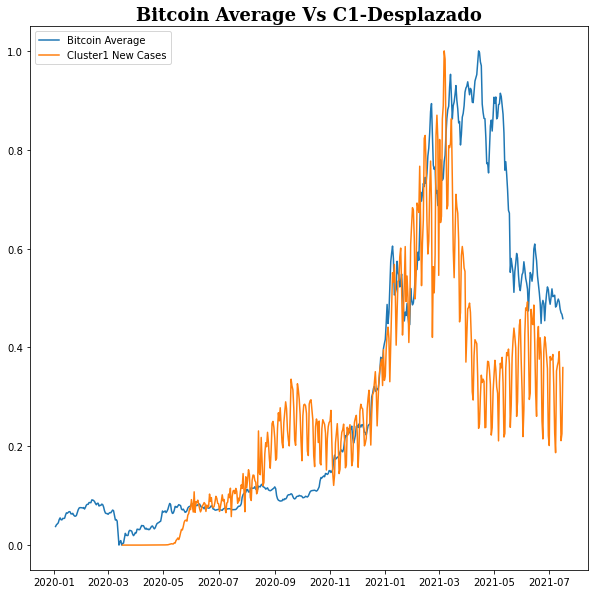

In [67]:
plt.figure(figsize = (10,10))
plt.title("Bitcoin Average Vs C1-Desplazado", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C2 =minmax_norm_Pais(desplazado)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C2
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==1]["Date_reported"]
plt.plot(x, y,label='Cluster1 New Cases')
plt.legend()

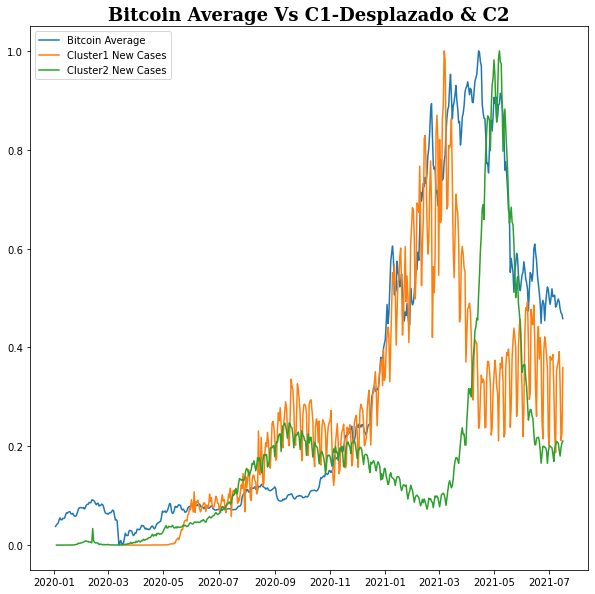

In [68]:
plt.figure(figsize = (10,10))
plt.title("Bitcoin Average Vs C1-Desplazado & C2", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
bitc=minmax_norm_Bitcoin(bit)
C1 =minmax_norm_Pais(Cluster1)
C2 =minmax_norm_Pais(desplazado)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = C2
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==1]["Date_reported"]
plt.plot(x, y,label='Cluster1 New Cases')
y = C1
x = PaisesClustersFinal.loc[PaisesClustersFinal["Cluster"]==0]["Date_reported"]
plt.plot(x, y,label='Cluster2 New Cases')
plt.legend()